# 1. Data Load & Processing

In [1]:
# Check if the tidyverse package is installed, and if not, install it
if (!requireNamespace("tidyverse", quietly = TRUE)) {
  install.packages("tidyverse")
}

# Load the tidyverse package
library(tidyverse)

# Check if the dplyr package is installed, and if not, install it
if (!requireNamespace("dplyr", quietly = TRUE)) {
  install.packages("dplyr")
}

# Load the dplyr package
library(dplyr)

# Check if the readxl package is installed, and if not, install it
if (!requireNamespace("readxl", quietly = TRUE)) {
  install.packages("readxl")
}

# Load the readxl package
library(readxl)

# Check if the reshape2 package is installed, and if not, install it
if (!requireNamespace("reshape2", quietly = TRUE)) {
  install.packages("reshape2")
}

# Load the reshape2 package
library(reshape2)

# Check if the MatchIt package is installed, and if not, install it
if (!requireNamespace("MatchIt", quietly = TRUE)) {
  install.packages("MatchIt")
}

# Load the MatchIt package
library(MatchIt)

# Check if the lmtest package is installed, and if not, install it
if (!requireNamespace("lmtest", quietly = TRUE)) {
  install.packages("lmtest")
}

# Load the lmtest package
library(lmtest)

# Check if the sandwich package is installed, and if not, install it
if (!requireNamespace("sandwich", quietly = TRUE)) {
  install.packages("sandwich")
}

# Load the sandwich package
library(sandwich)

# Check if the gbm package is installed, and if not, install it
if (!requireNamespace("gbm", quietly = TRUE)) {
  install.packages("gbm")
}

# Load the gbm package
library(gbm)

# Check if the vtable package is installed, and if not, install it
if (!requireNamespace("vtable", quietly = TRUE)) {
  install.packages("vtable")
}
library(vtable)

# Check if the zoo package is installed, and if not, install it
if (!requireNamespace("zoo", quietly = TRUE)) {
  install.packages("zoo")
}
library(zoo)

# Check if the cobalt package is installed, and if not, install it
if (!requireNamespace("cobalt", quietly = TRUE)) {
  install.packages("cobalt")
}
library(cobalt)

# Check if the patchwork package is installed, and if not, install it
if (!requireNamespace("patchwork", quietly = TRUE)) {
  install.packages("patchwork")
}
library(patchwork)

# Check if the plm package is installed, and if not, install it
if (!requireNamespace("plm", quietly = TRUE)) {
  install.packages("plm")
}
library(plm)

# Check if the stargazer package is installed, and if not, install it
if (!requireNamespace("stargazer", quietly = TRUE)) {
  install.packages("stargazer")
}
library(stargazer)

# Check if the car package is installed, and if not, install it
if (!requireNamespace("car", quietly = TRUE)) {
  install.packages("car")
}
library(car)

library(scales)
# Suppress summarise info
options(dplyr.summarise.inform = FALSE)

options(repr.matrix.max.cols=150, repr.matrix.max.rows=200)

# Set plot options for plot width, height, and resolution
options(repr.plot.width = 15, repr.plot.height = 8, repr.plot.res = 200)
# options(repr.plot.width = 10, repr.plot.height = 5, repr.plot.res = 250)

Warning message:
"package 'tidyverse' was built under R version 4.3.2"
Warning message:
"package 'ggplot2' was built under R version 4.3.3"
Warning message:
"package 'tidyr' was built under R version 4.3.2"
Warning message:
"package 'readr' was built under R version 4.3.2"
Warning message:
"package 'purrr' was built under R version 4.3.2"
Warning message:
"package 'forcats' was built under R version 4.3.2"
Warning message:
"package 'lubridate' was built under R version 4.3.2"
── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflic

### 1.a. Processing World Bank indicators

In [2]:
# Read indicators from World Bank
wb_indicators_raw <- read_csv("Data\\WDI - WorldBank\\Indicators.csv")
# Melt dataset to put years to rows
wb_indicators_melted <- melt(wb_indicators_raw, id.vars = c("Country Name", "Country Code", "Series Code", "Series Name"), 
                  variable.name = "Year", value.name = "Value")
# Convert the 'Value' column to numeric, coerce errors
wb_indicators_melted$Value <- as.numeric(as.character(wb_indicators_melted$Value))
# Clean and convert the 'Year' column to numeric
wb_indicators_melted$Year <- gsub("\\[.*\\]", "", wb_indicators_melted$Year)
wb_indicators_melted$Year <- as.numeric(wb_indicators_melted$Year)
# Drop NAs
wb_indicators_long <- na.omit(wb_indicators_melted)
# Convert to wide format, representing each indicator as a column
wb_indicators_wide <- pivot_wider(wb_indicators_long, 
                          id_cols = c("Country Name", "Country Code", "Year"),  # List the columns you want to keep as base dimensions
                          names_from = "Series Code", 
                          values_from = "Value")
# Rename columns
wb_indicators_wide <- wb_indicators_wide %>%
        rename(!!!setNames(c("Country Name", "Country Code", "Year"), c("country", "country_code", "year")))
# Column name mapping
wb_indicators_mapping <- c(
"gdp_per_capita" = "NY.GDP.PCAP.CD",
  "gdp_per_capita_growth_pct" = "NY.GDP.PCAP.KD.ZG",
  "agriculture_pct_gdp" = "NV.AGR.TOTL.ZS",
  "industry_pct_gdp" = "NV.IND.TOTL.ZS",
  "pop_total" = "SP.POP.TOTL",
  "pop_in_largest_city_pct_of_urban_pop" = "EN.URB.LCTY.UR.ZS",
  "pop_growth_pct" = "SP.POP.GROW",
  "pop_density" = "EN.POP.DNST",
  "pop_urban" = "SP.URB.TOTL",
  "pop_urban_pct_of_total" = "SP.URB.TOTL.IN.ZS",
  "pop_rural" = "SP.RUR.TOTL",
  "pop_rural_pct_of_total" = "SP.RUR.TOTL.ZS",
  "gni" = "NY.GDY.TOTL.KN",
  "co2_em_kt" = "EN.ATM.CO2E.KT"
    # ,
  # "co2_em_gaseous_fuel_kt" = "EN.ATM.CO2E.GF.KT",
  # "co2_em_liquid_fuel_kt" = "EN.ATM.CO2E.LF.KT",
  # "co2_em_solid_fuel_kt" = "EN.ATM.CO2E.SF.KT"
)

# Apply remapping of column names
wb_indicators_wide <- wb_indicators_wide %>% rename(!!!wb_indicators_mapping) %>% select(c("country", "country_code", "year", names(wb_indicators_mapping)))

# Drop records where the matching dependent variable is missing
wb_indicators_filtered <- wb_indicators_wide %>% filter(!is.na(co2_em_kt))

# Sort dataset
wb_indicators_final <- wb_indicators_filtered %>% filter(year >= 1995 & year <= 2019) %>% arrange (country, year)
# Check final dataset
print(dim(wb_indicators_final))
head(wb_indicators_final)

Rows: 8783 Columns: 54
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr  (4): Country Name, Country Code, Series Name, Series Code
dbl (50): 1974 [YR1974], 1975 [YR1975], 1976 [YR1976], 1977 [YR1977], 1978 [...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 5975   17


country,country_code,year,gdp_per_capita,gdp_per_capita_growth_pct,agriculture_pct_gdp,industry_pct_gdp,pop_total,pop_in_largest_city_pct_of_urban_pop,pop_growth_pct,pop_density,pop_urban,pop_urban_pct_of_total,pop_rural,pop_rural_pct_of_total,gni,co2_em_kt
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,AFG,1995,NA,NA,NA,NA,16418912,54.32289,6.046536,25.17350,3550426,21.624,12868486,78.376,NA,1457.69
Afghanistan,AFG,1996,NA,NA,NA,NA,17106595,54.25136,4.103022,26.22786,3714526,21.714,13392069,78.286,NA,1407.30
Afghanistan,AFG,1997,NA,NA,NA,NA,17788819,54.27616,3.910605,27.27384,3878852,21.805,13909967,78.195,NA,1344.10
Afghanistan,AFG,1998,NA,NA,NA,NA,18493132,54.32271,3.882931,28.35370,4049071,21.895,14444061,78.105,NA,1318.00
Afghanistan,AFG,1999,NA,NA,NA,NA,19262847,54.26183,4.077879,29.53383,4235130,21.986,15027717,78.014,NA,1122.00
Afghanistan,AFG,2000,NA,NA,NA,NA,19542982,55.64950,1.443803,29.96333,4314700,22.078,15228282,77.922,NA,1078.12


### 1.b. Processing weather variables

In [3]:
# Read weather datasets
precipitation_raw = read_csv("Data\\Weather\\GDL-Total-Yearly-Precipitation-data.csv", col_types = cols())
humidity_raw = read_csv("Data\\Weather\\GDL-Yearly-Average-Relative-Humidity-data.csv", col_types = cols())
avg_surface_temp_raw = read_csv("Data\\Weather\\GDL-Yearly-Average-Surface-Temperature-(ºC)-data.csv", col_types = cols())
# Common fuction to melt and clean weather datasets
clean_weather_datasets <- function (df, measure) {
    # Melt dataset to put years to rows
    df_melted <- melt(df, id.vars = c("Country", "Continent", "ISO_Code", "Level", "GDLCODE", "Region"), 
                    variable.name = "Year", value.name = "Value")
    # Convert the 'Value' column to numeric, coerce errors
    df_melted[measure] <- as.numeric(df_melted$Value)
    # Clean and convert the 'Year' column to numeric
    df_melted$Year <- as.numeric(as.character(df_melted$Year))
    # Drop NAs
    df_final <- na.omit(df_melted)
    # Drop unnecassary columns
    cols_to_drop <- c("Continent", "Level", "GDLCODE", "Region", "Value")
    df_final <- df_final %>% select(-one_of(cols_to_drop))
    # Rename columns
    df_final <- df_final %>%
        rename(!!!setNames(c("Country", "ISO_Code", "Year"), c("country", "country_code", "year")))
    # Return cleaned dataframe
    return (df_final)
    }
# Melt and clean weather datasets
precipitation_final <- clean_weather_datasets(precipitation_raw, "precipitation")
humidity_final <- clean_weather_datasets(humidity_raw, "humidity")
avg_surface_temp_final <- clean_weather_datasets(avg_surface_temp_raw, "avg_surface_temp")
# Check dimensions before join
print(paste0("precipitation_final: " ,dim(precipitation_final)[1], " rows"))
print(paste0("humidity_final: " ,dim(humidity_final)[1], " rows"))
print(paste0("avg_surface_temp_final: " ,dim(avg_surface_temp_final)[1], " rows"))
# Inner join precipitation, humidity and avg surface temperature datasets
weather_joined <- inner_join(precipitation_final, humidity_final, by = c("country", "country_code", "year")) %>%
             inner_join(avg_surface_temp_final, by = c("country", "country_code", "year"))
# Check dimensions after inner join
print(paste0("weather_joined: " ,dim(weather_joined)[1], " rows"))
# Remap country codes to right names and remove duplication on country names
country_remap = c(
  "REU" = "Réunion", # Country was France
  "GUF" = "French Guiana", # Country was France
  "MYT" = "Mayotte", # Country was France
  "TWN" = "Taiwan", # Country was China
  "Z06" = "Unknown1", # Country was Pakistan
  "PRK" = "Unknown2" # Country was Pakistan
)
# Apply the country remap to the country column based on matches with country_code
weather_joined_mapped <- weather_joined %>%
  mutate(country = if_else(country_code %in% names(country_remap), 
                           country_remap[country_code], 
                           country))

outlier_countries <- weather_joined_mapped %>% filter(avg_surface_temp < -1) %>% select (country) %>% unique()
weather_joined_filtered <- weather_joined_mapped %>% filter(!country %in% outlier_countries$country)
# Sort dataset
weather_final <- weather_joined_filtered %>% filter(year >= 1995 & year <= 2019) %>% arrange(country, year)
# Check dataset
print(dim(weather_final))
head(weather_final)

[1] "precipitation_final: 6666 rows"
[1] "humidity_final: 6666 rows"
[1] "avg_surface_temp_final: 6666 rows"
[1] "weather_joined: 6666 rows"
[1] 5000    6


,country,country_code,year,precipitation,humidity,avg_surface_temp
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,Afghanistan,AFG,1995,0.016,45.20,8.728
2,Afghanistan,AFG,1996,0.015,45.28,8.676
3,Afghanistan,AFG,1997,0.017,48.20,8.526
4,Afghanistan,AFG,1998,0.017,45.80,9.807
5,Afghanistan,AFG,1999,0.014,45.53,9.722
6,Afghanistan,AFG,2000,0.009,40.39,9.687


### 1.c. Processing EU ETS variables

In [4]:
# Read EU ETS database
eu_ets_raw = read.csv("Data\\EU ETS\\ETS_Database_Jul23.csv", sep = "\t", na.strings = "", fileEncoding = "UTF-8")
# Define the mapping of old names to new names for EUAs
eua_breakdown <- c(
  "1. Total allocated allowances (EUA or EUAA)" = "total_EUAs",
  "1.1 Freely allocated allowances" = "free_EUAs",
  "1.2 Correction to freely allocated allowances (not reflected in EUTL)" = "free_correction_EUAs",
  "1.3 Allowances auctioned or sold (EUAs and EUAAs)" = "auctioned_sold_EUAs"
)
# Drop unnecassary information columns, 
# keep only total EUAs, freely allocated EUAs, correction to freely allocated EUAs and EUAs auctioned or sold
# also rename occurences
eu_ets_raw <- eu_ets_raw %>%
  filter(ETS.information %in% names(eua_breakdown)) %>%
  mutate(ETS.information = case_when(
    ETS.information %in% names(eua_breakdown) ~ eua_breakdown[ETS.information],
    TRUE ~ ETS.information
  ))
# Define the mapping of old names to new names for sector breakdown
sector_breakdown <- c(
    "20-99 All stationary installations" = "all_stationary",
    "10 Aviation" = "aviation")
# Drop sector breakdown, just include all stationary installations and aviation
# also rename occurences
eu_ets_raw <- eu_ets_raw %>%
  filter(main.activity.sector.name %in% names(sector_breakdown)) %>%
  mutate(main.activity.sector.name = case_when(
    main.activity.sector.name %in% names(sector_breakdown) ~ sector_breakdown[main.activity.sector.name],
    TRUE ~ main.activity.sector.name
  ))
# Remove period aggregates and keep years only
eu_ets_raw <- eu_ets_raw %>% filter(nchar(year) == 4)
# Convert to wide format, representing each EUA breakdown as a column
eu_ets_wide <- pivot_wider(eu_ets_raw, 
                          id_cols = c("country", "country_code", "year"),  # List the columns you want to keep as base dimensions
                          names_from = "ETS.information", 
                          values_from = "value",
                          values_fn = sum)
# Fill NAs with 0
eu_ets_wide[is.na(eu_ets_wide)] <- 0
# Convert year column to numeric
eu_ets_wide$year <- as.numeric(eu_ets_wide$year)
# Apply correction to freely allocated EUAs
eu_ets_wide$free_EUAs <- eu_ets_wide$free_EUAs + eu_ets_wide$free_correction_EUAs
# Drop correction to freely allocated EUAs column
eu_ets_wide$free_correction_EUAs <- NULL
# Rename Northen Ireland to UK
eu_ets_wide$country <- ifelse(eu_ets_wide$country %in% c("United Kingdom (excl. NI)", "Northern Ireland"), "United Kingdom", eu_ets_wide$country)
eu_ets_wide$country_code <- ifelse(eu_ets_wide$country == "United Kingdom", "UK", eu_ets_wide$country_code)
# Aggregate Northen Ireland to UK
eu_ets_final <- eu_ets_wide %>% 
  group_by(country, country_code, year) %>% 
  summarize(
    free_EUAs = sum(free_EUAs),
    total_EUAs = sum(total_EUAs),
    auctioned_sold_EUAs = sum(auctioned_sold_EUAs)
  )
# Sort dataset by country and year
eu_ets_final <- eu_ets_final %>% filter(year <= 2019) %>% arrange(country, year)
# Check dataset
print(dim(eu_ets_final))
head(eu_ets_final)

[1] 480   6


country,country_code,year,free_EUAs,total_EUAs,auctioned_sold_EUAs
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Austria,AT,2005,32412654,32412654,0
Austria,AT,2006,32649366,32649366,0
Austria,AT,2007,32729289,32729289,0
Austria,AT,2008,30718182,30718182,0
Austria,AT,2009,30313132,30718182,405050
Austria,AT,2010,30563812,30963812,400000


### 1.d. Processing PM2.5 variables

In [5]:
# Read PM2.5 data from WHO
pm25_raw = read.csv("Data\\WHO PM2.5\\SDG Indicator 11.6.2. Concentrations of PM2.5.csv")
# Define the mapping of old names to new names for the whole dataset
pm25_columns_old <- c("SpatialDimValueCode", "Location", "Period", "Dim1", "FactValueNumeric")
pm25_columns_new <- c("country_code", "country", "year", "residence_area", "PM25")
# Drop unnecessary columns
pm25_raw <- pm25_raw %>% select(all_of(pm25_columns_old))
# Rename respective columns
pm25_raw <- pm25_raw %>% rename(!!!setNames(pm25_columns_old,pm25_columns_new))
# Convert to long format, also pulling residence area breakdown to columns
pm25_long <- pm25_raw %>%
  pivot_wider(names_from = residence_area,
              values_from = c(PM25),
              names_glue = "{.value}_{residence_area}")
# Sort dataset
pm25_final <- pm25_long %>% arrange (country,year)
# Check dataset
print(dim(pm25_final))
head(pm25_final)
# pm25_long[(pm25_long$country_code == "DEU"),]

[1] 1950    8


country_code,country,year,PM25_Cities,PM25_rural,PM25_Total,PM25_Towns,PM25_Urban
<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AFG,Afghanistan,2010,92.79,61.81,68.97,69.67,83.13
AFG,Afghanistan,2011,89.57,60.11,66.94,67.72,80.45
AFG,Afghanistan,2012,92.04,61.09,68.26,68.88,82.40
AFG,Afghanistan,2013,97.49,64.50,72.18,73.01,87.33
AFG,Afghanistan,2014,91.92,60.79,68.06,68.85,82.36
AFG,Afghanistan,2015,90.88,59.99,67.20,67.90,81.38


### 1.e. Combining datasets

In [6]:
# A common function to remap country names to be consistent across data sources
map_countries <- function(df, column_to_map) {
  mapping_dict <- c(
    "Argentina urban" = "Argentina",
    "Bahamas, The" = "Bahamas",
    "Bolivia (Plurinational State of)" = "Bolivia",
    "Cape Verde" = "Cabo Verde",
    "Central African Republic CAR" = "Central African Republic",
    "Chili" = "Chile",
    "Congo Democratic Republic" = "Congo, Dem. Rep.",
    "Democratic Republic of the Congo" = "Congo, Dem. Rep.",
    "Czech Republic" = "Czechia",
    "Egypt, Arab Rep." = "Egypt",
    "Gambia, The" = "Gambia",
    "Guinea Bissau" = "Guinea-Bissau",
    "Iran (Islamic Republic of)" = "Iran",
    "Iran, Islamic Rep." = "Iran",
    "Democratic People's Republic of Korea" = "North Korea",
    "Korea, Dem. People's Rep." = "North Korea",
    "Korea, Rep." = "Korea",
    "Republic of Korea" = "Korea",
    "Kyrgyz Republic" = "Kyrgyzstan",
    "Lao People's Democratic Republic" = "Lao",
    "Lao PDR" = "Lao",
    "Micronesia (Federated States of)" = "Micronesia, Fed. Sts.",
    "Monte Negro" = "Montenegro",
    "Republic of Moldova" = "Moldova",
    "Sao Tome & Principe" = "Sao Tome and Principe",
    "Slovak Republic" = "Slovakia",
    "Syrian Arab Republic" = "Syria",
    "The former Yugoslav Republic of Macedonia" = "North Macedonia",
    "Timor-Leste" = "Timor Leste",
    "Trinidad & Tobago" = "Trinidad and Tobago",
    "Türkiye" = "Turkey",
    "Turkiye" = "Turkey",
    "United States of America" = "United States",
    "Venezuela (Bolivarian Republic of)" = "Venezuela",
    "Venezuela, RB"  = "Venezuela",
    "Viet Nam" = "Vietnam",
    "Yemen, Rep." = "Yemen",
    "United Kingdom of Great Britain and Northern Ireland" = "United Kingdom"
  )
  
  df[[column_to_map]] <- ifelse(df[[column_to_map]] %in% names(mapping_dict), 
                                mapping_dict[df[[column_to_map]]], 
                                df[[column_to_map]])
  
  return(df)
}

# Map country names in each dataset
pm25_final_mapped <- map_countries(pm25_final, "country")
eu_ets_final_mapped <- map_countries(eu_ets_final, "country")
weather_final_mapped <- map_countries(weather_final, "country")
wb_indicators_final_mapped <- map_countries(wb_indicators_final, "country")

# Join each dataset, keeping PM2.5 and World Bank datasets as the main one to join on
all_indicators_full_join <- merge(subset(pm25_final_mapped, select = -country_code), subset(wb_indicators_final_mapped, select = -country_code), by = c("year", "country"), all.x = TRUE,  all.y = TRUE) %>%
    # Filter out missing records in target variable after 2010
    filter(!(is.na(PM25_Total) & year >= 2010)) %>% 
    # Filter out missing records in matching target variable for all years
    filter(!is.na(co2_em_kt)) %>%
    # Filter to countries that only exist in PM2.5 dataset
    filter(country %in% unique(pm25_final_mapped$country)) %>%
    # Join weather variables
    merge(subset(weather_final_mapped, select = -country_code), by = c("year", "country"), all.x = TRUE) %>%
    # Join EU ETS variables
    merge(subset(eu_ets_final_mapped, select = -country_code), by = c("year", "country"), all.x = TRUE) %>%
    # Reorder columns for plotting
    relocate(co2_em_kt, .after=PM25_Urban) %>%
    relocate(PM25_Total, .after=PM25_Urban)

print(dim(all_indicators_full_join))
head(all_indicators_full_join)

[1] 4600   27


,year,country,PM25_Cities,PM25_rural,PM25_Towns,PM25_Urban,PM25_Total,co2_em_kt,gdp_per_capita,gdp_per_capita_growth_pct,agriculture_pct_gdp,industry_pct_gdp,pop_total,pop_in_largest_city_pct_of_urban_pop,pop_growth_pct,pop_density,pop_urban,pop_urban_pct_of_total,pop_rural,pop_rural_pct_of_total,gni,precipitation,humidity,avg_surface_temp,free_EUAs,total_EUAs,auctioned_sold_EUAs
,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1995,Afghanistan,NA,NA,NA,NA,NA,1457.690,NA,NA,NA,NA,16418912,54.32289,6.0465356,25.17350,3550426,21.624,12868486,78.376,NA,0.016,45.20,8.728,NA,NA,NA
2,1995,Albania,NA,NA,NA,NA,NA,1951.100,750.6044,14.0244959,NA,NA,3187784,23.21430,-0.6177037,116.34248,1240399,38.911,1947385,61.089,NA,0.046,72.89,12.090,NA,NA,NA
3,1995,Algeria,NA,NA,NA,NA,NA,76440.200,1466.5447,1.8280370,NA,NA,28478022,12.37245,1.9180442,11.95681,15946838,55.997,12531184,44.003,5.377309e+12,0.010,49.55,18.150,NA,NA,NA
4,1995,Andorra,NA,NA,NA,NA,NA,425.024,18731.6502,-0.3303835,NA,NA,62928,NA,3.0510978,133.88936,58939,93.661,3989,6.339,NA,0.032,73.93,5.152,NA,NA,NA
5,1995,Angola,NA,NA,NA,NA,NA,12719.480,398.1202,11.2784224,6.653214,60.28518,13912253,33.62634,3.2896758,11.15926,6144903,44.169,7767350,55.831,NA,0.038,65.15,22.530,NA,NA,NA
6,1995,Antigua and Barbuda,NA,NA,NA,NA,NA,235.200,8440.0345,-6.2137233,1.643078,12.69552,68398,NA,1.9576915,155.45000,23229,33.961,45169,66.039,NA,0.036,79.34,26.240,NA,NA,NA


# 2. EDA, data cleaning and feature engineering

### 2.a. Gap analysis, summmary statistics

In [7]:
head(all_indicators_full_join)

,year,country,PM25_Cities,PM25_rural,PM25_Towns,PM25_Urban,PM25_Total,co2_em_kt,gdp_per_capita,gdp_per_capita_growth_pct,agriculture_pct_gdp,industry_pct_gdp,pop_total,pop_in_largest_city_pct_of_urban_pop,pop_growth_pct,pop_density,pop_urban,pop_urban_pct_of_total,pop_rural,pop_rural_pct_of_total,gni,precipitation,humidity,avg_surface_temp,free_EUAs,total_EUAs,auctioned_sold_EUAs
,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1995,Afghanistan,NA,NA,NA,NA,NA,1457.690,NA,NA,NA,NA,16418912,54.32289,6.0465356,25.17350,3550426,21.624,12868486,78.376,NA,0.016,45.20,8.728,NA,NA,NA
2,1995,Albania,NA,NA,NA,NA,NA,1951.100,750.6044,14.0244959,NA,NA,3187784,23.21430,-0.6177037,116.34248,1240399,38.911,1947385,61.089,NA,0.046,72.89,12.090,NA,NA,NA
3,1995,Algeria,NA,NA,NA,NA,NA,76440.200,1466.5447,1.8280370,NA,NA,28478022,12.37245,1.9180442,11.95681,15946838,55.997,12531184,44.003,5.377309e+12,0.010,49.55,18.150,NA,NA,NA
4,1995,Andorra,NA,NA,NA,NA,NA,425.024,18731.6502,-0.3303835,NA,NA,62928,NA,3.0510978,133.88936,58939,93.661,3989,6.339,NA,0.032,73.93,5.152,NA,NA,NA
5,1995,Angola,NA,NA,NA,NA,NA,12719.480,398.1202,11.2784224,6.653214,60.28518,13912253,33.62634,3.2896758,11.15926,6144903,44.169,7767350,55.831,NA,0.038,65.15,22.530,NA,NA,NA
6,1995,Antigua and Barbuda,NA,NA,NA,NA,NA,235.200,8440.0345,-6.2137233,1.643078,12.69552,68398,NA,1.9576915,155.45000,23229,33.961,45169,66.039,NA,0.036,79.34,26.240,NA,NA,NA


In [800]:
# Create a named list mapping column names to actual names
column_mapping <- list(
  PM25_Cities = "PM2.5 in cities",
  PM25_rural = "PM2.5 in rural areas",
  PM25_Towns = "PM2.5 in towns",
  PM25_Urban = "PM2.5 in urban areas",
  PM25_Total = "PM2.5 in country",
  co2_em_kt = "CO2 emissions in kt",
  gdp_per_capita = "GDP per capita",
  gdp_per_capita_growth_pct = "GDP per capita growth %",
  agriculture_pct_gdp = "GDP from agriculture %",
  industry_pct_gdp = "GDP from industry %",
  pop_total = "Total population",
  pop_in_largest_city_pct_of_urban_pop = "Urban population living in the largest city %",
  pop_growth_pct = "Population growth %",
  pop_density = "Population density",
  pop_urban_pct_of_total = "Total population living in urban areas %",
  precipitation = "Precipitation level",
  humidity = "Humidity %",
  avg_surface_temp = "Average surface temperature",
  free_EUAs = "Free EUAs",
  auctioned_sold_EUAs = "Auctioned or sold EUAs",
  PM25_Cities_log = "log(PM2.5 in cities)",
  PM25_rural_log = "log(PM2.5 in rural areas)",
  PM25_Towns_log = "log(PM2.5 in towns)",
  PM25_Urban_log = "log(PM2.5 in urban areas)",
  PM25_Total_log = "log(PM2.5 in country)",
  lag1_PM25_Total_log = "lag(log(PM2.5 in country),1)",
  co2_em_kt_log = "log(CO2 emissions in kt)",
  lag1_co2_em_kt_log = "lag(log(CO2 emissions in kt),1)",,
  gdp_per_capita_log = "log(GDP per capita)",
  pop_total_log = "log(Total population)",
  pop_density_log = "log(Population density)",
  precipitation_log = "log(Precipitation level)",
  avg_surface_temp_log = "log(Average surface temperature)",
  free_EUAs_log = "log(Free EUAs)",
  auctioned_sold_EUAs_log = "log(Auctioned or sold EUAs)",
`is_treated:as.factor(year)2012` = "EUETS:2012",
`is_treated:as.factor(year)2013` = "EUETS:2013",
`is_treated:as.factor(year)2014` = "EUETS:2014",
`is_treated:as.factor(year)2015` = "EUETS:2015",
`is_treated:as.factor(year)2016` = "EUETS:2016",
`is_treated:as.factor(year)2017` = "EUETS:2017",
`is_treated:as.factor(year)2018` = "EUETS:2018",
`is_treated:as.factor(year)2019` = "EUETS:2019"
)

ERROR: Error in list(PM25_Cities = "PM2.5 in cities", PM25_rural = "PM2.5 in rural areas", : argument 29 is empty


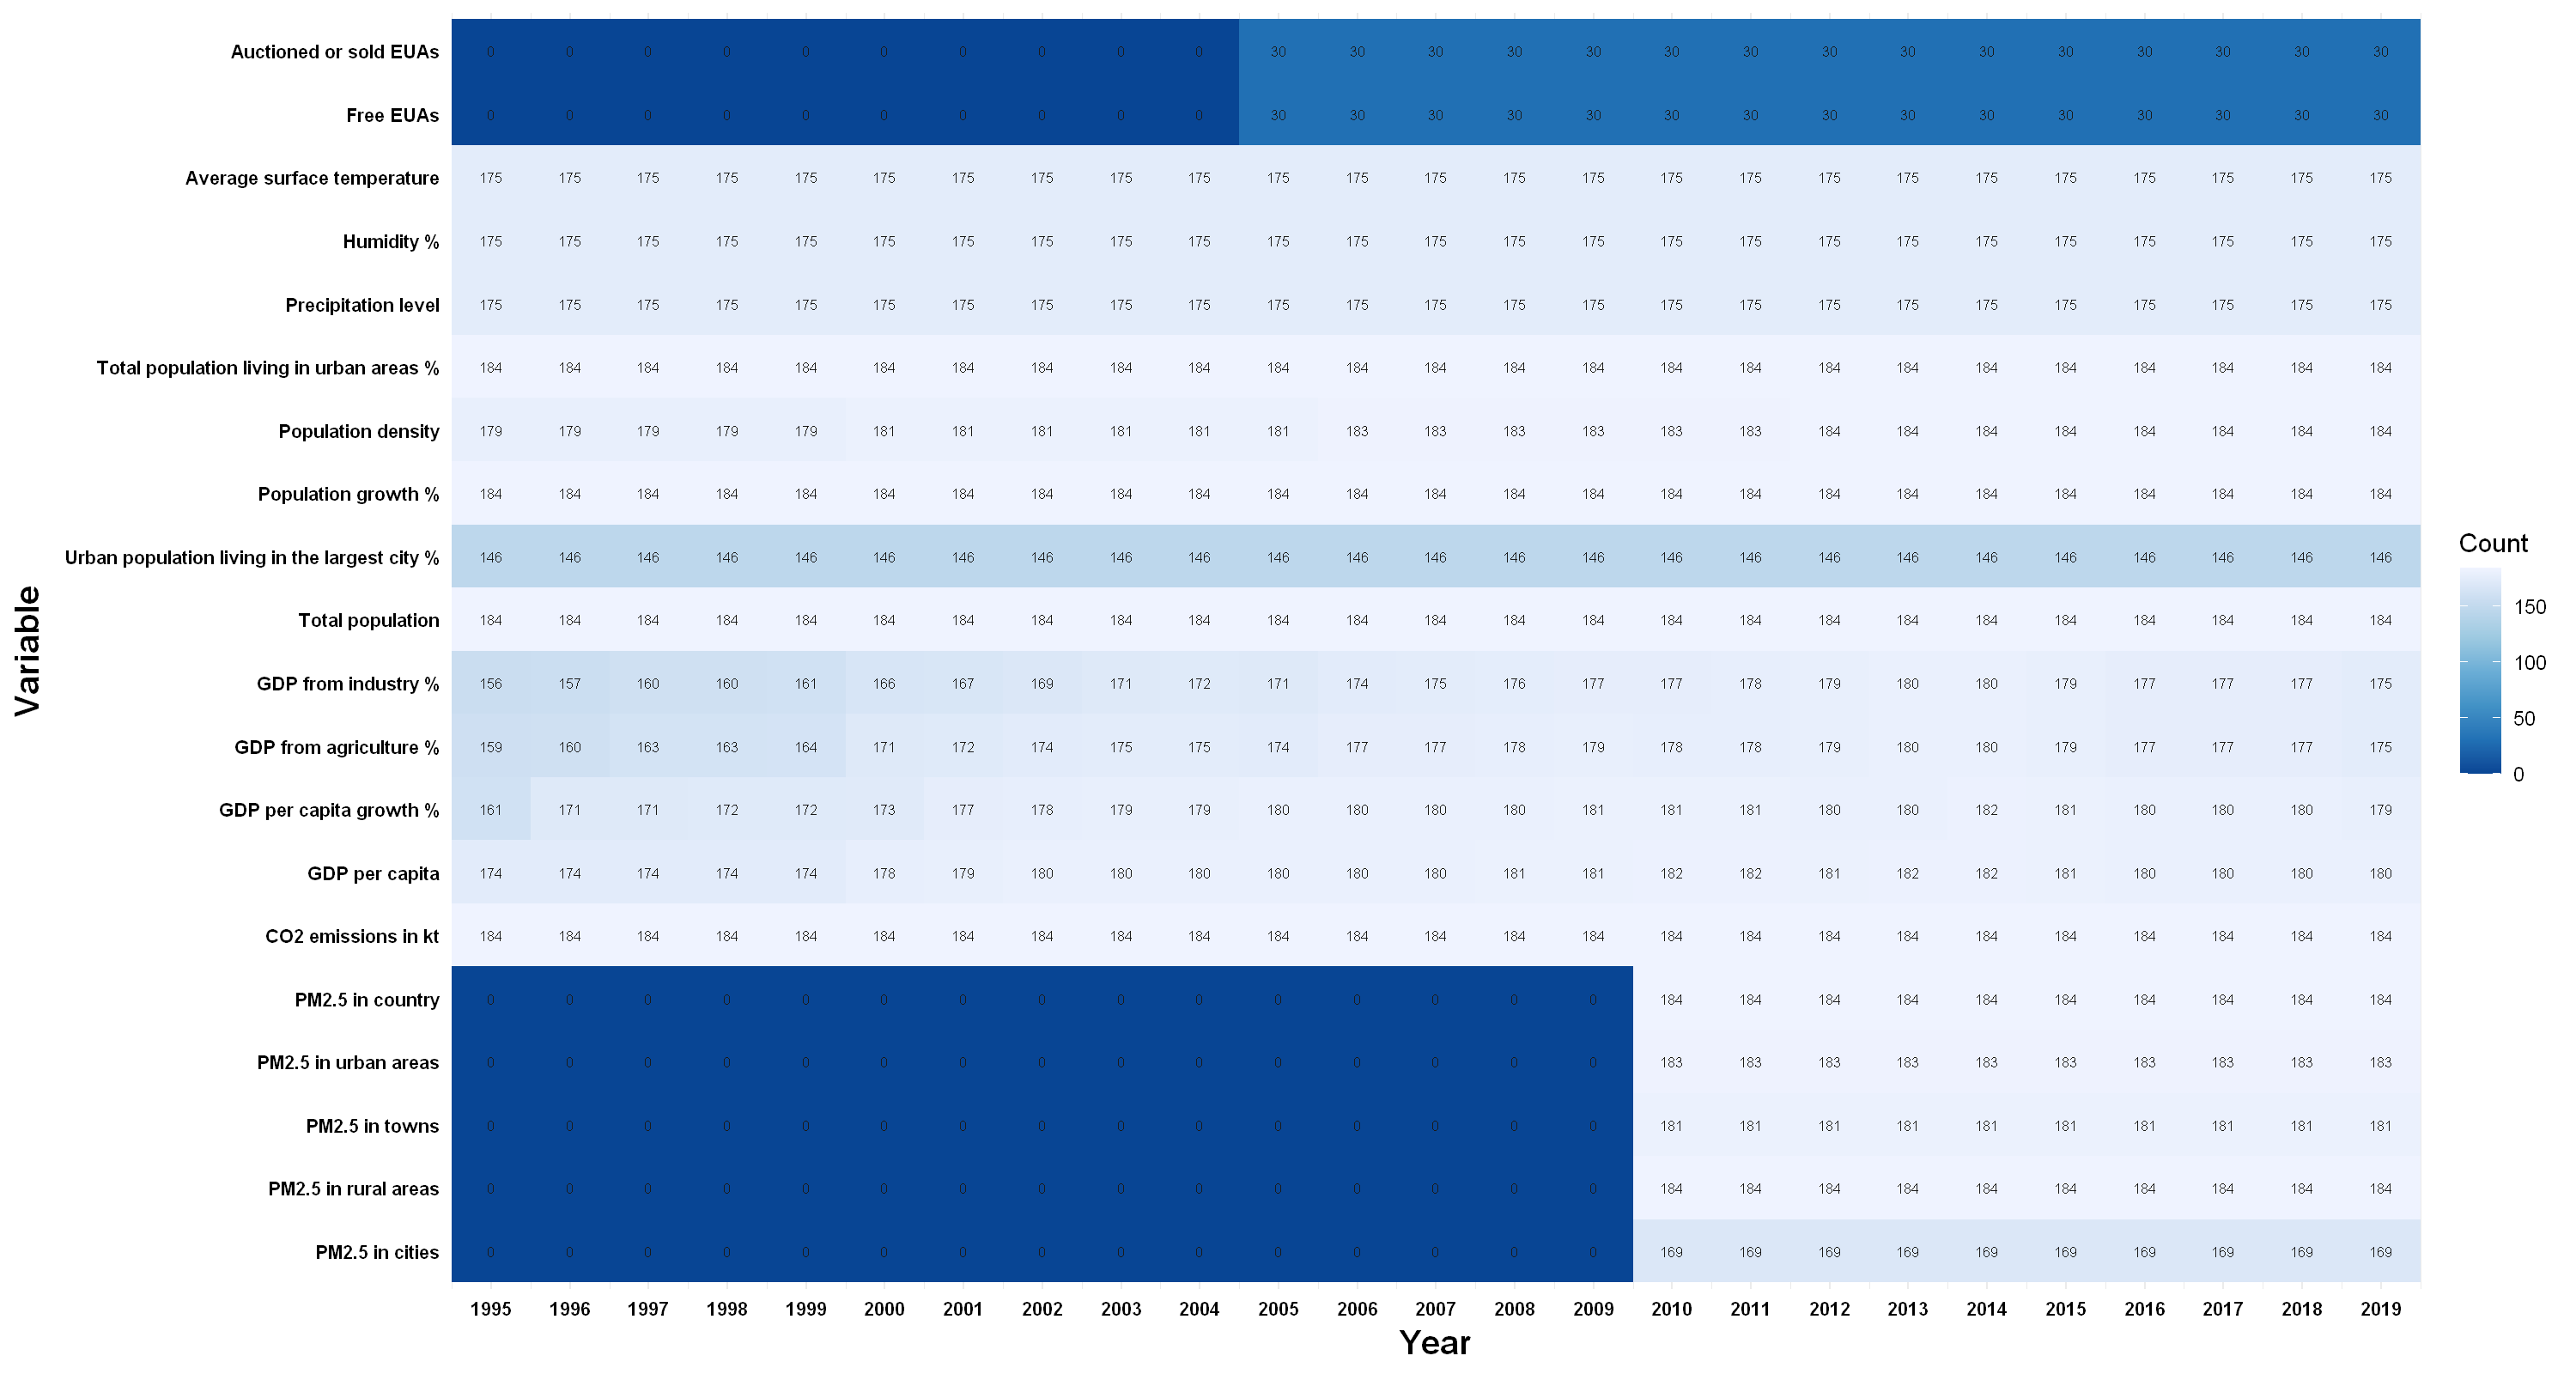

In [9]:
# Drop unnecassary indicators
# For now I decided to drop the rural and urban population counts, since we are already employing the total population count.
# Instead I am employing rural and urban population as a share of total population in percentages.
# Instead of GNI, we are employing GDP per capita
all_indicators <- all_indicators_full_join %>% select(-c(gni,pop_rural,pop_urban,total_EUAs,pop_rural_pct_of_total))

# Calculate the number of non-NA values for each column
non_na_counts <- all_indicators %>%
  select(-c(country)) %>% # Exclude matching variable
  # filter (year >= 2010) %>% # Study period only
  group_by(year) %>%
  mutate(across(everything(), ~sum(!is.na(.))))
  
# Reshape the data for plotting while retaining column order
non_na_counts_long <- non_na_counts %>%
  pivot_longer(cols = -year, names_to = "variable", values_to = "count") 

# non_na_counts_long <- non_na_counts_long %>% mutate(variable_long = column_mapping[variable])
non_na_counts_long$variable_long <- factor(unname(unlist(column_mapping[match(non_na_counts_long$variable, names(column_mapping))])))

non_na_counts_long <- non_na_counts_long %>%
  mutate(variable = factor(variable, levels = colnames(non_na_counts)[-1]))  # Exclude the "year" column from levels

non_na_counts_long$variable <- factor(non_na_counts_long$variable, levels = 
  names(all_indicators)[!names(all_indicators) %in% c("year", "country")])


# Create the heatmap
heatmap_plot <- ggplot(data = non_na_counts_long, aes(x = year, y = variable, fill = count)) +
  geom_tile() +
  scale_fill_distiller() +  # Choose color palette
  geom_text(aes(label = ifelse(is.na(count), "", count)), size = 2, color = "gray10") +  # Add text labels with small font
  scale_x_continuous(breaks = seq(min(non_na_counts$year), max(non_na_counts$year), by = 1), expand = c(0, 0)) +  # Display integer values on X-axis
  labs(x = "Year",
       y = "Variable",
       fill = "Count") +
    scale_y_discrete(labels = non_na_counts_long$variable_long) +
  theme_minimal() +
  theme(axis.text.x = element_text(size = 8, color = "black", face = "bold"),
        axis.text.y = element_text(size = 8, color = "black", face = "bold"),
        axis.title = element_text(size = 14, color = "black", face = "bold")) 

# Display the heatmap
print(heatmap_plot)

# Save the plot with adjusted width
ggsave("images/EDA_heatmap_plot.jpg", heatmap_plot, width = 12, height = 5, create.dir = TRUE)

In [10]:
# Check summary statistics only for study horizon
ST_raw <- st(all_indicators %>% filter(year >= 2010), out = "return") %>% filter(!Variable %in% c("year"))
rownames(ST_raw) <- unname(unlist(column_mapping[match(ST_raw$Variable, names(column_mapping))]))
ST_raw$Variable <- NULL
ST_raw
write.csv(ST_raw, "Data/EDA/Raw_summary.csv", row.names = TRUE)

,N,Mean,Std. Dev.,Min,Pctl. 25,Pctl. 75,Max
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
PM2.5 in cities,1690,27,17,4.6,14,37,97
PM2.5 in rural areas,1840,22,13,4.9,11,29,68
PM2.5 in towns,1810,23,14,5.2,12,30,73
PM2.5 in urban areas,1830,25,16,4.9,12,32,87
PM2.5 in country,1840,23,14,4.9,12,30,72
CO2 emissions in kt,1840,176855,839258,7.5,2444,67254,10762824
GDP per capita,1810,13819,19390,217,1816,16233,123679
GDP per capita growth %,1804,2,4.8,-48,0.34,3.9,97
GDP from agriculture %,1780,11,11,0.03,2.6,17,61


### 2.b. Data cleaning

In [11]:
# 0 precipitation seems like a data quality issue, therefore dropping respective row.
# Only for 2010, Bahrain. Not mentioned in thesis document since this is not an EU ETS country.
all_indicators_filtered <- all_indicators %>% filter (precipitation > 0)

# Drop EU ETS country Liechtenstein as the target variable is missing and no need to bother with data imputation
all_indicators_filtered <- all_indicators_filtered %>% filter(country != "Liechtenstein")

In [12]:
# pop_growth_pct spans between -17% to 19%
# Trimming only 0.5% from each ends of the distribution to remove outliers
lower_quantile <- quantile(all_indicators_filtered$pop_growth_pct, probs = 0.005, na.rm = TRUE)
print(paste0("Lower quantile is: ", round(lower_quantile,2), "%"))
upper_quantile <- quantile(all_indicators_filtered$pop_growth_pct, probs = 0.995, na.rm = TRUE)
print(paste0("Upper quantile is: ", round(upper_quantile,2), "%"))
# Check countries and years to be dropped
all_indicators_filtered %>% 
    filter(pop_growth_pct < lower_quantile | pop_growth_pct > upper_quantile) %>%
    select(c("country", "year", "pop_growth_pct"))
# Replace respective records with NAs
all_indicators_filtered$pop_growth_pct[all_indicators_filtered$pop_growth_pct < lower_quantile | 
                                          all_indicators_filtered$pop_growth_pct > upper_quantile] <- NA

[1] "Lower quantile is: -2.28%"
[1] "Upper quantile is: 7.7%"


country,year,pop_growth_pct
<chr>,<dbl>,<dbl>
Georgia,1995,-3.757716
Rwanda,1995,-16.880630
Georgia,1996,-3.629546
Rwanda,1996,16.625502
Georgia,1997,-3.207518
Liberia,1997,7.822762
Rwanda,1997,13.247067
Georgia,1998,-2.474223
Liberia,1998,10.199885


In [13]:
# gdp_per_capita_growth_pct spans between -48% to 96%
# Trimming only 0.3% from each ends of the distribution to remove outliers
lower_quantile <- quantile(all_indicators_filtered$gdp_per_capita_growth_pct, probs = 0.003, na.rm = TRUE)
print(paste0("Lower quantile is: ", round(lower_quantile,2), "%"))
upper_quantile <- quantile(all_indicators_filtered$gdp_per_capita_growth_pct, probs = 0.997, na.rm = TRUE)
print(paste0("Upper quantile is: ", round(upper_quantile,2), "%"))
# Check countries and years to be dropped
all_indicators_filtered %>% 
    filter(gdp_per_capita_growth_pct < lower_quantile | gdp_per_capita_growth_pct > upper_quantile) %>%
    select(c("country", "year", "gdp_per_capita_growth_pct"))
# Replace respective records with NAs
all_indicators_filtered$gdp_per_capita_growth_pct[all_indicators_filtered$gdp_per_capita_growth_pct < lower_quantile | 
                                          all_indicators_filtered$gdp_per_capita_growth_pct > upper_quantile] <- NA

[1] "Lower quantile is: -18.33%"
[1] "Upper quantile is: 26.96%"


country,year,gdp_per_capita_growth_pct
<chr>,<dbl>,<dbl>
Rwanda,1995,60.09054
Bosnia and Herzegovina,1996,81.35517
Equatorial Guinea,1996,60.33710
Tajikistan,1996,-18.34826
Bosnia and Herzegovina,1997,29.74152
Equatorial Guinea,1997,140.48004
Guinea-Bissau,1998,-29.41329
Iraq,1998,30.62938
Equatorial Guinea,2001,55.59033


### 2.c. Feature engineering

In [14]:
# Label EU ETS country-year records

# Identify EU ETS countries irrespective of years
eu_ets_countries <- all_indicators_filtered %>%
  group_by(country) %>%
  summarise(EUA_total = sum(free_EUAs + auctioned_sold_EUAs, na.rm = TRUE)) %>%
  filter(EUA_total > 0) %>%
  pull(country)

# Replace NAs with 0 for EUA columns
all_indicators_filtered <- all_indicators_filtered %>%
  mutate_at(vars(free_EUAs, auctioned_sold_EUAs), ~ifelse(is.na(.), 0, .))

# Tag country-year pairs
all_indicators_filtered$is_eu_ets <- ifelse(
  # If there's any reported free or auctioned or sold EUAs
  (all_indicators_filtered$free_EUAs + all_indicators_filtered$auctioned_sold_EUAs) > 0, "Active",
  # If there's no reported free or auctioned or sold EUAs but country appears to report later
  ifelse(all_indicators_filtered$country %in% eu_ets_countries, "Inactive",
  # In case the country never reported free or auctioned or sold EUAs
  "No")
)

# Adjust negative and zero average surface temperature records to be positive so that we can apply log transformation
all_indicators_filtered$avg_surface_temp <- all_indicators_filtered$avg_surface_temp + abs(min(all_indicators_filtered$avg_surface_temp, na.rm = TRUE)) + 1

# Adjust zero emissions to be positive so that we can apply log transformation
all_indicators_filtered$co2_em_kt <- all_indicators_filtered$co2_em_kt + 1

# Adjust zero and missing records for free EUAS and auctioned or sold EUAs so we can apply log transformation
all_indicators_filtered$free_EUAs <- all_indicators_filtered$free_EUAs + 1
all_indicators_filtered$auctioned_sold_EUAs <- all_indicators_filtered$auctioned_sold_EUAs + 1

# Apply log transformation for all columns except percentages
all_indicators_filtered <- all_indicators_filtered %>%
  mutate_at(vars(PM25_Cities, PM25_rural, PM25_Total, PM25_Towns, PM25_Urban,
                 gdp_per_capita, pop_total, pop_density,
                 precipitation, avg_surface_temp,
                 free_EUAs, auctioned_sold_EUAs,
                  co2_em_kt
                 ), 
             list(log = ~log(.)))
             
# Drop the original columns that log transformation is applied
all_indicators_filtered <- all_indicators_filtered %>%
  select(-PM25_Cities, -PM25_rural, -PM25_Total, -PM25_Towns, -PM25_Urban,
         -gdp_per_capita, -pop_total, -pop_density,
         -precipitation, -avg_surface_temp,
         -free_EUAs, -auctioned_sold_EUAs
        #  ,-co2_em_kt
         )

# Check final dataset
print(dim(all_indicators_filtered))
head(all_indicators_filtered)

[1] 4369   24


,year,country,co2_em_kt,gdp_per_capita_growth_pct,agriculture_pct_gdp,industry_pct_gdp,pop_in_largest_city_pct_of_urban_pop,pop_growth_pct,pop_urban_pct_of_total,humidity,is_eu_ets,PM25_Cities_log,PM25_rural_log,PM25_Total_log,PM25_Towns_log,PM25_Urban_log,gdp_per_capita_log,pop_total_log,pop_density_log,precipitation_log,avg_surface_temp_log,free_EUAs_log,auctioned_sold_EUAs_log,co2_em_kt_log
,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1995,Afghanistan,1458.690,NA,NA,NA,54.32289,6.0465356,21.624,45.20,No,NA,NA,NA,NA,NA,NA,16.61394,3.225792,-4.135167,2.353658,0,0,7.285294
2,1995,Albania,1952.100,14.0244959,NA,NA,23.21430,-0.6177037,38.911,72.89,No,NA,NA,NA,NA,NA,6.620879,14.97484,4.756538,-3.079114,2.630881,0,0,7.576661
3,1995,Algeria,76441.200,1.8280370,NA,NA,12.37245,1.9180442,55.997,49.55,No,NA,NA,NA,NA,NA,7.290664,17.16464,2.481301,-4.605170,2.993029,0,0,11.244277
4,1995,Andorra,426.024,-0.3303835,NA,NA,NA,3.0510978,93.661,73.93,No,NA,NA,NA,NA,NA,9.837970,11.04975,4.897014,-3.442019,1.938454,0,0,6.054496
5,1995,Angola,12720.480,11.2784224,6.653214,60.28518,33.62634,3.2896758,44.169,65.15,No,NA,NA,NA,NA,NA,5.986754,16.44828,2.412270,-3.270169,3.191546,0,0,9.450969
6,1995,Antigua and Barbuda,236.200,-6.2137233,1.643078,12.69552,NA,1.9576915,33.961,79.34,No,NA,NA,NA,NA,NA,9.040742,11.13310,5.046324,-3.324236,3.333489,0,0,5.464679


### 2.d. Handling missing values

In [15]:
# This function identifies the number of missing records for each year and indicator
# within the specified study horizon and for specified EU-ETS conditions.
display_eu_ets_missing_records <- function (df, interest_variables) {
  # Extract parameters from input list
  horizon_start <- interest_variables$horizon_start
  horizon_end <- interest_variables$horizon_end
  is_eu_ets_val <- interest_variables$is_eu_ets
  columns_except <- interest_variables$columns_except

  # Filter the dataframe for incomplete cases and specified conditions
  df <- df[(!complete.cases(df)), ]
  df <- df %>% filter(year >= horizon_start & year <= horizon_end & is_eu_ets %in% is_eu_ets_val)

  # Summarize missing data by year and EU-ETS status, exclude PM2.5 columns
  t <- df %>%
       group_by(year, is_eu_ets) %>%
       summarise_all(~sum(is.na(.))) %>%
       select(-names(df)[startsWith(names(df), "PM25_")])

  # Calculate column sums to find out the total missing per variable
  column_sums <- colSums(t %>% select(-c("is_eu_ets")), na.rm = TRUE)

  # Filter out variables with no missing data
  df_filtered <- t %>%
                 select(c(names(column_sums)[column_sums != 0]), "is_eu_ets")

  # Pivot longer and process only if missing data is present
  if (dim(df_filtered)[1] > 0 & dim(df_filtered)[2] > 2) {
    df_filtered <- df_filtered %>%
                   pivot_longer(cols = -c(is_eu_ets, year), names_to = "variable", values_to = "value") %>%
                   pivot_wider(names_from = year, values_from = value) %>%
                   arrange(variable, is_eu_ets) %>%
                   filter (!variable %in% columns_except) %>%
                   replace_na(list(value = 0)) 
    return (df_filtered)
  } else {
    return (NULL)
  }
}

# Function to fill missing values by carrying forward the next available non-NA value per country.
fill_next_year_per_country <- function(df, interest_variables) {
  cols_to_impute <- unique(display_eu_ets_missing_records(df, interest_variables)$variable)
  is_eu_ets_val <- interest_variables$is_eu_ets

  # Process only if there are columns with missing values
  if (length(cols_to_impute) > 0) {
    # Filter dataframe for the EU ETS condition
    filtered_df <- df[df$is_eu_ets %in% is_eu_ets_val, ]

    # Loop through each country to apply forward fill
    countries <- unique(filtered_df$country)
    for (country in countries) {
      country_df <- filtered_df[filtered_df$country == country, ]
      country_df <- arrange(country_df, year)
      for (col in cols_to_impute) {
        country_df[[col]] <- na.locf(country_df[[col]], na.rm = FALSE, fromLast = TRUE)
      }
        # Replace values in the original dataframe for the current country
        df[df$country == country & df$is_eu_ets %in% is_eu_ets_val, cols_to_impute] <- country_df[, cols_to_impute]
      }
    }
    return(df)
  }


# Function to impute missing values with mean of the respective year if forward fill is not possible.
impute_mean_by_year <- function(df, interest_variables) {
  cols_to_imput <- unique(display_eu_ets_missing_records(df, interest_variables)$variable)
  is_eu_ets_val <- interest_variables$is_eu_ets

  # Impute only if missing values are detected for specific columns
  if (length(cols_to_imput) > 0) {
    # Filter dataframe for EU ETS condition
    filtered_df <- df[df$is_eu_ets %in% is_eu_ets_val, ]

    # Calculate yearly means for each column
    year_means <- aggregate(. ~ year, filtered_df[, c("year", cols_to_imput)], mean, na.rm = TRUE)

    # Impute missing values by merging yearly means and updating the data
    for (col in cols_to_imput) {
      merged_df <- merge(filtered_df, year_means, by = "year", suffixes = c("", "_mean"), all.x = TRUE)
      missing_values <- is.na(merged_df[[col]])
      merged_df[[col]][missing_values] <- merged_df[[paste0(col, "_mean")]][missing_values]
      merged_df <- merged_df[, !(names(merged_df) %in% paste0("_mean"))]
      df[df$is_eu_ets %in% is_eu_ets_val, col] <- merged_df[[col]]
    }
  }
  return(df)
}

In [16]:
# Display of missing records for active EU-ETS countries for the study period 2010-2019
print("Missing records for active EU-ETS countries, study horizon 2005-2019")
eu_ets_study_imputation <- list(
  "horizon_start" = 2005,
  "horizon_end" = 2019,
  "is_eu_ets" = c("Active","Inactive"),
  "columns_except" = c("free_EUAs_log", "auctioned_or_sold_EUAs_log", "co2_em_kt_log")
)
display_eu_ets_missing_records(all_indicators_filtered, eu_ets_study_imputation)

# Apply forward filling by next year and then impute with mean by year for active EU-ETS countries
all_indicators_imputted <- fill_next_year_per_country(all_indicators_filtered, eu_ets_study_imputation)
all_indicators_imputted <- impute_mean_by_year(all_indicators_imputted, eu_ets_study_imputation)

# Display missing records for inactive EU-ETS countries before their treatment in the pre-treatment horizon 1995-2004
print("Missing records for inactive EU-ETS countries, pre-treatment horizon 1995-2004")
eu_ets_matching_imputation <- list(
  "horizon_start" = 1995,
  "horizon_end" = 2004,
  "is_eu_ets" = "Inactive",
  "columns_except" = c("free_EUAs_log", "auctioned_or_sold_EUAs_log", "co2_em_kt_log")
)
display_eu_ets_missing_records(all_indicators_imputted, eu_ets_matching_imputation)

# Apply data imputation strategies to inactive EU-ETS countries using similar steps
all_indicators_imputted <- fill_next_year_per_country(all_indicators_imputted, eu_ets_matching_imputation)
all_indicators_imputted <- impute_mean_by_year(all_indicators_imputted, eu_ets_matching_imputation)

# Display and handle missing records for non-EU ETS countries for the pre-treatment period 1995-2004
print("Missing records for non - EU-ETS countries, study and matching horizon 1995-2019")
non_eu_ets_study_imputation <- list(
  "horizon_start" = 1994,
  "horizon_end" = 2019,
  "is_eu_ets" = "No",
  "columns_except" = c("free_EUAs_log", "auctioned_or_sold_EUAs_log", "co2_em_kt_log")
)
display_eu_ets_missing_records(all_indicators_imputted, non_eu_ets_study_imputation)

# Further imputation for non-EU ETS countries during the study period, only forward fill
# Group mean imputation is not a reasonable approach as all other world countries has much more variance than EU countries
all_indicators_imputted <- fill_next_year_per_country(all_indicators_imputted, non_eu_ets_study_imputation)

[1] "Missing records for active EU-ETS countries, study horizon 2005-2019"


is_eu_ets,variable,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
Active,pop_in_largest_city_pct_of_urban_pop,2,2,2,3,3,3,3,4,4,4,4,4,4,4,4
Inactive,pop_in_largest_city_pct_of_urban_pop,2,2,2,1,1,1,1,NA,NA,NA,NA,NA,NA,NA,NA


[1] "Missing records for inactive EU-ETS countries, pre-treatment horizon 1995-2004"


is_eu_ets,variable,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004
<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
Inactive,gdp_per_capita_growth_pct,6,0,0,0,0,0,0,0,0,0
Inactive,pop_density_log,2,2,2,2,2,0,0,0,0,0
Inactive,pop_growth_pct,0,0,0,0,0,0,1,0,0,0


[1] "Missing records for non - EU-ETS countries, study and matching horizon 1995-2019"


is_eu_ets,variable,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
No,agriculture_pct_gdp,20,19,17,17,16,10,9,7,7,7,8,5,5,4,3,4,4,3,2,2,3,4,4,4,6
No,gdp_per_capita_growth_pct,14,13,12,11,9,8,6,4,5,6,3,4,3,3,2,2,3,6,6,2,4,3,4,3,4
No,gdp_per_capita_log,7,7,7,7,7,4,3,2,2,2,2,2,2,1,1,1,1,2,1,1,2,3,3,3,3
No,industry_pct_gdp,23,22,20,20,19,15,13,12,11,10,11,8,7,6,5,5,4,3,2,2,3,4,4,4,6
No,pop_density_log,3,3,3,3,3,3,3,3,3,3,3,1,1,1,1,1,1,0,0,0,0,0,0,0,0
No,pop_growth_pct,2,2,3,2,0,0,0,0,0,0,2,2,3,3,3,1,2,2,2,4,3,0,2,3,2
No,pop_in_largest_city_pct_of_urban_pop,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27


In [17]:
# Define the columns where missing values are ignored for all years
cols_ignore_all_years <- c("free_EUAs_log", "auctioned_sold_EUAs_log")

# Define the columns where missing values are ignored only for years 2010-2019
cols_ignore_specific_years <- c("PM25_Cities_log", "PM25_rural_log", "PM25_Total_log", "PM25_Towns_log", "PM25_Urban_log")

# Create a new column 'to_drop' initialized as FALSE for all rows
all_indicators_imputted$to_drop <- FALSE

# Mark rows to drop based on missing values in general columns
all_indicators_imputted$to_drop <- all_indicators_imputted$to_drop | 
  !complete.cases(all_indicators_imputted[, !(names(all_indicators_imputted) %in% c(cols_ignore_all_years, cols_ignore_specific_years))])

# Mark rows to drop based on missing values in specific year columns for years 2010-2019
is_within_years <- all_indicators_imputted$year >= 2010 & all_indicators_imputted$year <= 2019
specific_year_missing <- !complete.cases(all_indicators_imputted[is_within_years, cols_ignore_specific_years])

# Apply specific year conditions only to relevant rows
all_indicators_imputted$to_drop[is_within_years] <- all_indicators_imputted$to_drop[is_within_years] | specific_year_missing

# Now, filter out the rows flagged to be dropped
all_indicators_final <- all_indicators_imputted[!all_indicators_imputted$to_drop, ]

# Optionally, drop the 'to_drop' column if no longer needed
all_indicators_final$to_drop <- NULL

# Only keep countries that are available through the matching and study period, 1995-2019
country_counts <- all_indicators_final %>% group_by(country) %>% summarise(count=n())
country_counts$to_keep = ifelse(country_counts$count == max(all_indicators_final$year) - min(all_indicators_final$year) + 1, TRUE,FALSE)
country_counts <- country_counts %>% filter(to_keep == TRUE)
all_indicators_final <- all_indicators_final %>% filter (country %in% country_counts$country)


print("Shape of final dataset")
print(dim(all_indicators_final))

# EU ETS breakdown of country-year pairs
all_indicators_final %>% group_by(is_eu_ets) %>% summarise(count = n())


[1] "Shape of final dataset"
[1] 3425   24


is_eu_ets,count
<chr>,<int>
Active,411
Inactive,314
No,2700


In [18]:
# Convert bindary variable to numeric
# all_indicators_final <- all_indicators_final %>% mutate(is_eu_ets = if_else(is_eu_ets, 1, 0))
# Check summary statistics
ST_processed <- st(all_indicators_final %>% filter(year >= 2010) %>% select(-is_eu_ets), out = "return", digits = 2) %>% filter (!Variable %in% c("year"))
# Correct summary statistics for EU ETS indicators.
# The generated summary table was inaccurate due to the manual addition of 1 to every entry in the dataset, including those from non-EU ETS countries. 
# As a consequence, zeros appeared post-log transformation for non-EU ETS nations, leading to a thick tail on the left side of the distribution.
ST_processed[ST_processed$Variable == "free_EUAs_log","Mean"] = all_indicators_final %>% filter (is_eu_ets %in% c("Active", "Joined Later") & year >= 2010) %>% summarise(mean=round(mean(free_EUAs_log),1))
ST_processed[ST_processed$Variable == "free_EUAs_log","Std. Dev."] = all_indicators_final %>% filter (is_eu_ets %in% c("Active", "Joined Later") & year >= 2010) %>% summarise(sd=round(sd(free_EUAs_log),1))
ST_processed[ST_processed$Variable == "free_EUAs_log","Min"] = all_indicators_final %>% filter (is_eu_ets %in% c("Active", "Joined Later") & year >= 2010) %>% summarise(min=round(min(free_EUAs_log),1))
ST_processed[ST_processed$Variable == "free_EUAs_log","Pctl. 25"] = all_indicators_final %>% filter (is_eu_ets %in% c("Active", "Joined Later") & year >= 2010) %>% summarise(p25=round(quantile(free_EUAs_log,0.25),1))
ST_processed[ST_processed$Variable == "free_EUAs_log","Pctl. 75"] = all_indicators_final %>% filter (is_eu_ets %in% c("Active", "Joined Later") & year >= 2010) %>% summarise(p75=round(quantile(free_EUAs_log,0.75),1))
ST_processed[ST_processed$Variable == "auctioned_sold_EUAs_log","Mean"] = all_indicators_final %>% filter (is_eu_ets %in% c("Active", "Joined Later") & year >= 2010) %>% summarise(mean=round(mean(auctioned_sold_EUAs_log),1))
ST_processed[ST_processed$Variable == "auctioned_sold_EUAs_log","Std. Dev."] = all_indicators_final %>% filter (is_eu_ets %in% c("Active", "Joined Later") & year >= 2010) %>% summarise(sd=round(sd(auctioned_sold_EUAs_log),1))
ST_processed[ST_processed$Variable == "auctioned_sold_EUAs_log","Min"] = all_indicators_final %>% filter (is_eu_ets %in% c("Active", "Joined Later") & year >= 2010) %>% summarise(min=round(min(auctioned_sold_EUAs_log),1))
ST_processed[ST_processed$Variable == "auctioned_sold_EUAs_log","Pctl. 25"] = all_indicators_final %>% filter (is_eu_ets %in% c("Active", "Joined Later") & year >= 2010) %>% summarise(p25=round(quantile(auctioned_sold_EUAs_log,0.25),1))
ST_processed[ST_processed$Variable == "auctioned_sold_EUAs_log","Pctl. 75"] = all_indicators_final %>% filter (is_eu_ets %in% c("Active", "Joined Later") & year >= 2010) %>% summarise(p75=round(quantile(auctioned_sold_EUAs_log,0.75),1))

rownames(ST_processed) <- unname(unlist(column_mapping[match(ST_processed$Variable, names(column_mapping))]))
ST_processed$Variable <- NULL
ST_processed
write.csv(ST_processed, "Data/EDA/Processed_summary.csv", row.names = TRUE)

,N,Mean,Std. Dev.,Min,Pctl. 25,Pctl. 75,Max
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
CO2 emissions in kt,1370,228105,965875,122,6804,98948,10762825
GDP per capita growth %,1370,2.2,3.3,-13,0.63,4,23
GDP from agriculture %,1370,12,11,0.21,3,18,61
GDP from industry %,1370,27,11,4.4,21,31,78
Urban population living in the largest city %,1370,31,15,3.1,21,40,81
Population growth %,1370,1.4,1.3,-2.3,0.44,2.3,7.7
Total population living in urban areas %,1370,59,22,11,43,77,100
Humidity %,1370,67,14,26,60,77,88
log(PM2.5 in cities),1370,3.1,0.61,1.8,2.7,3.6,4.6


### 2.e. Distribution of variables

Warning message:
"The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(density)` instead."


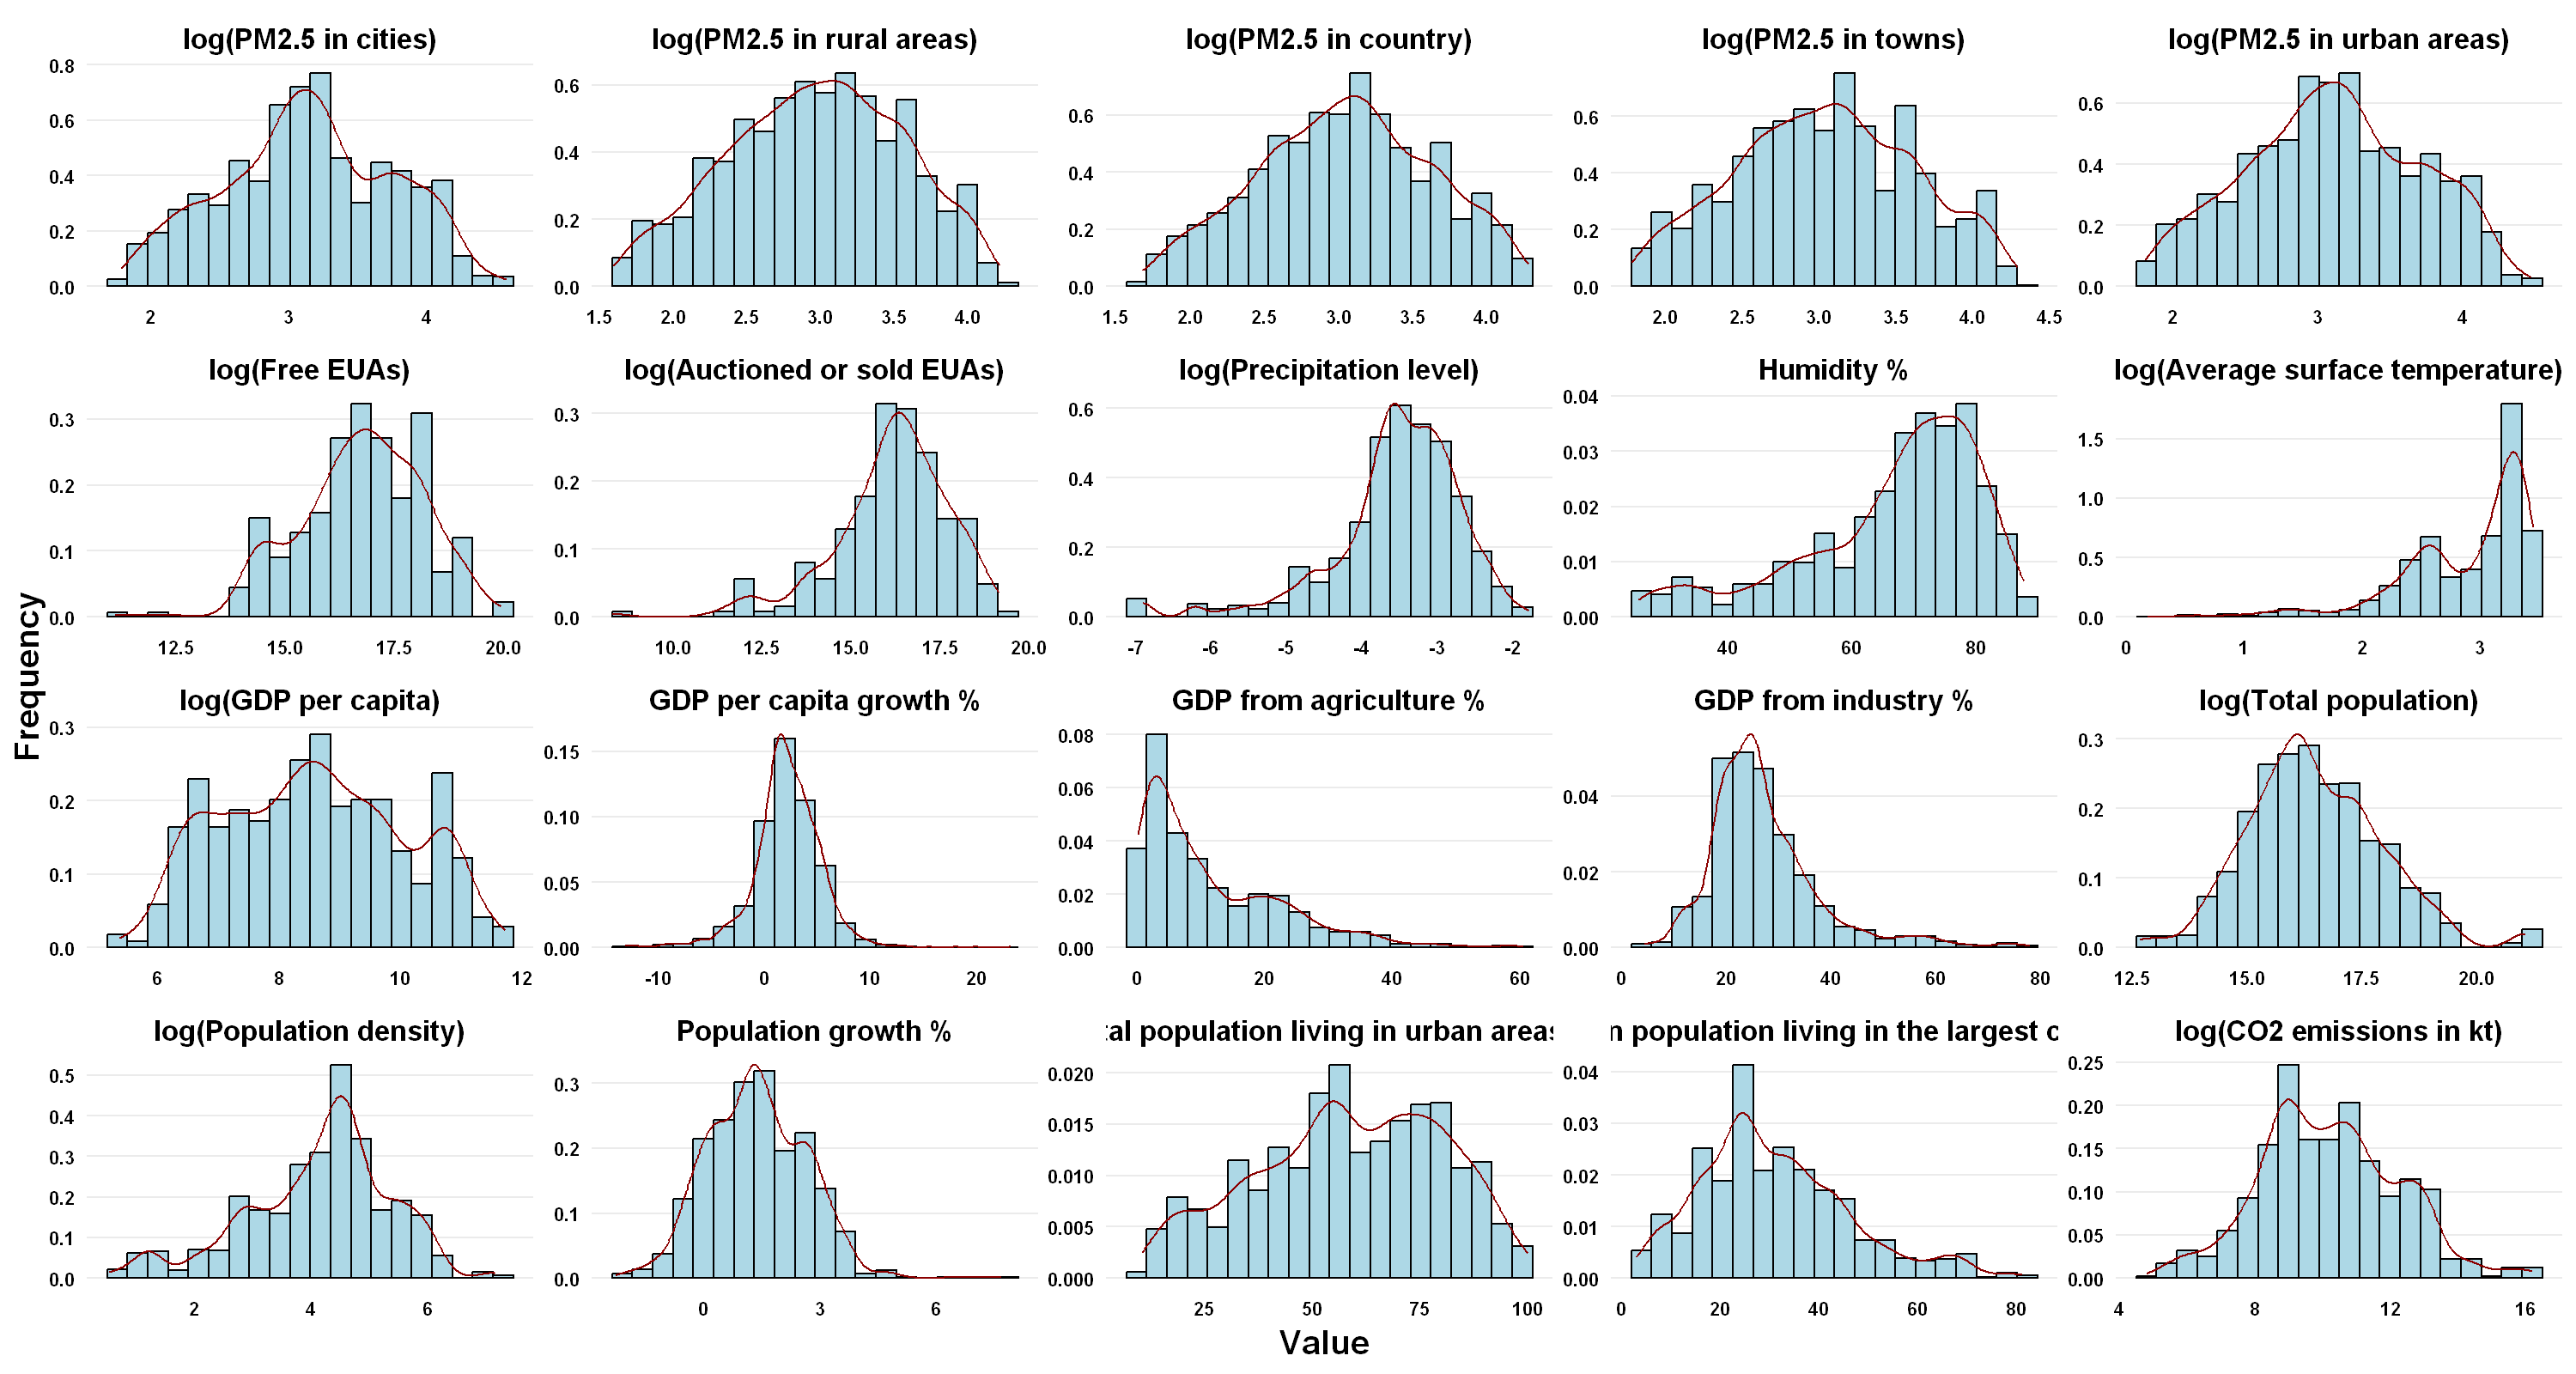

In [19]:
# Define column order of dataset
column_order <- c(
    'PM25_Cities_log', 'PM25_rural_log', 'PM25_Total_log', 'PM25_Towns_log', 'PM25_Urban_log',
    'is_eu_ets', 'free_EUAs_log', 'auctioned_sold_EUAs_log', "co2_em_kt",
    'precipitation_log', 'humidity', 'avg_surface_temp_log', 
    'gdp_per_capita_log', 'gdp_per_capita_growth_pct', 'agriculture_pct_gdp', 'industry_pct_gdp', 
    'pop_total_log', 'pop_density_log', 'pop_growth_pct', 'pop_urban_pct_of_total', 'pop_in_largest_city_pct_of_urban_pop'
    , "co2_em_kt_log"
)

column_order_long <- unname(unlist(column_mapping[match(column_order, names(column_mapping))]))

# Apply column order
all_indicators_final <- all_indicators_final %>% select(all_of(c("country", "year", column_order)))

# Generate a dataframe for plot only
all_indicators_final_plot <- all_indicators_final %>% mutate(
    free_EUAs_log = ifelse(free_EUAs_log == 0, NA, free_EUAs_log),
    auctioned_sold_EUAs_log = ifelse(auctioned_sold_EUAs_log == 0, NA, auctioned_sold_EUAs_log)) %>%
    select (-co2_em_kt) %>%
    filter(year >= 2010)
    
# Create a dummy variable for pivot_longer()
all_indicators_final_plot$dummyvar <- "dummyvar"  
# Reshape the dataframe to long format
selected_variables_long <- pivot_longer(all_indicators_final_plot[,setdiff(colnames(all_indicators_final_plot), c("year", "country", "is_eu_ets"))], -dummyvar)
# Drop created dummy variable
all_indicators_final_plot$dummyvar <- NULL
# Convert 'name' to factor with levels based on original dataset order
# This will help us to generate the plot of columns in defined order
selected_variables_long$name <- factor(selected_variables_long$name, levels = names(all_indicators_final_plot)[!names(all_indicators_final_plot) %in% c("year", "country")])
selected_variables_long$variable_long <- unname(unlist(column_mapping[match(selected_variables_long$name, names(column_mapping))]))
selected_variables_long$variable_long <- factor(selected_variables_long$variable_long, levels = column_order_long[!column_order_long %in% c("year", "country")])


# Create the plot with KDE
plot_vars <- ggplot(selected_variables_long, aes(x = value, y = ..density..)) +
  geom_histogram(bins = 20, fill = "lightblue", color = "black", na.rm = TRUE) +
  geom_density(color = "darkred", adjust = 1, na.rm = TRUE) +  # Adjust the bandwidth
  facet_wrap(~variable_long, scales = "free") +
  labs(x = "Value",
       y = "Frequency")+
  theme_minimal() +
  theme(axis.text.x = element_text(size = 8, color = "black", face = "bold"),
        axis.text.y = element_text(size = 8, color = "black", face = "bold"),
        axis.title = element_text(size = 14, color = "black", face = "bold"),
        strip.text = element_text(size = 12, color = "black", face = "bold"),
        panel.grid.major.x = element_line(color = "transparent"),  # Remove x-axis gridlines
        panel.grid.minor.x = element_line(color = "transparent"),  # Remove minor x-axis gridlines
        panel.grid.minor.y = element_line(color = "transparent")) 

plot(plot_vars)

# Save the plot with adjusted width
ggsave("images/EDA_distribution_plot.jpg", plot_vars, width = 20, height = 12, create.dir = TRUE)

### 2.d. Count of Countries: EU ETS vs Non-EU ETS

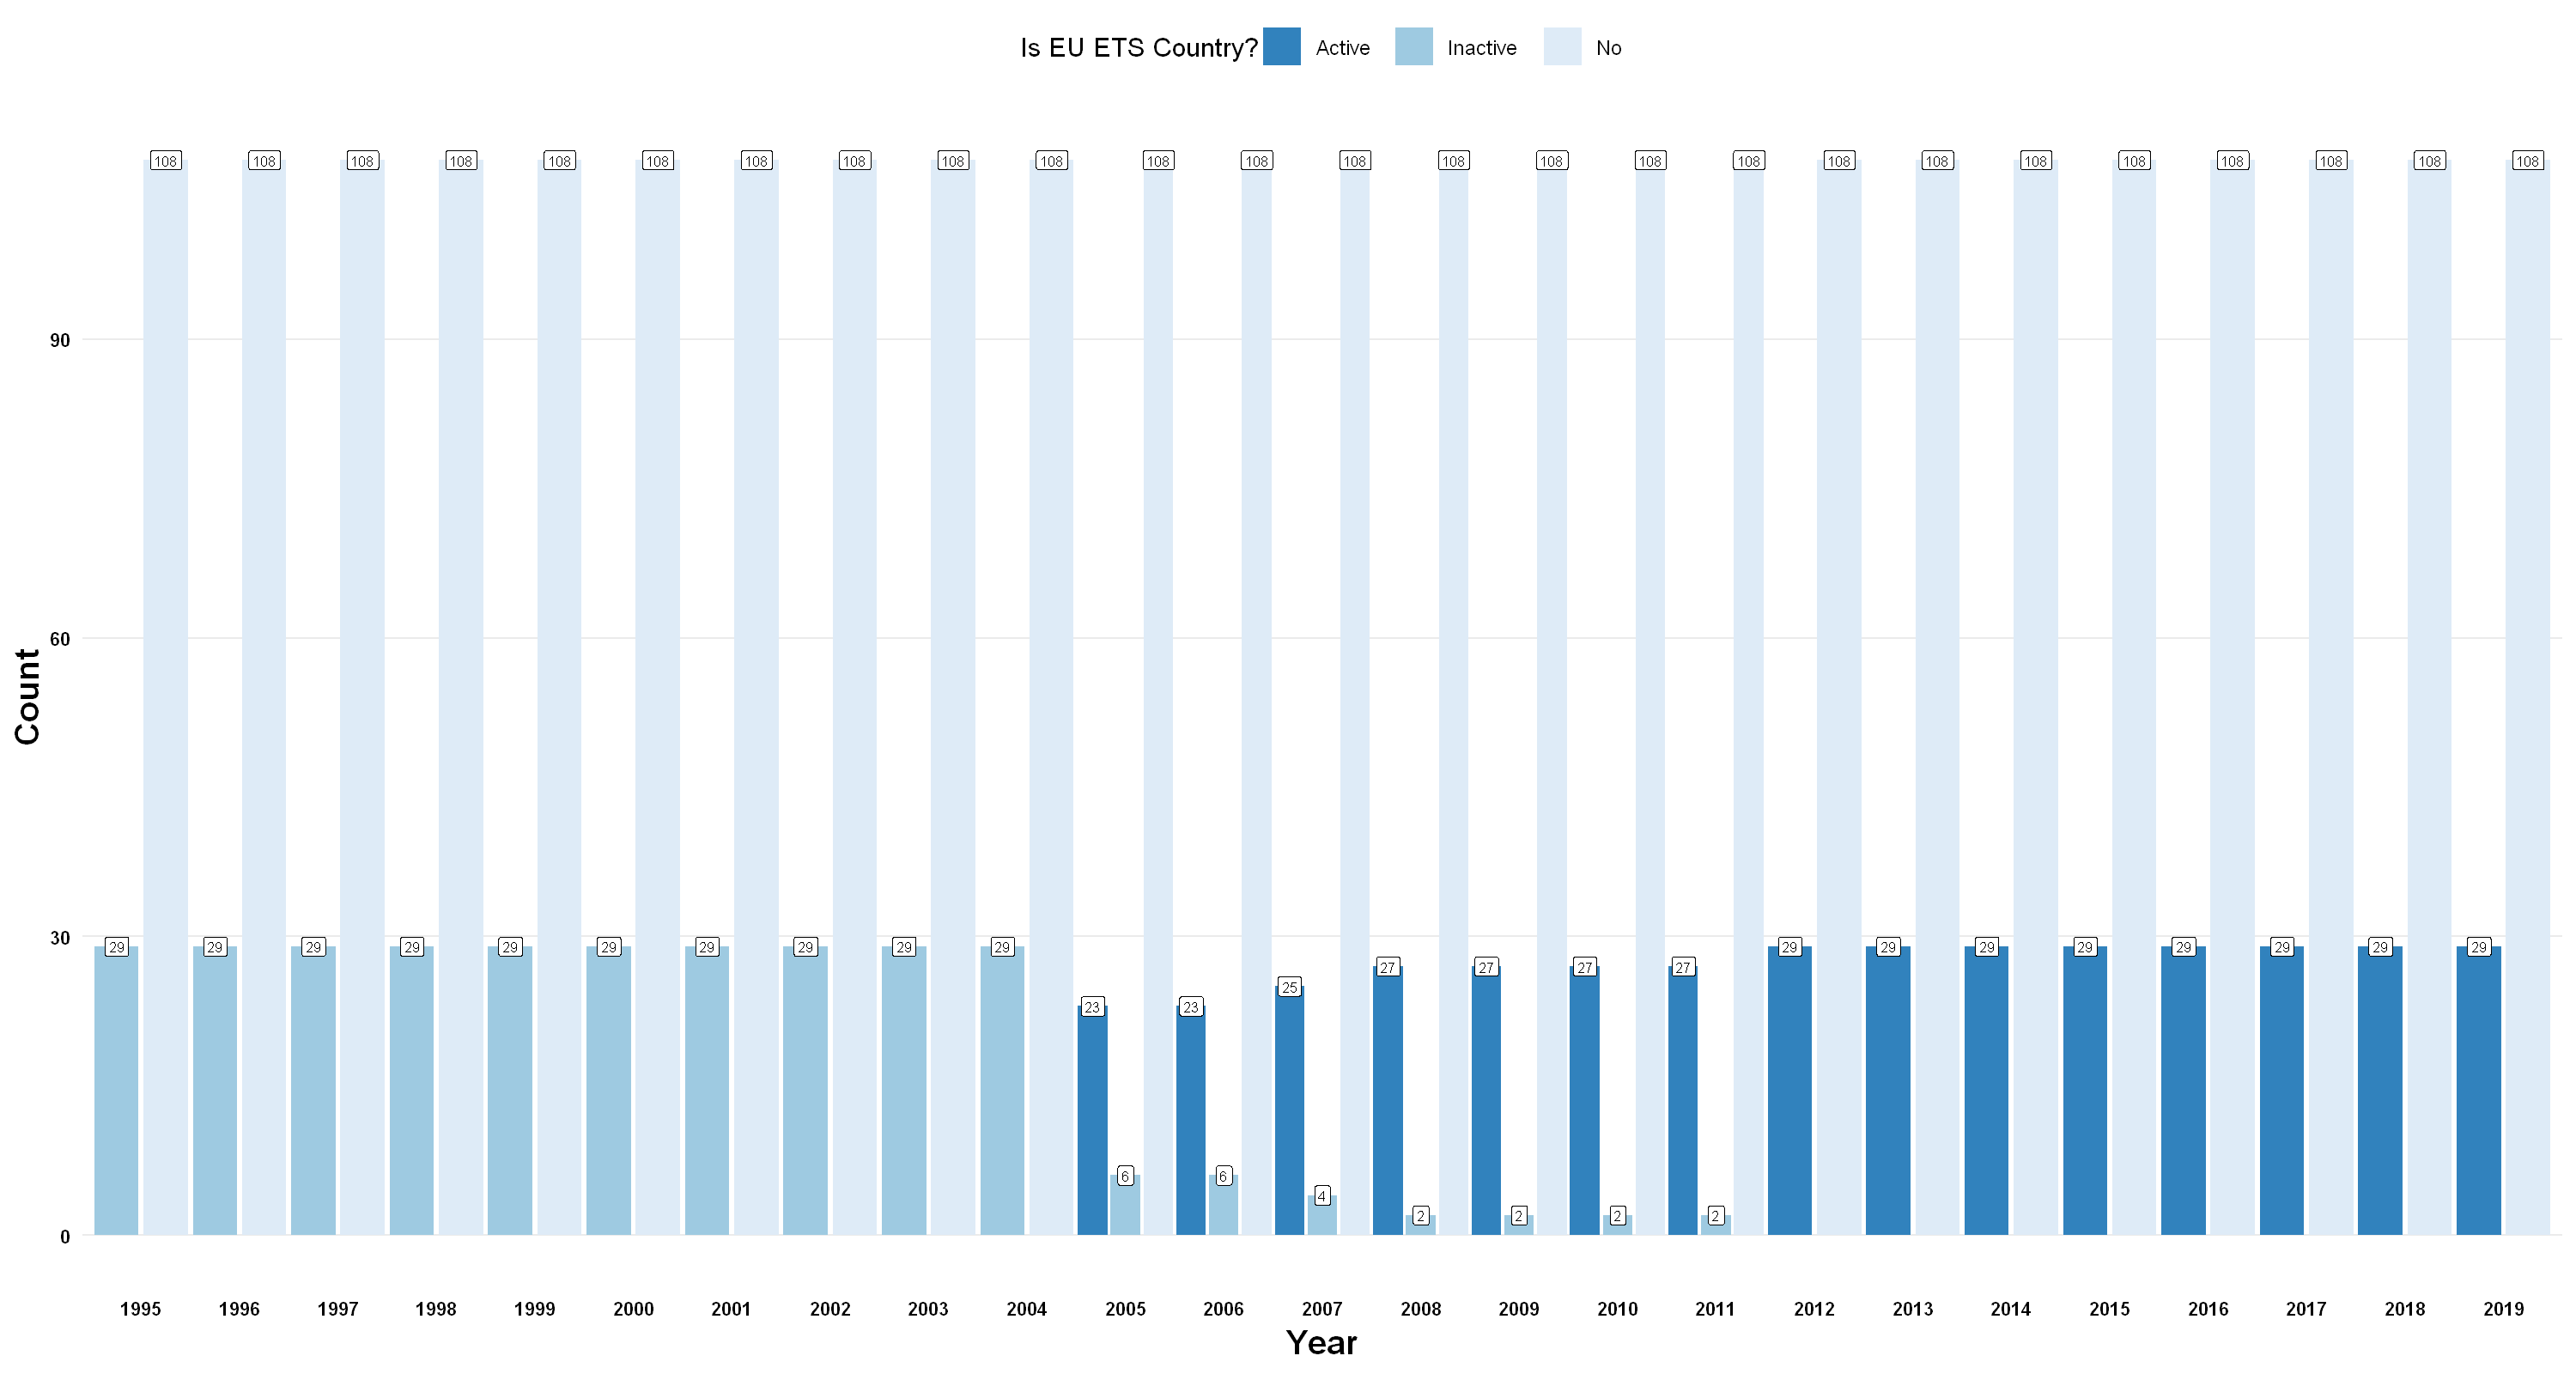

In [20]:
# Count of distinct countries for each year, with EU ETS breakdown
year_country_breakdown <- all_indicators_final %>%
  group_by(year, is_eu_ets) %>%
  summarise(cnt = n(), .groups = 'drop')

# Plot number of countries available in our dataset with EU ETS breakdown
eu_ets_country_breakdown <- ggplot(year_country_breakdown, aes(x=factor(year), y=cnt, group=is_eu_ets)) +
       geom_bar(aes(fill=is_eu_ets),position=position_dodge(width=1), stat="identity") + 
       geom_label(aes(label=cnt),position = position_dodge(width=1), size = 2) +
       labs(x = "Year",
          y = "Count",
          fill = "Is EU ETS Country? ") +
        theme_minimal() + 
        theme(legend.position = "top") +
        theme(axis.text.x = element_text(size = 8, color = "black", face = "bold"),
        axis.text.y = element_text(size = 8, color = "black", face = "bold"),
        axis.title = element_text(size = 14, color = "black", face = "bold"),
        panel.grid.major.x = element_line(color = "transparent"),  # Remove x-axis gridlines
        panel.grid.minor.x = element_line(color = "transparent"),  # Remove minor x-axis gridlines
        panel.grid.minor.y = element_line(color = "transparent")) +  # Remove minor x-axis gridlines
        scale_fill_brewer(direction=-1)



eu_ets_country_breakdown

# Save the plot with adjusted width
ggsave("images/EDA_eu_ets_country_breakdown.jpg", eu_ets_country_breakdown, width = 12, height = 5, create.dir = TRUE)

In [21]:
write.csv(all_indicators_final, "Data/all_indicators_final.csv", row.names = FALSE)

# 2. Matching best parameters

match_obj <- matchit(is_eu_ets_binary ~ I(avg_surface_temp_log * precipitation_log) + gdp_per_capita_growth_pct + industry_pct_gdp + pop_total_log + pop_density_log
genetic glm 1 most balanced

In [22]:
# # List of files to read and combine
# file_list <- list(
#   "Data/search_old/matching_results.csv",
#   "Data/search_old/matching_results_genetic.csv",
#   "Data/search_old/matching_results_optimal.csv",
#   "Data/search_old/glm_matching_results_cem.csv",
#   "Data/search_old/glm_matching_results_genetic.csv",
#   "Data/search_old/glm_matching_results_nearest.csv",
#   "Data/search_old/glm_matching_results_optimal.csv",
#   "Data/search_old/matching_results_nearest_glm.csv",
#   "Data/search_old/matching_results_nearest_gam.csv",
#   "Data/search_old/matching_results_nearest_gbm.csv",
#   "Data/search_old/matching_results_optimal_glm.csv",
#   "Data/search_old/matching_results_2004_nearest_glm.csv",
#   "Data/search_old/matching_results_2004_optimal_glm.csv",
#   "Data/search_old/matching_results_2004_cem_glm.csv",
#   "Data/matching_search/matching_results_2004_nearest_glm.csv",
#   "Data/matching_search/matching_results_2004_cem_glm.csv",
#   "Data/matching_search/matching_results_2004_optimal_glm.csv",
#   "Data/matching_search/matching_results_2004_2_nearest_glm.csv",
#   "Data/matching_search/matching_results_2004_2_cem_glm.csv",
#   "Data/matching_search/matching_results_2004_2_optimal_glm.csv",
#   "Data/matching_search/matching_results_2004_3_nearest_glm.csv",
#   "Data/matching_search/matching_results_2004_3_optimal_glm.csv"
# )

# # Read and combine all files
# all_results <- file_list %>%
#   lapply(read.csv) %>%
#   bind_rows()

# pt_satisfied <- all_results %>% filter(n_eu_ets > 20 & abs(pre_trend_did_p_value) > 0.05 & abs(after_trend_did_p_value) < 0.05) %>% 
#     # filter(abs(pre_trend_year_p_value) < 0.05 | abs(pre_trend_eu_ets_p_value) < 0.05) %>%
#     arrange(abs(diff.1))

# # pt_satisfied %>% filter(std_diff_pct==1 & diff.1 < 0.07 & std_diff_in_range == 4 & method %in% c("nearest","optimal")) %>% unique()

# 3.Matching

Will get back to this point and adjust matching settings after carefully reading the documentation.

In [2]:
# Read the initial data frame
all_indicators_final <- read.csv("Data/all_indicators_final.csv")
# Filter the final indicators dataset
all_indicators_final <- all_indicators_final %>% filter(year >= 1995)
first_phase_countries <- all_indicators_final %>% filter(year == 2005 & is_eu_ets == "Active") %>% dplyr::select (country) %>% unique()
all_indicators_matching <- all_indicators_final
all_indicators_matching <- all_indicators_matching %>% 
filter(country %in% first_phase_countries$country | is_eu_ets == "No") %>%
mutate(is_eu_ets_binary = ifelse(is_eu_ets == "No",FALSE,TRUE)) %>%
mutate(is_treatment_year = ifelse(year >= 2005,TRUE,FALSE)) %>%
mutate(is_treated = ifelse(is_eu_ets_binary & is_treatment_year,1,0))

first_phase_inactive_countries <- all_indicators_final %>% filter(year == 2005 & is_eu_ets == "Inactive") %>% dplyr::select (country) %>% unique()
all_indicators_final %>% dplyr::select(country,year,is_eu_ets) %>% filter (country %in% first_phase_inactive_countries$country & is_eu_ets == "Active") %>%
group_by(country) %>% summarise(min=min(year))

country,min
<chr>,<int>
Bulgaria,2007
Croatia,2012
Cyprus,2008
Iceland,2012
Norway,2008
Romania,2007


In [3]:
all_indicators_matching %>% group_by(is_eu_ets_binary,year) %>% summarise(c=n()) %>% pivot_wider(names_from = is_eu_ets_binary, values_from = c)

year,FALSE,TRUE
<int>,<int>,<int>
1995,108,23
1996,108,23
1997,108,23
1998,108,23
1999,108,23
2000,108,23
2001,108,23
2002,108,23
2003,108,23


In [5]:
# Perform propensity score matching using the MatchIt package
match_obj <- matchit(is_eu_ets_binary ~ I(avg_surface_temp_log * precipitation_log)  + gdp_per_capita_growth_pct + industry_pct_gdp + pop_total_log + pop_density_log

  ,data = all_indicators_matching %>% filter(year == 2004)
  , method = "genetic"
  ,distance ="glm"
  ,ratio = 1
  ,exact = "year"  # Find a match for each treated unit in each year
  ,link = "logit"
  )

# Extract the matched subset as a dataframe
matched_subset <- data.frame(match.data(match_obj))
# Print summary statistics of the match object
# summary(match_obj)
# Plot the distribution of propensity scores and matches
# plot(match_obj, type = "jitter", interactive = FALSE)
# Instead of jitter
# love.plot(bal.tab(match_obj, m.threshold=0.25),stat = "mean.diffs", abs = F)
# Plot a summary of the match object

matched_countries <- matched_subset %>% dplyr::select(country) %>% unique()

average_trends <- all_indicators_matching %>%
  filter(country %in% matched_countries$country) %>%
  group_by(is_eu_ets_binary, year) %>%
  summarize(sum_outcome = log(sum(co2_em_kt, na.rm = TRUE)), .groups = 'drop')

t5 <- average_trends %>% filter(is_eu_ets_binary == "FALSE" & year %in% c(2005))
o5 <- average_trends %>% filter(is_eu_ets_binary == 
                                "FALSE" & year %in% c(1995))

t5$sum_outcome - o5$sum_outcome # should be 0.0691869800728231

Warning message:
"(from Matching) The key tuning parameters for optimization were are all left at their default values.  The 'pop.size' option in particular should probably be increased for optimal results.  For details please see the help page and https://www.jsekhon.com"


[1] 0.06918698

***Below is the means and SMD for full and matched sample. Output is loaded to Gdrive and pulled to text***

In [568]:
# mean_and_std_diffs_all <- data.frame(summary(match_obj)$sum.all)[,1:3]
# mean_and_std_diffs_all$group <- "All"
# mean_and_std_diffs_matched <- data.frame(summary(match_obj)$sum.matched)[,1:3]
# mean_and_std_diffs_matched$group <- "Matched"
# mean_and_std_diffs_all <- cbind(mean_and_std_diffs_all, mean_and_std_diffs_matched)
# mean_and_std_diffs_all <- data.frame(Metric = row.names(mean_and_std_diffs_all), mean_and_std_diffs_all)
# mean_and_std_diffs_all$group <- NULL
# mean_and_std_diffs_all$group.1 <- NULL
# colnames(mean_and_std_diffs_all) <- c("Metric", "Mean Treated [All]","Mean Control [All]", "SMD [All]",
#                                       "Mean Treated [Matched]","Mean Control [Matched]", "SMD [Matched]")
# rownames(mean_and_std_diffs_all) <- NULL
# mean_and_std_diffs_all <- mean_and_std_diffs_all %>% filter(Metric != "year")
# mean_and_std_diffs_all <- mean_and_std_diffs_all %>% mutate_if(is.numeric, round, digits = 2)
# write.csv(mean_and_std_diffs_all, "Data/All_matched_metrics_SMD.csv", row.names = FALSE)
# mean_and_std_diffs_all

***Commented out below for performance, current propensity score distribution plot is not pulled and also p3,p4,p5 are not manipulated yet. To be corrected and output to be generated after being sure of matching.***

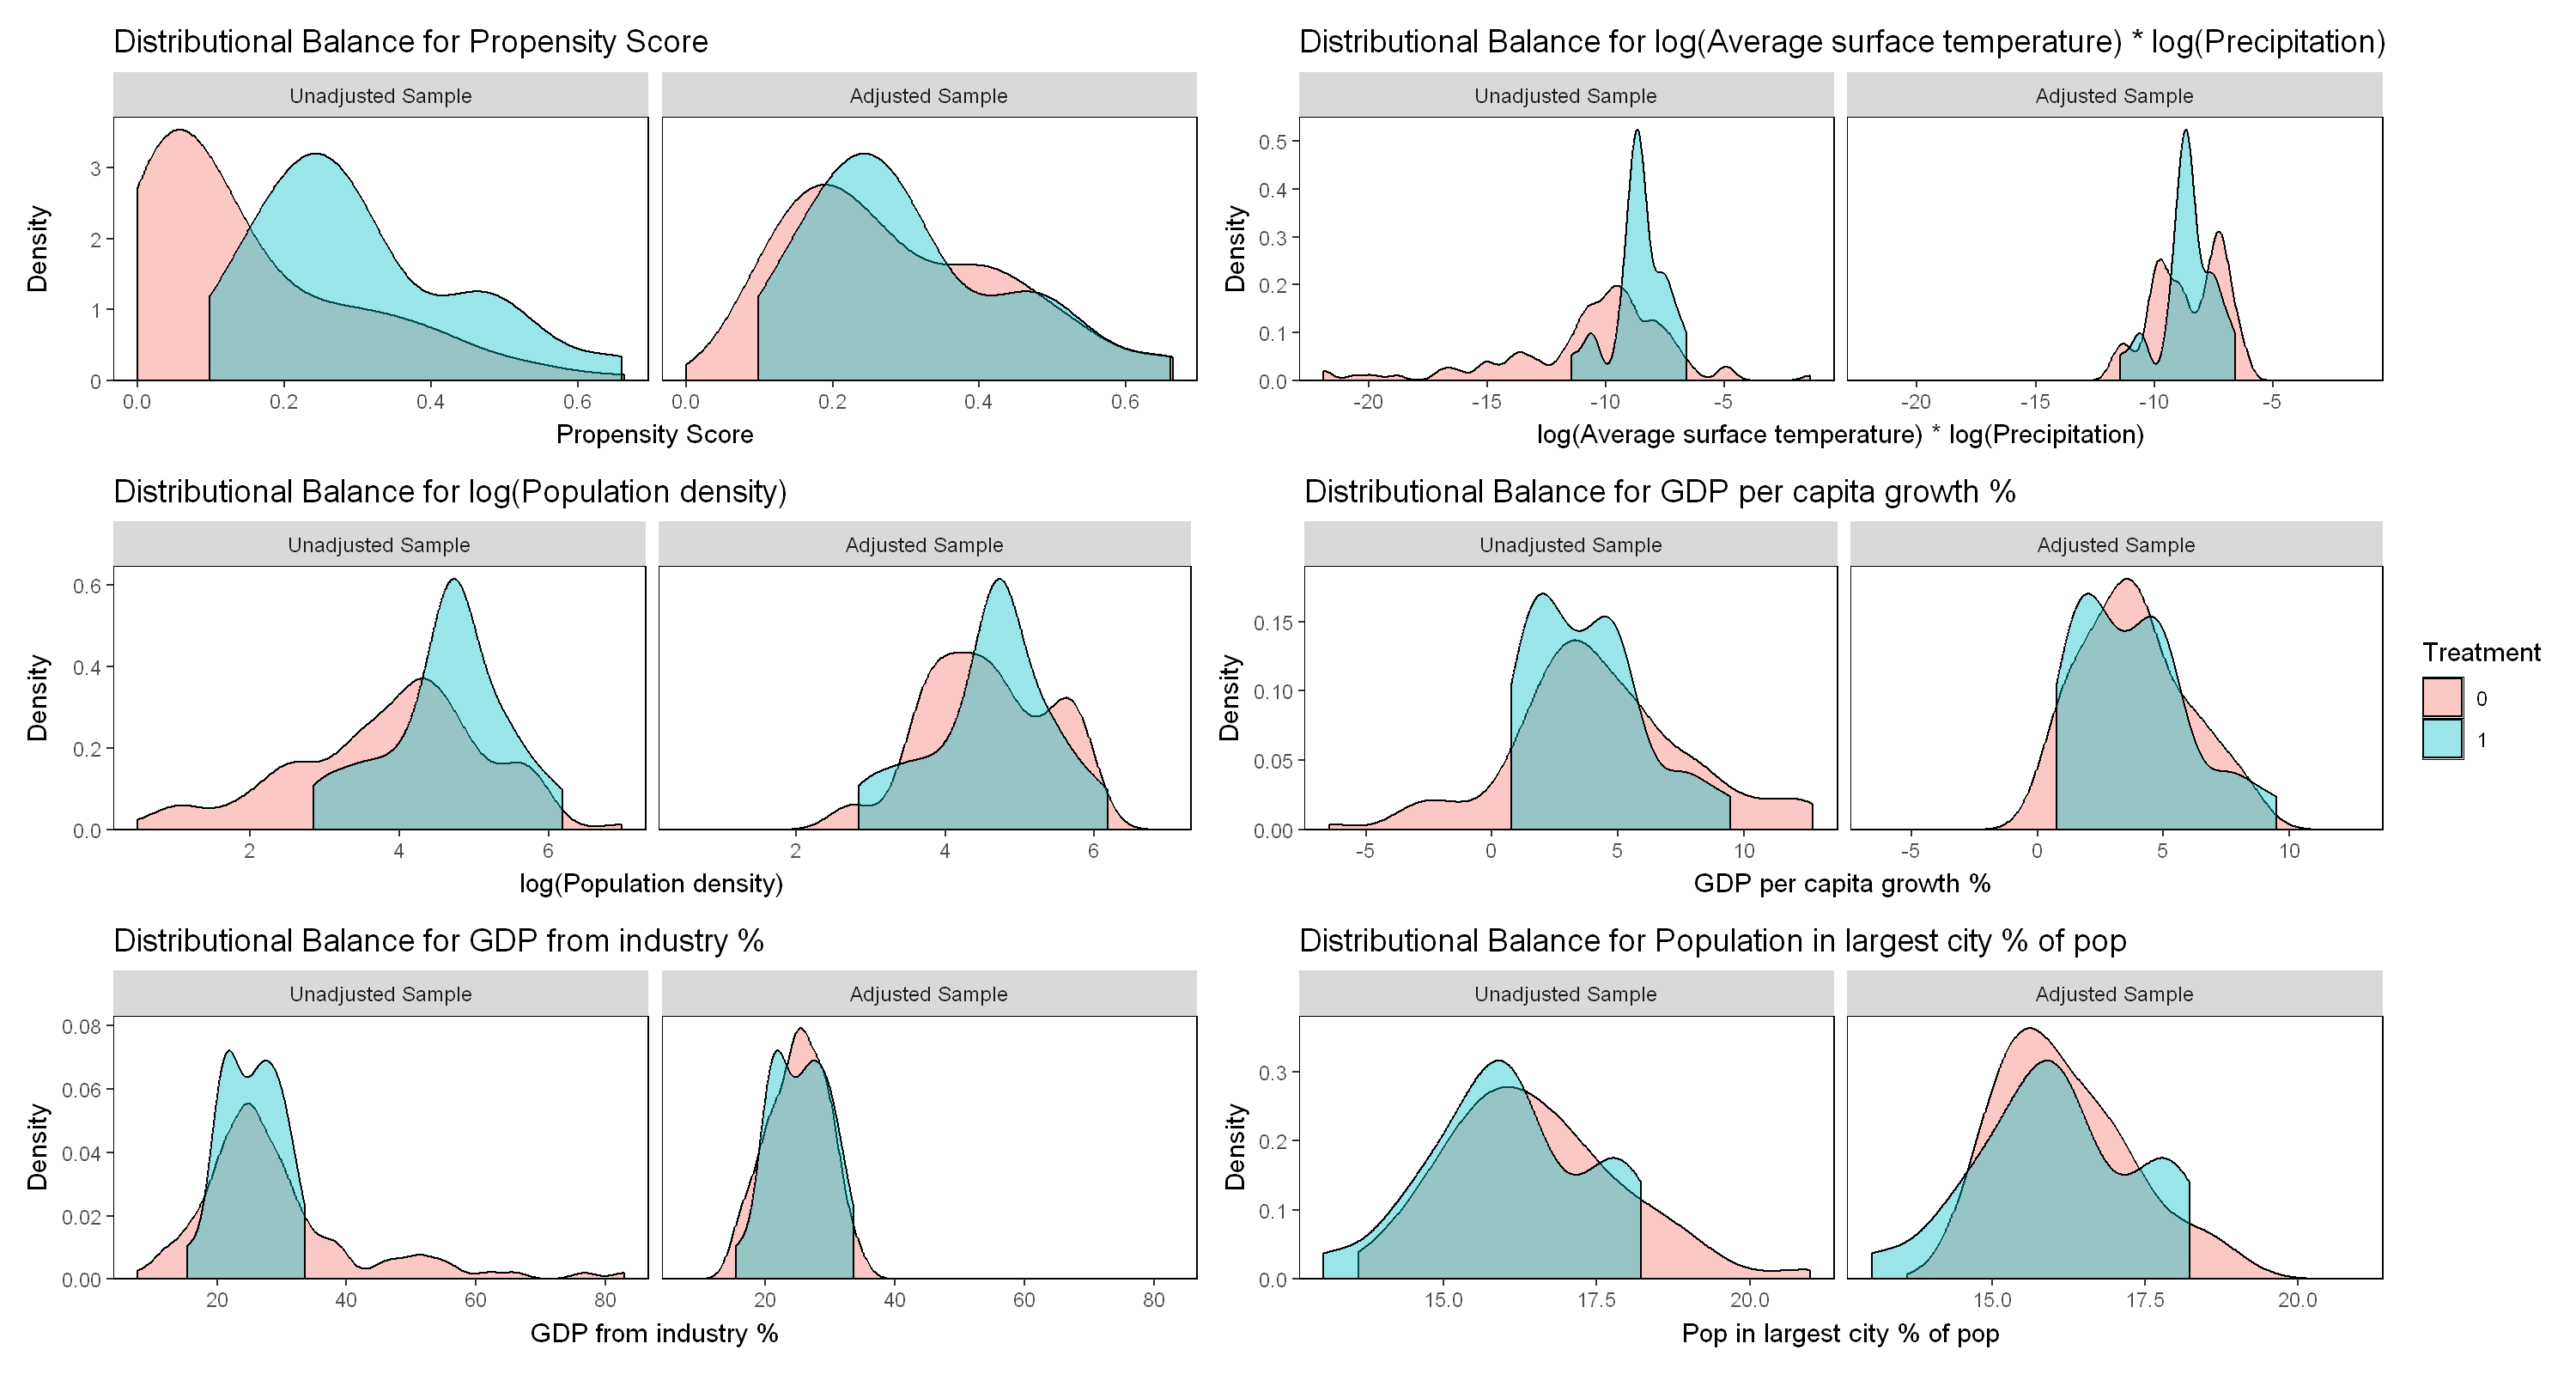

In [12]:
p0 <- bal.plot(match_obj, "distance", which = "both") + 
labs(title = "Distributional Balance for Propensity Score", x = "Propensity Score")
p1 <- bal.plot(match_obj, "I(avg_surface_temp_log * precipitation_log)", which = "both") + 
labs(title = "Distributional Balance for log(Average surface temperature) * log(Precipitation)", x = "log(Average surface temperature) * log(Precipitation)")
p2 <- bal.plot(match_obj, "gdp_per_capita_growth_pct", which = "both") + 
labs(title = "Distributional Balance for GDP per capita growth %", x = "GDP per capita growth %")
p3 <- bal.plot(match_obj, "industry_pct_gdp", which = "both") + 
labs(title = "Distributional Balance for GDP from industry %", x = "GDP from industry %")
p4 <- bal.plot(match_obj, "pop_total_log", which = "both") + 
labs(title = "Distributional Balance for Population in largest city % of pop", x = "Pop in largest city % of pop")
p5 <- bal.plot(match_obj, "pop_density_log", which = "both") + 
labs(title = "Distributional Balance for log(Population density)", x = "log(Population density)")


combined <- (p0 + p1) / (p5 + p2) / (p3 + p4)  + plot_layout(guides = "collect")
combined
ggsave("images/Distributional_balance_combined.jpg", combined, width = 14, height = 8, create.dir = TRUE)

In [6]:
matched_countries <- matched_subset %>% dplyr::select(country) %>% unique()
matched_countries_eu_ets <- matched_subset %>% filter(is_eu_ets_binary) %>% dplyr::select(country) %>% unique()
matched_countries_non_eu_ets <- matched_subset %>% filter(!is_eu_ets_binary) %>% dplyr::select(country) %>% unique()
paste0(matched_countries_eu_ets$country, collapse =", ")
paste0(matched_countries_non_eu_ets$country, collapse =", ")

[1] "Austria, Belgium, Czechia, Denmark, Estonia, Finland, France, Germany, Greece, Hungary, Ireland, Italy, Latvia, Lithuania, Luxembourg, Netherlands, Poland, Portugal, Slovakia, Slovenia, Spain, Sweden, United Kingdom"

[1] "Albania, Benin, Burundi, Cameroon, Colombia, Costa Rica, Ecuador, El Salvador, Georgia, Ghana, Guatemala, Honduras, Japan, Moldova, Nepal, New Zealand, Nicaragua, Panama, Philippines, Sri Lanka, Switzerland, Tajikistan, Uganda"

### 3.a. Distributions and differences of matched samples

In [14]:
# Calculate group averages by period
average_trends <- all_indicators_matching %>%
  filter(country %in% matched_countries$country) %>%
  group_by(is_eu_ets_binary, year) %>%
  summarize(sum_outcome = log(sum(co2_em_kt, na.rm = TRUE)), .groups = 'drop')

# Plotting the trends
# Plotting the trends with fixed Y axis
# Plotting the trends with thicker lines and different point shapes
PTA <- ggplot(average_trends, aes(x = year, y = sum_outcome, group = is_eu_ets_binary, color = is_eu_ets_binary)) +
  geom_line(size = 1.5) + # thicker lines
  geom_point(size = 3) + # different point shapes
    geom_vline(xintercept = 2005, linetype = "dotted", color = "gray20", size = 1) + # dotted line for 2005
  geom_text(aes(x = 2005, y = 15.4, label = "EU ETS launch"), color = "gray20", hjust = -0.1, size = 5) + 
  labs(x = "Year",
       y = "Sum of CO2 Emissions (kt, log)",
       color = "Is EU ETS?") +
  theme_minimal() +
    theme(legend.position = "top") +
  theme(panel.grid.major.x = element_blank(), # remove Y gridlines
        panel.grid.minor.x = element_blank(), # remove Y gridlines
        panel.grid.minor.y = element_line(color = "gray90", size = 0.4), # add X minor gridlines
        panel.grid.major.y = element_line(color = "gray60", size = 0.5), # add X minor gridlines
        axis.text.x = element_text(size = 8, color = "black", face = "bold"), # adjust X axis text
        axis.text.y = element_text(size = 8, color = "black", face = "bold"), # adjust Y axis text
        axis.title = element_text(size = 14, color = "black", face = "bold")) + # adjust axis titles
  ylim(14, 15.5) # fix Y axis range

PTA

ggsave("images/PTA.jpg", PTA, width = 10, height = 6, create.dir = TRUE)


In [7]:
pre_treatment_data <- all_indicators_matching %>%
filter(country %in% matched_countries$country) %>%
filter (year <= 2004)

after_treatment_data <- all_indicators_matching %>%
filter(country %in% matched_countries$country) %>%
filter (year > 2004)

pre_trend_model <- lm(log(co2_em_kt) ~  is_eu_ets_binary*year, data = pre_treatment_data)
after_trend_model <- lm(log(co2_em_kt) ~  is_eu_ets_binary*year, data = after_treatment_data)

summary(pre_trend_model)
summary(after_trend_model)

pre_trend_did_effect = summary(pre_trend_model)$coefficients[4,1]
pre_trend_did_p_value = summary(pre_trend_model)$coefficients[4,4]
after_trend_did_effect = summary(after_trend_model)$coefficients[4,1]
after_trend_did_p_value = summary(after_trend_model)$coefficients[4,4]


Call:
lm(formula = log(co2_em_kt) ~ is_eu_ets_binary * year, data = pre_treatment_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.0047 -0.7929 -0.2666  1.0940  5.1781 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)
(Intercept)               -55.13257   69.70584  -0.791    0.429
is_eu_ets_binaryTRUE       59.56285   98.57894   0.604    0.546
year                        0.03204    0.03486   0.919    0.358
is_eu_ets_binaryTRUE:year  -0.02864    0.04930  -0.581    0.562

Residual standard error: 1.519 on 456 degrees of freedom
Multiple R-squared:  0.3684,	Adjusted R-squared:  0.3642 
F-statistic: 88.65 on 3 and 456 DF,  p-value: < 2.2e-16



Call:
lm(formula = log(co2_em_kt) ~ is_eu_ets_binary * year, data = after_treatment_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.0200 -0.7395 -0.2710  0.9080  4.9031 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)  
(Intercept)               -70.47486   35.26025  -1.999   0.0460 *
is_eu_ets_binaryTRUE      121.43107   49.86552   2.435   0.0151 *
year                        0.03969    0.01752   2.265   0.0238 *
is_eu_ets_binaryTRUE:year  -0.05948    0.02478  -2.400   0.0167 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.406 on 686 degrees of freedom
Multiple R-squared:  0.2878,	Adjusted R-squared:  0.2847 
F-statistic: 92.43 on 3 and 686 DF,  p-value: < 2.2e-16


In [8]:
# Fit the DiD model to the full dataset
did_model <- lm(log(co2_em_kt) ~ is_eu_ets_binary*year, data = all_indicators_matching %>% filter(country %in% matched_countries$country))

summary(did_model)


Call:
lm(formula = log(co2_em_kt) ~ is_eu_ets_binary * year, data = all_indicators_matching %>% 
    filter(country %in% matched_countries$country))

Residuals:
    Min      1Q  Median      3Q     Max 
-4.0468 -0.7575 -0.2777  0.9893  5.2021 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)               -63.671873  16.830327  -3.783 0.000163 ***
is_eu_ets_binaryTRUE       94.244767  23.801677   3.960 7.97e-05 ***
year                        0.036312   0.008386   4.330 1.62e-05 ***
is_eu_ets_binaryTRUE:year  -0.045972   0.011859  -3.876 0.000112 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.45 on 1146 degrees of freedom
Multiple R-squared:  0.3267,	Adjusted R-squared:  0.3249 
F-statistic: 185.3 on 3 and 1146 DF,  p-value: < 2.2e-16


# 4. Econometric Modelling

In [9]:
model_data <- all_indicators_matching %>% filter(country %in% matched_countries$country & year >= 1995)  %>% na.omit()
# model_data <- model_data %>% mutate(auctioned_sold_EUAs_log = exp(auctioned_sold_EUAs_log)  / (exp(auctioned_sold_EUAs_log) + exp(free_EUAs_log)))
model_data <- model_data %>% group_by(country) %>% mutate(lag1_test_PM25_Total_log = dplyr::lag(PM25_Total_log, n = 1, default = NA)) %>% ungroup()
model_data2 <- model_data 
# model_data2 <- model_data2 %>% filter (year != 2010)
pdata <- pdata.frame(model_data2, index = c("country", "year"))
pdata$lag1_PM25_Total_log <- lag(pdata$PM25_Total_log,1)
pdata$lag1_co2_em_kt_log <- lag(pdata$co2_em_kt_log,1)
head(pdata)

,country,year,PM25_Cities_log,PM25_rural_log,PM25_Total_log,PM25_Towns_log,PM25_Urban_log,is_eu_ets,free_EUAs_log,auctioned_sold_EUAs_log,co2_em_kt,precipitation_log,humidity,avg_surface_temp_log,gdp_per_capita_log,gdp_per_capita_growth_pct,agriculture_pct_gdp,industry_pct_gdp,pop_total_log,pop_density_log,pop_growth_pct,pop_urban_pct_of_total,pop_in_largest_city_pct_of_urban_pop,co2_em_kt_log,is_eu_ets_binary,is_treatment_year,is_treated,lag1_test_PM25_Total_log,lag1_PM25_Total_log,lag1_co2_em_kt_log
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>
Albania-2010,Albania,2010,3.101892,3.062456,3.088767,3.107721,3.104587,No,0,0,4786.4,-2.764621,72.59,2.695033,8.317363,4.223084,17.95587,24.93746,14.88470,4.666403,-0.4964620,52.163,26.89647,8.473534,FALSE,TRUE,0,NA,NA,NA
Albania-2011,Albania,2011,3.153163,3.106379,3.135494,3.151881,3.152309,No,0,0,5137.7,-3.575551,67.46,2.687575,8.397766,2.821642,18.22679,24.48448,14.88201,4.663713,-0.2690173,53.247,26.92457,8.544361,FALSE,TRUE,0,3.088767,3.088767,8.473534
Albania-2012,Albania,2012,3.085573,3.054473,3.077312,3.096934,3.090588,No,0,0,4542.8,-3.079114,67.72,2.715092,8.354117,1.584873,18.76680,22.91855,14.88036,4.662061,-0.1651510,54.330,26.93706,8.421299,FALSE,TRUE,0,3.135494,3.135494,8.544361
Albania-2013,Albania,2013,3.002708,2.952825,2.984166,3.000720,3.001714,No,0,0,4796.4,-3.079114,69.96,2.723004,8.392324,1.187234,19.56516,23.06132,14.87853,4.660229,-0.1832114,55.387,26.97778,8.475621,FALSE,TRUE,0,3.077312,3.077312,8.421299
Albania-2014,Albania,2014,2.964757,2.923162,2.951258,2.968875,2.966303,No,0,0,5189.0,-3.079114,73.80,2.721032,8.429156,1.985388,19.99018,21.50885,14.87646,4.658159,-0.2070470,56.423,27.04496,8.554296,FALSE,TRUE,0,2.984166,2.984166,8.475621
Albania-2015,Albania,2015,2.963725,2.909630,2.943386,2.957511,2.961141,No,0,0,4798.0,-3.270169,67.43,2.726937,8.282180,2.516827,19.78021,21.76368,14.87354,4.655247,-0.2912058,57.434,27.15607,8.475954,FALSE,TRUE,0,2.951258,2.951258,8.554296


Warning message:
"The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead."


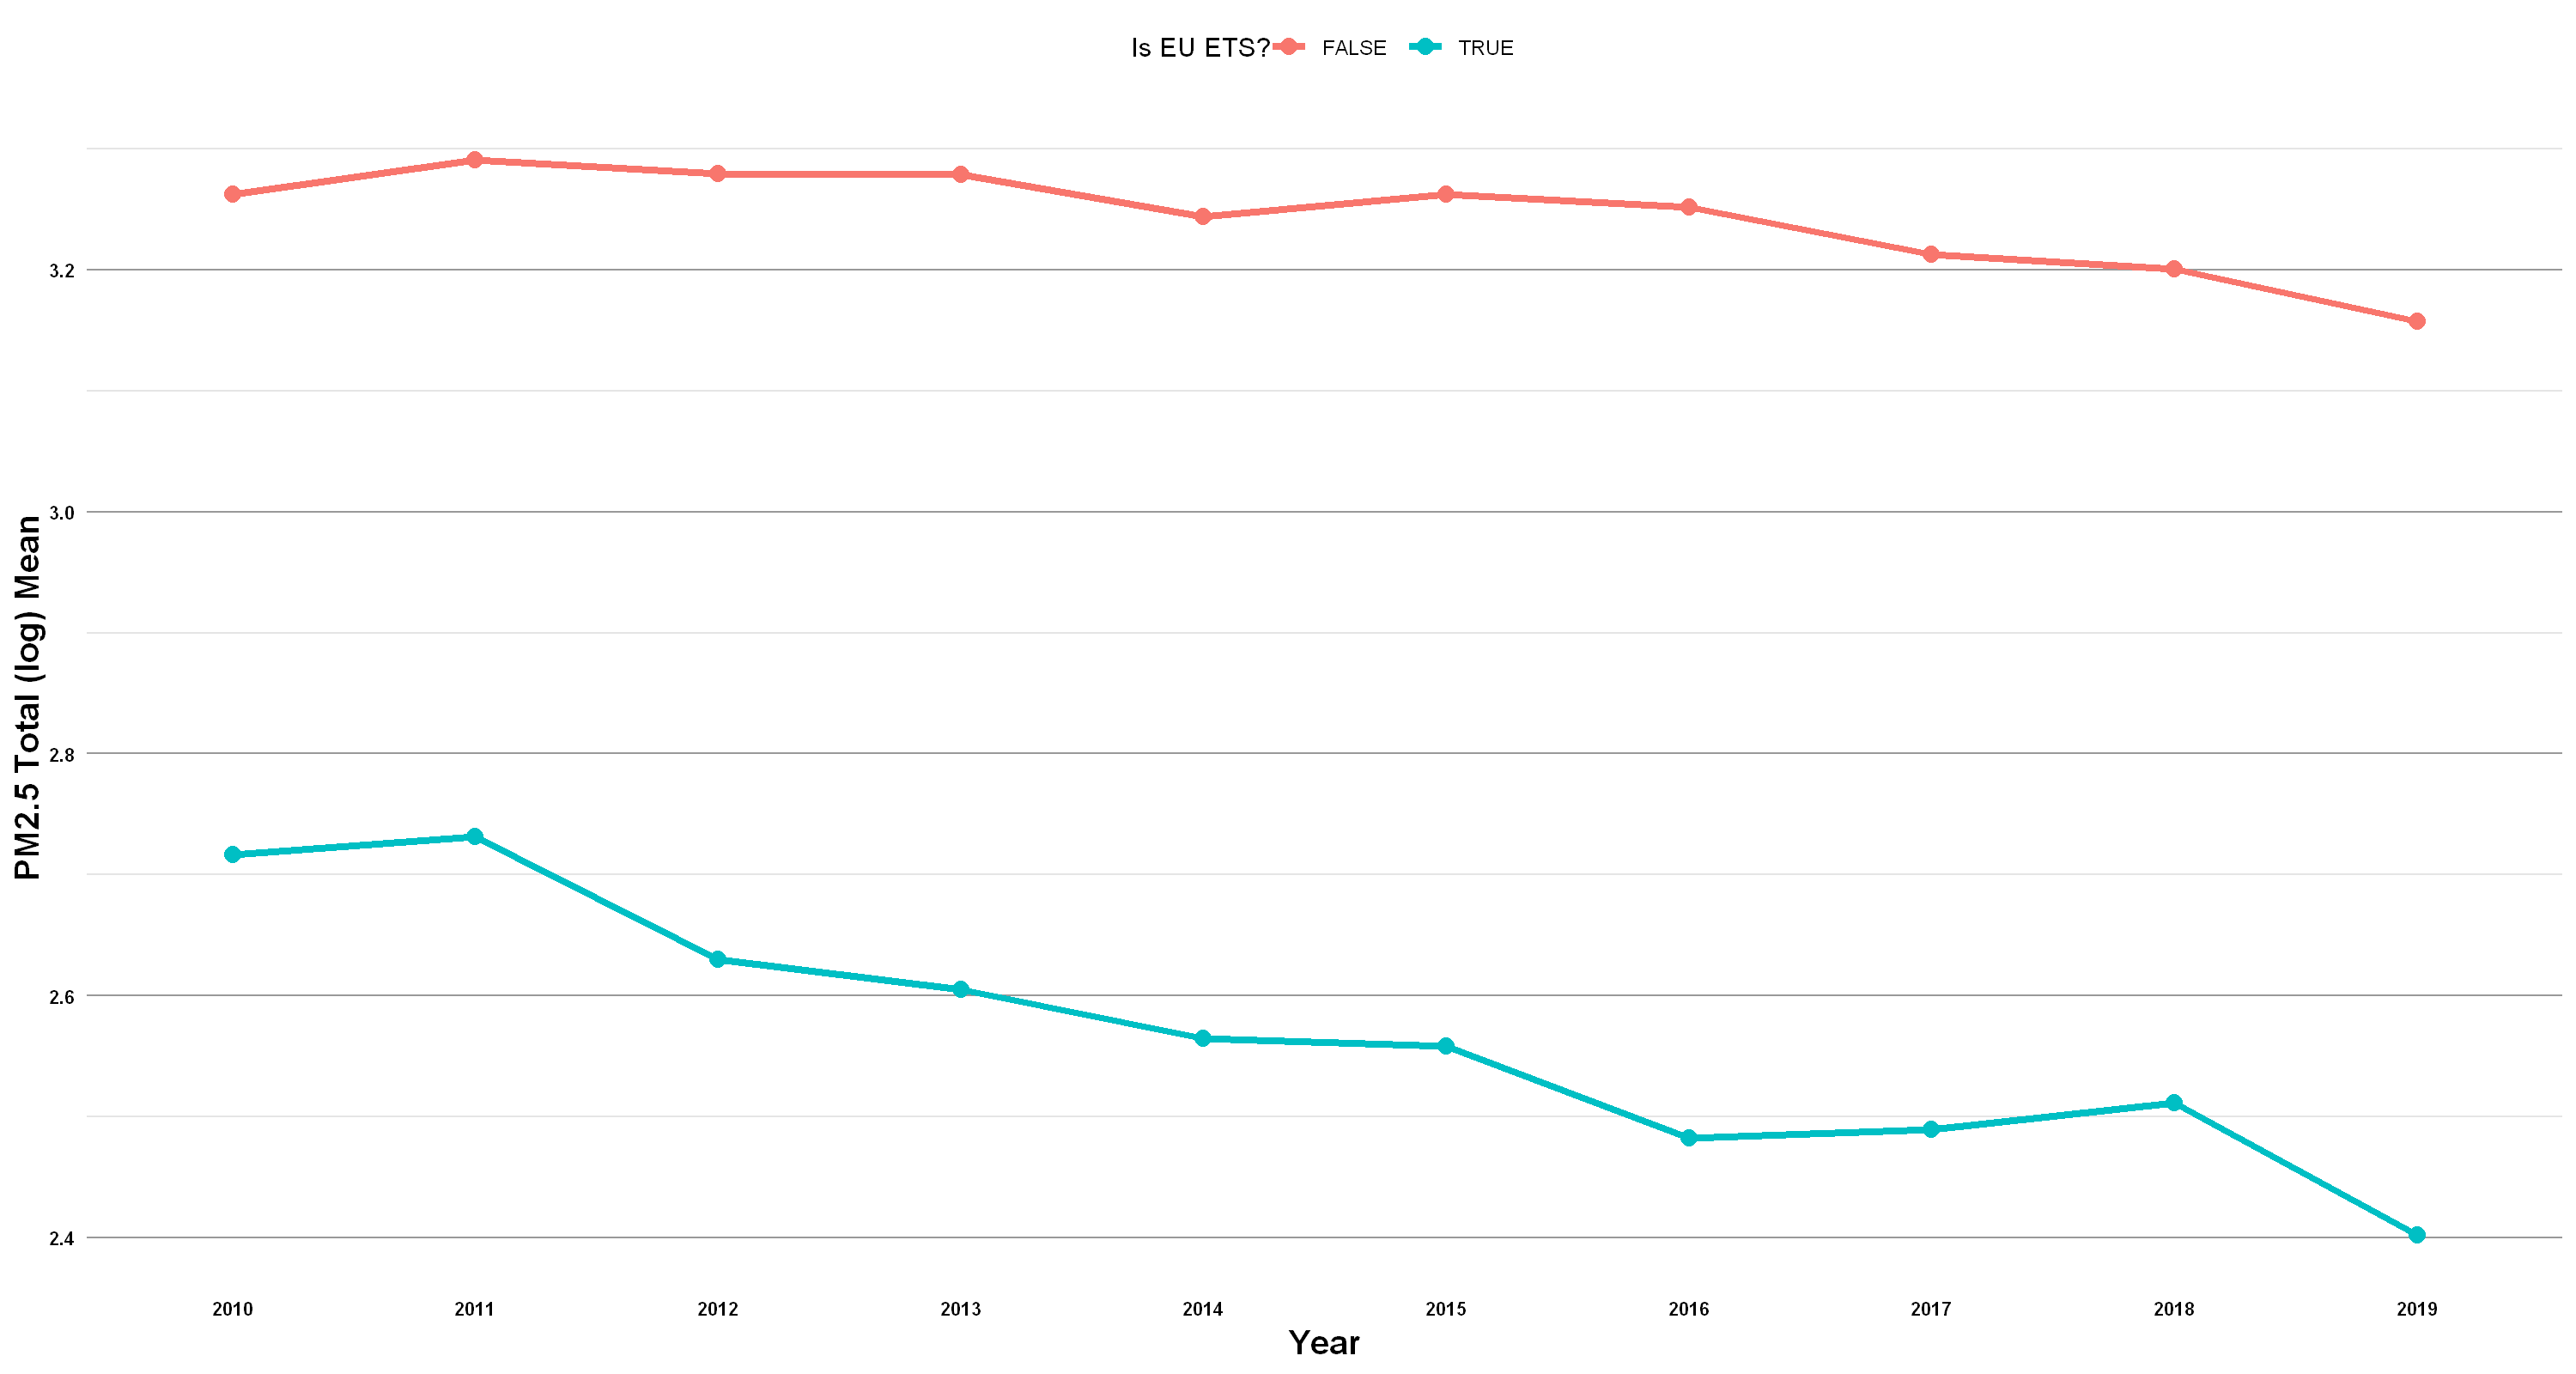

In [10]:
avg_target_variable <- model_data %>% group_by(is_eu_ets_binary,year) %>% summarise(PM25_Total_log_mean = log(mean(exp(PM25_Total_log))))
ggplot(avg_target_variable, aes(x = as.factor(year), y = PM25_Total_log_mean, group = is_eu_ets_binary, color = is_eu_ets_binary)) +
  geom_line(linewidth = 1.5) + # thicker lines
  geom_point(size = 3) + # different point shapes
  labs(x = "Year",
       y = "PM2.5 Total (log) Mean",
       color = "Is EU ETS?") +
  theme_minimal() +
    theme(legend.position = "top") +
  theme(panel.grid.major.x = element_blank(), # remove Y gridlines
        panel.grid.minor.x = element_blank(), # remove Y gridlines
        panel.grid.minor.y = element_line(color = "gray90", size = 0.4), # add X minor gridlines
        panel.grid.major.y = element_line(color = "gray60", size = 0.5), # add X minor gridlines
        axis.text.x = element_text(size = 8, color = "black", face = "bold"), # adjust X axis text
        axis.text.y = element_text(size = 8, color = "black", face = "bold"), # adjust Y axis text
        axis.title = element_text(size = 14, color = "black", face = "bold"))  
# + # adjust axis titles
#   ylim(2, 4) # fix Y axis range

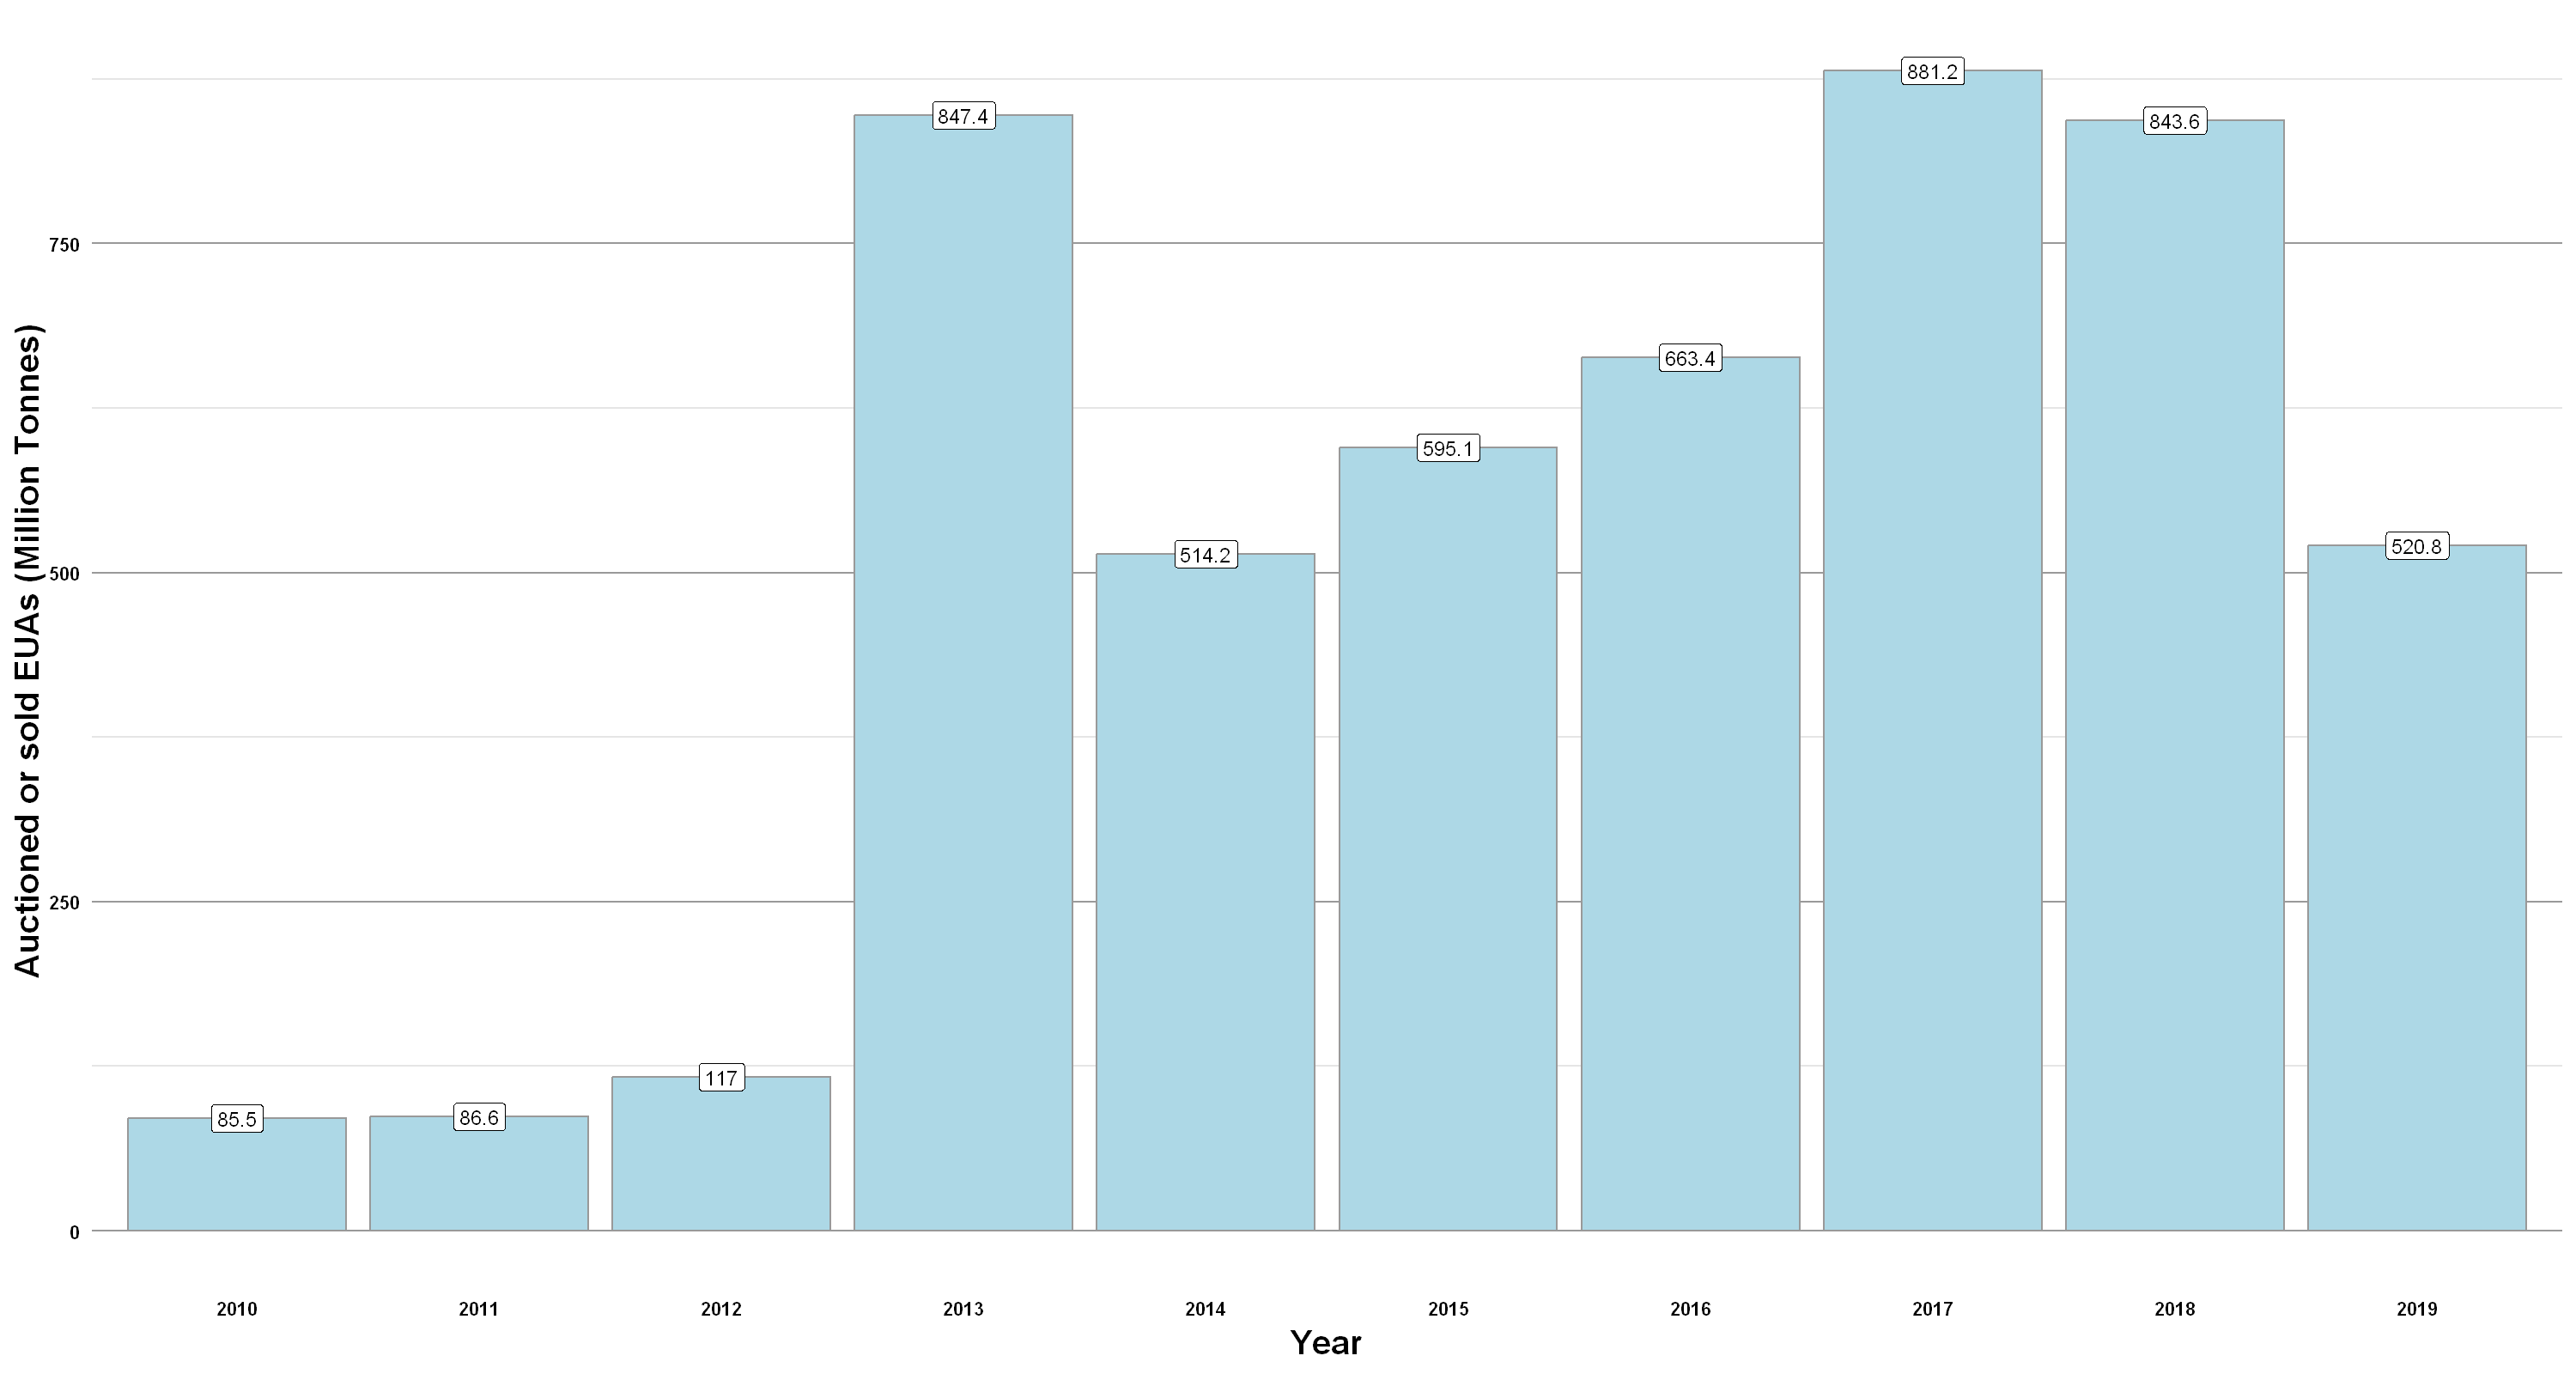

In [834]:
library(scales)

EUA_plot_data <- model_data %>% 
  group_by(year) %>% 
  summarise(sum_EUAs = sum(exp(auctioned_sold_EUAs_log)))

EUA_plot <- ggplot(EUA_plot_data, aes(x = as.factor(year), y = sum_EUAs)) +
          geom_col(fill = "lightblue", color = "gray60") +
          geom_label(aes(label=round(sum_EUAs*1e-6,1)),position = position_dodge(width=1), size = 3) +
            labs(x = "Year",
               y = "Auctioned or sold EUAs (Million Tonnes)") +
          scale_y_continuous(labels = scales::label_number(scale = 1e-6)) +  # Format Y-axis labels in millions
          theme_minimal() +
          theme(panel.grid.major.x = element_blank(),
                panel.grid.minor.x = element_blank(),
                panel.grid.minor.y = element_line(color = "gray90", size = 0.4),
                panel.grid.major.y = element_line(color = "gray60", size = 0.5),
                axis.text.x = element_text(size = 8, color = "black", face = "bold"),
                axis.text.y = element_text(size = 8, color = "black", face = "bold"),
                axis.title = element_text(size = 14, color = "black", face = "bold"))
EUA_plot

ggsave("images/Auctioned_sold_EUAs_trend.jpg", EUA_plot, width = 12, height = 5, create.dir = TRUE)

## 4.1. First Hypothesis

In [842]:
form <- PM25_Total_log ~ 
            lag1_PM25_Total_log +
            # free_EUAs_log*as.factor(year)  +
            # auctioned_sold_EUAs_log*as.factor(year)  +
            auctioned_sold_EUAs_log + 
            is_treated*as.factor(year) + 
             avg_surface_temp_log +
             precipitation_log +
             humidity +
             gdp_per_capita_log +
             gdp_per_capita_growth_pct + 
             agriculture_pct_gdp + 
             industry_pct_gdp +
             pop_total_log +
             pop_density_log +
             pop_growth_pct + 
             pop_urban_pct_of_total +
             pop_in_largest_city_pct_of_urban_pop

fixed <- plm(form, data=pdata, index=c("country", "year"), model="within", effect = "twoways")  #fixed model
general <- as.data.frame(summary(fixed)$coefficients)
# rownames(general) <- unname(unlist(column_mapping[match(rownames(general), names(column_mapping))]))
# write.csv(general, "Data/Results/General_model.csv", row.names = TRUE)
summary(fixed)

random <- plm(form, data=pdata, index=c("country", "year"), model="random")  #fixed model
# summary(random)

Twoways effects Within Model

Call:
plm(formula = form, data = pdata, effect = "twoways", model = "within", 
    index = c("country", "year"))

Balanced Panel: n = 46, T = 9, N = 414

Residuals:
       Min.     1st Qu.      Median     3rd Qu.        Max. 
-0.11368519 -0.02115591  0.00068956  0.02187375  0.19530718 

Coefficients:
                                        Estimate  Std. Error t-value  Pr(>|t|)
lag1_PM25_Total_log                   0.37646289  0.05553623  6.7787 5.415e-11
auctioned_sold_EUAs_log              -0.00019174  0.00089402 -0.2145 0.8303134
avg_surface_temp_log                 -0.11578095  0.07993503 -1.4484 0.1484216
precipitation_log                    -0.01914333  0.02786222 -0.6871 0.4925091
humidity                             -0.00294360  0.00222638 -1.3221 0.1870144
gdp_per_capita_log                    0.03211164  0.03125260  1.0275 0.3049260
gdp_per_capita_growth_pct             0.00255113  0.00118390  2.1549 0.0318786
agriculture_pct_gdp                 

In [885]:
column_names <- c("Specification",
                  "Model",
                    "Model.compared",
                    "Test",
                    "Test.value",
                    "P.value")

# Initialize an empty DataFrame with column names
diagnostics <- data.frame(matrix(ncol = length(column_names), nrow = 0))
colnames(diagnostics) <- column_names

In [886]:
# Hausman Test
# Testing for model consistency both for random and fixed effects models
ph <- phtest(fixed,random)
print(ph)

new_row <- data.frame(
    "Specification" = "General",
      "Model" = "Fixed effects",
      "Model.compared" = "Random effects",
      "Test" = "Hausman test",
      "Test.value" = ph$statistic[[1]],
      "P.value" = ph$p.value[[1]]
    )

# Append the new row to the DataFrame
diagnostics <- rbind(diagnostics, new_row)


# Testing for individual effects in fixed effects model
# H0: all ui = 0 (all individual effects are equal to zero - use OLS)
ols <- lm(form, data=pdata) # Estimate OLS
pF <- pFtest(fixed, ols) # Compare fixed effects model with OLS
print(pF)


new_row <- data.frame(
    "Specification" = "General",
      "Model" = "Fixed effects",
      "Model.compared" = "OLS",
      "Test" = "F test for twoways effects",
      "Test.value" = pF$statistic[[1]],
      "P.value" = pF$p.value[[1]]
    )

# Append the new row to the DataFrame
diagnostics <- rbind(diagnostics, new_row)



# # Testing for individual effects in random effects model
# # H0: all ui = 0 (all individual effects are equal to zero - use OLS)
# # POLS <-plm(form, data=data, index=c("Country.Name", "Year"), model="pooling")
# plmtest(random, type=c("bp")) # For random


# H0: Both models are consistent
# H1: One model is inconsistent
# H0 rejected, at least one model is inconsistent which is random effects model
# Therefore, fixed effects model should be used

# 	studentized Breusch-Pagan test
# Testing for heteroskedasticity -- are the variance of residuals are constant?
# If so, we should use roboust estimator to correct the errors
bp <- bptest(fixed, data=pdata, studentize=T)
print(bp)

new_row <- data.frame(
    "Specification" = "General",
      "Model" = "Fixed effects",
      "Model.compared" = "-",
      "Test" = "Studentized Breusch-Pagan test",
      "Test.value" = bp$statistic[[1]],
      "P.value" = bp$p.value[[1]]
    )

# Append the new row to the DataFrame
diagnostics <- rbind(diagnostics, new_row)

# Breusch-Godfrey/Wooldridge test for serial correlation in panel models
# Testing for serial correlation -- checking if we have auto correlation or not
bpg <- pbgtest(fixed)
print(bpg)

new_row <- data.frame(
    "Specification" = "General",
      "Model" = "Fixed effects",
      "Model.compared" = "-",
      "Test" = "Breusch-Godfrey/Wooldridge serial correlation test",
      "Test.value" = bpg$statistic[[1]],
      "P.value" = bpg$p.value[[1]]
    )

# Append the new row to the DataFrame
diagnostics <- rbind(diagnostics, new_row)


	Hausman Test

data:  form
chisq = 126.48, df = 22, p-value < 2.2e-16
alternative hypothesis: one model is inconsistent


	F test for twoways effects

data:  form
F = 3.6294, df1 = 44, df2 = 338, p-value = 1.022e-11
alternative hypothesis: significant effects


	studentized Breusch-Pagan test

data:  fixed
BP = 81.629, df = 31, p-value = 1.945e-06


	Breusch-Godfrey/Wooldridge test for serial correlation in panel models

data:  form
chisq = 46.411, df = 9, p-value = 5.052e-07
alternative hypothesis: serial correlation in idiosyncratic errors



In [887]:
# Controlling for heteroskedasticity and autocorrelation
# this will not change estimates but errors, t and p values
coef <- coeftest(fixed, vcov.=vcovHC(fixed, method="white1", type="HC0", cluster="group"))
print(coef)

general_coef <- as.data.frame(coef[,])
rownames(general_coef) <- unname(unlist(column_mapping[match(rownames(general_coef), names(column_mapping))]))
write.csv(general_coef, "Data/Results/General_model_coef.csv", row.names = TRUE)


t test of coefficients:

                                        Estimate  Std. Error t value  Pr(>|t|)
lag1_PM25_Total_log                   0.37646289  0.05964881  6.3113 8.684e-10
auctioned_sold_EUAs_log              -0.00019174  0.00052550 -0.3649 0.7154420
avg_surface_temp_log                 -0.11578095  0.06941003 -1.6681 0.0962275
precipitation_log                    -0.01914333  0.02562916 -0.7469 0.4556219
humidity                             -0.00294360  0.00192781 -1.5269 0.1277184
gdp_per_capita_log                    0.03211164  0.02899054  1.1077 0.2687966
gdp_per_capita_growth_pct             0.00255113  0.00096975  2.6307 0.0089107
agriculture_pct_gdp                  -0.00175795  0.00233671 -0.7523 0.4523832
industry_pct_gdp                     -0.00146587  0.00121817 -1.2033 0.2296905
pop_total_log                         1.16343827  1.46698880  0.7931 0.4282880
pop_density_log                      -0.79262199  1.45349835 -0.5453 0.5858930
pop_growth_pct            

In [897]:
form_sig <- PM25_Total_log ~ 
            lag1_PM25_Total_log +
            auctioned_sold_EUAs_log +
            is_treated*as.factor(year) +
            precipitation_log + 
            gdp_per_capita_growth_pct + 
            pop_in_largest_city_pct_of_urban_pop + 
            pop_density_log


# Estimate new model with only significant variables
fixed_sig <- plm(form_sig, data=pdata, index=c("country", "year"), model="within", effect = "twoways") # within > FE 
random_sig <- plm(form_sig, data=pdata, index=c("country", "year"), model="random")

specific <- as.data.frame(summary(fixed_sig)$coefficients)
rownames(specific) <- unname(unlist(column_mapping[match(rownames(specific), names(column_mapping))]))
write.csv(specific, "Data/Results/Specific_model.csv", row.names = TRUE)
summary(fixed_sig)

# Hausman Test
# Testing for model consistency both for random and fixed effects models
ph <- phtest(fixed_sig,random_sig)
print(ph)

new_row <- data.frame(
    "Specification" = "Specific",
      "Model" = "Fixed effects",
      "Model.compared" = "Random effects",
      "Test" = "Hausman test",
      "Test.value" = ph$statistic[[1]],
      "P.value" = ph$p.value[[1]]
    )

# Append the new row to the DataFrame
diagnostics <- rbind(diagnostics, new_row)


# Testing for individual effects in fixed effects model
# H0: all ui = 0 (all individual effects are equal to zero - use OLS)
ols_sig <- lm(form_sig, data=pdata) # Estimate OLS
pF <- pFtest(fixed_sig, ols_sig) # Compare fixed effects model with OLS
print(pF)


new_row <- data.frame(
    "Specification" = "Specific",
      "Model" = "Fixed effects",
      "Model.compared" = "OLS",
      "Test" = "F test for twoways effects",
      "Test.value" = pF$statistic[[1]],
      "P.value" = pF$p.value[[1]]
    )

# Append the new row to the DataFrame
diagnostics <- rbind(diagnostics, new_row)

# # Testing for individual effects in random effects model
# # H0: all ui = 0 (all individual effects are equal to zero - use OLS)
# # POLS <-plm(form, data=data, index=c("Country.Name", "Year"), model="pooling")
# plmtest(random, type=c("bp")) # For random


# H0: Both models are consistent
# H1: One model is inconsistent
# H0 rejected, at least one model is inconsistent which is random effects model
# Therefore, fixed effects model should be used

# 	studentized Breusch-Pagan test
# Testing for heteroskedasticity -- are the variance of residuals are constant?
# If so, we should use roboust estimator to correct the errors
bp <- bptest(fixed_sig, data=pdata, studentize=T)
print(bp)

new_row <- data.frame(
    "Specification" = "Specific",
      "Model" = "Fixed effects",
      "Model.compared" = "-",
      "Test" = "Studentized Breusch-Pagan test",
      "Test.value" = bp$statistic[[1]],
      "P.value" = bp$p.value[[1]]
    )

# Append the new row to the DataFrame
diagnostics <- rbind(diagnostics, new_row)

# Breusch-Godfrey/Wooldridge test for serial correlation in panel models
# Testing for serial correlation -- checking if we have auto correlation or not
bpg <- pbgtest(fixed_sig)
print(bpg)

new_row <- data.frame(
    "Specification" = "Specific",
      "Model" = "Fixed effects",
      "Model.compared" = "-",
      "Test" = "Breusch-Godfrey/Wooldridge serial correlation test",
      "Test.value" = bpg$statistic[[1]],
      "P.value" = bpg$p.value[[1]]
    )

# Append the new row to the DataFrame
diagnostics <- rbind(diagnostics, new_row)

Twoways effects Within Model

Call:
plm(formula = form_sig, data = pdata, effect = "twoways", model = "within", 
    index = c("country", "year"))

Balanced Panel: n = 46, T = 9, N = 414

Residuals:
       Min.     1st Qu.      Median     3rd Qu.        Max. 
-0.11128427 -0.02168283  0.00094654  0.02091108  0.20129050 

Coefficients:
                                        Estimate  Std. Error t-value  Pr(>|t|)
lag1_PM25_Total_log                   0.38447065  0.05304846  7.2475 2.788e-12
auctioned_sold_EUAs_log              -0.00037313  0.00088335 -0.4224 0.6729943
precipitation_log                    -0.04255048  0.02066325 -2.0592 0.0402197
gdp_per_capita_growth_pct             0.00193951  0.00113297  1.7119 0.0878139
pop_in_largest_city_pct_of_urban_pop  0.01846899  0.00408320  4.5232 8.383e-06
pop_density_log                       0.34893662  0.09198807  3.7933 0.0001754
is_treated:as.factor(year)2012       -0.06166263  0.01822411 -3.3836 0.0007975
is_treated:as.factor(year)2013  


	Hausman Test

data:  form_sig
chisq = 156.01, df = 14, p-value < 2.2e-16
alternative hypothesis: one model is inconsistent


	F test for twoways effects

data:  form_sig
F = 3.9062, df1 = 44, df2 = 346, p-value = 4.043e-13
alternative hypothesis: significant effects


	studentized Breusch-Pagan test

data:  fixed_sig
BP = 61.562, df = 23, p-value = 2.265e-05


	Breusch-Godfrey/Wooldridge test for serial correlation in panel models

data:  form_sig
chisq = 41.713, df = 9, p-value = 3.708e-06
alternative hypothesis: serial correlation in idiosyncratic errors



In [890]:
write.csv(diagnostics, "Data/Results/Diagnostics.csv", row.names = FALSE)
diagnostics

Specification,Model,Model.compared,Test,Test.value,P.value
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
General,Fixed effects,Random effects,Hausman test,126.479926,1.144653e-16
General,Fixed effects,OLS,F test for twoways effects,3.629353,1.022094e-11
General,Fixed effects,-,Studentized Breusch-Pagan test,81.629085,1.945106e-06
General,Fixed effects,-,Breusch-Godfrey/Wooldridge serial correlation test,46.410776,5.051762e-07
Specific,Fixed effects,Random effects,Hausman test,156.012469,4.487841e-26
Specific,Fixed effects,OLS,F test for twoways effects,3.906201,4.043294e-13
Specific,Fixed effects,-,Studentized Breusch-Pagan test,61.561550,2.264802e-05
Specific,Fixed effects,-,Breusch-Godfrey/Wooldridge serial correlation test,41.712903,3.708402e-06


In [877]:
coef_sig <- coeftest(fixed_sig, vcov.=vcovHC(fixed_sig, method="white1", type="HC0", cluster="group"))
specific_coef <- as.data.frame(coef_sig[,])
rownames(specific_coef) <- unname(unlist(column_mapping[match(rownames(specific_coef), names(column_mapping))]))
write.csv(specific_coef, "Data/Results/Specific_model_coef.csv", row.names = TRUE)
print(coef_sig)


t test of coefficients:

                                        Estimate  Std. Error t value  Pr(>|t|)
lag1_PM25_Total_log                   0.38447065  0.05645759  6.8099 4.333e-11
auctioned_sold_EUAs_log              -0.00037313  0.00054496 -0.6847 0.4939936
precipitation_log                    -0.04255048  0.02082013 -2.0437 0.0417383
gdp_per_capita_growth_pct             0.00193951  0.00092090  2.1061 0.0359153
pop_in_largest_city_pct_of_urban_pop  0.01846899  0.00383117  4.8207 2.146e-06
pop_density_log                       0.34893662  0.09633139  3.6223 0.0003358
is_treated:as.factor(year)2012       -0.06166263  0.01535269 -4.0164 7.251e-05
is_treated:as.factor(year)2013       -0.06200552  0.01917230 -3.2341 0.0013377
is_treated:as.factor(year)2014       -0.06099253  0.02190060 -2.7850 0.0056479
is_treated:as.factor(year)2015       -0.07019146  0.01991109 -3.5252 0.0004800
is_treated:as.factor(year)2016       -0.12270776  0.01937353 -6.3338 7.438e-10
is_treated:as.factor(year)

In [796]:
plot_coeftest <- broom::tidy(coef_sig, conf.int = TRUE)
# Mutate columns except "term" with NA if p-value > 0.05
plot_coeftest <- subset(plot_coeftest, grepl("^is_treated", term))
plot_coeftest$term <- unname(unlist(column_mapping[match(plot_coeftest$term, names(column_mapping))]))
# Specify the desired confidence level
confidence_level <- 0.95
# Compute the t-value corresponding to the desired confidence level
t_value <- qt((1 - confidence_level) / 2, attributes(coef_sig)$df) 

plot_coeftest_dropped <- plot_coeftest %>% filter(p.value > 0.05)
plot_coeftest_dropped <- plot_coeftest_dropped[,c("term","std.error", "estimate")]  %>% mutate_at(vars(-c(term)), ~ 0)
for_plot_coeftest <- plot_coeftest  %>% filter(p.value < 0.05)
for_plot_coeftest <- bind_rows(for_plot_coeftest,plot_coeftest_dropped) %>% arrange(term)

for_plot_coeftest <- for_plot_coeftest[,c("term","std.error", "estimate")] %>% 
mutate(conf_low = estimate - t_value * std.error) %>%
mutate(conf_hgh = estimate + t_value * std.error) %>%
mutate(estimate_prev = dplyr::lag(estimate, n = 1, default = NA)) %>% 
mutate(estimate_diff = estimate - ifelse(is.na(estimate_prev),0,estimate_prev)) %>%
mutate(std.error_diff = sqrt(std.error^2 + dplyr::lag(std.error, n = 1, default = 0)^2)) %>%
mutate(conf_low_diff = estimate_diff - t_value * std.error_diff) %>%
mutate(conf_hgh_diff = estimate_diff + t_value * std.error_diff) %>% 
mutate(across(-term, ~ ifelse(term == "EUETS:2018", NA, .)))


# for_plot_coeftest <- bind_rows(for_plot_coeftest,plot_coeftest_dropped) %>% arrange(term)
# for_plot_coeftest <- for_plot_coeftest %>% mutate_all(funs(replace_na(.,0)))


for_plot_coeftest_save <- for_plot_coeftest
colnames(for_plot_coeftest_save) <- c("Interaction term", "Std. Err.", "Estimate", "Confidence Low", "Confidence High", "Estimate prev. year", "Estimate Diff.", "Std. Err. Diff", "Confidence Low Diff", "Confidence High Diff") 
write.csv(for_plot_coeftest_save, "Data/Results/YoY_EU_ETS_effect.csv", row.names = TRUE)
for_plot_coeftest

Warning message in file(file, ifelse(append, "a", "w")):
"cannot open file 'Data/Results/YoY_EU_ETS_effect.csv': Permission denied"


ERROR: Error in file(file, ifelse(append, "a", "w")): cannot open the connection


Warning message:
"Removed 1 row containing missing values or values outside the scale range (`geom_point()`)."
Warning message:
"Removed 1 row containing missing values or values outside the scale range (`geom_text()`)."
Warning message:
"Removed 1 row containing missing values or values outside the scale range (`geom_text()`)."
Warning message:
"Removed 1 row containing missing values or values outside the scale range (`geom_text()`)."
Warning message:
"Removed 1 row containing missing values or values outside the scale range (`geom_point()`)."
Warning message:
"Removed 1 row containing missing values or values outside the scale range (`geom_text()`)."
Warning message:
"Removed 1 row containing missing values or values outside the scale range (`geom_text()`)."
Warning message:
"Removed 1 row containing missing values or values outside the scale range (`geom_text()`)."


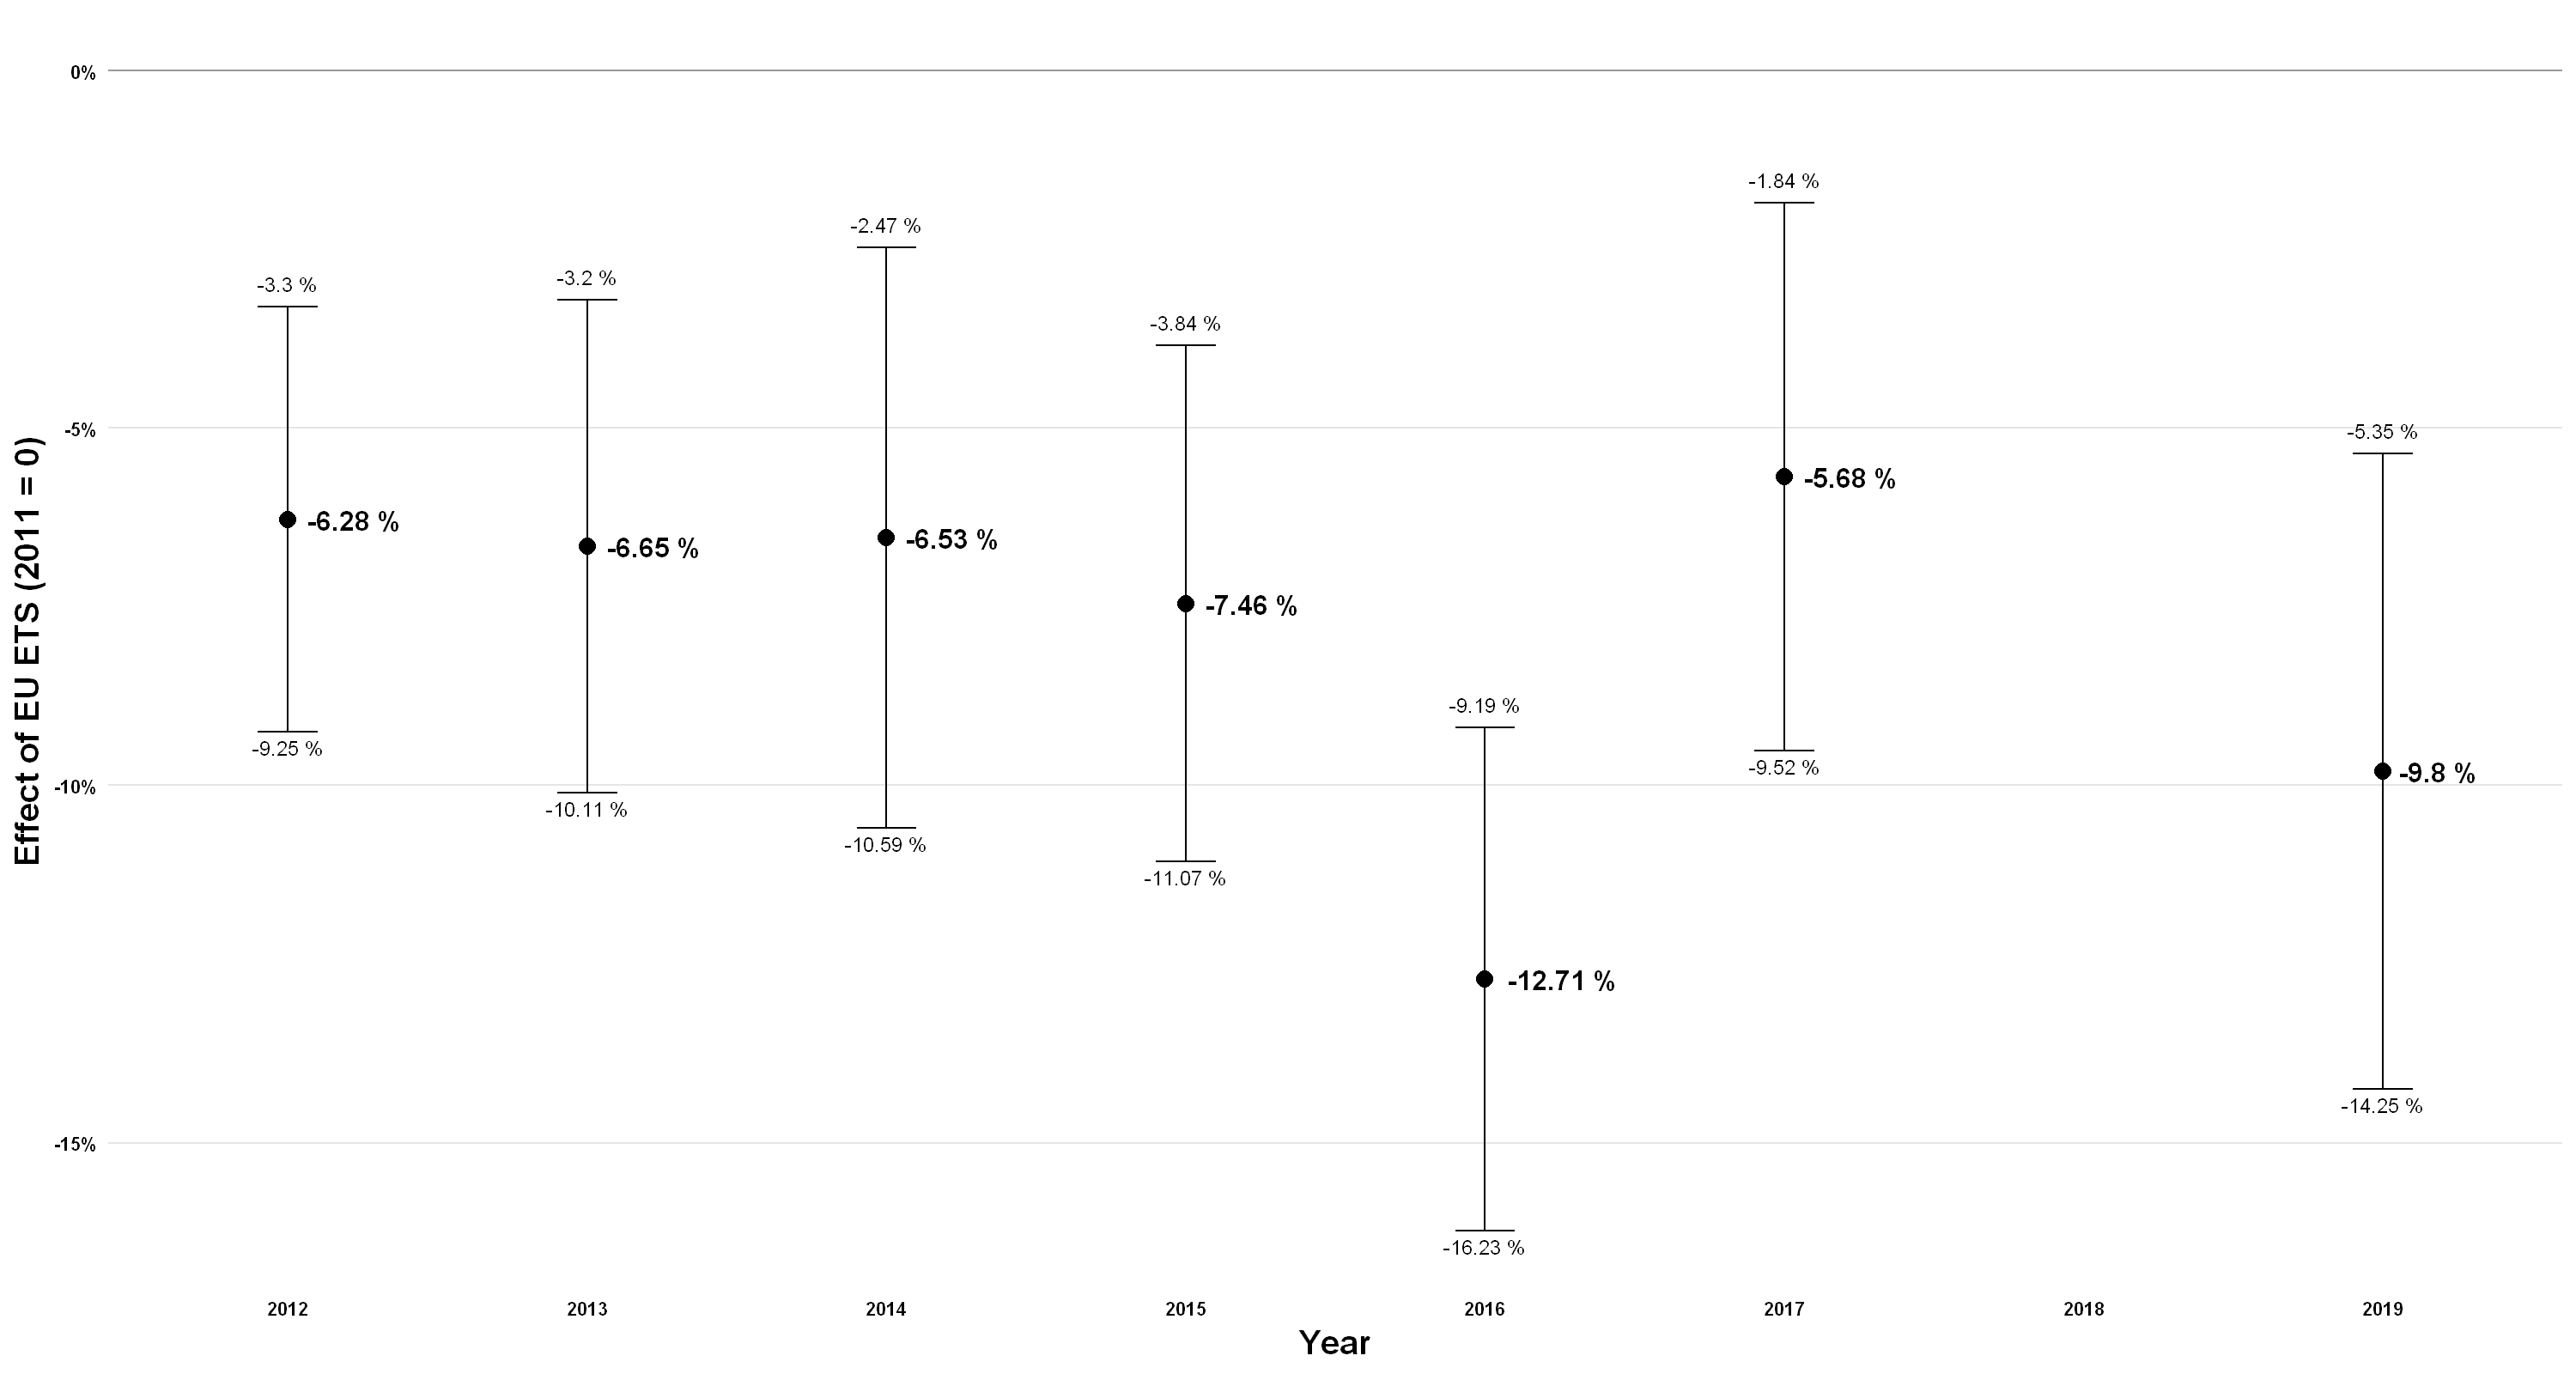

In [797]:
# Plotting the results
coef_plot <- ggplot(for_plot_coeftest, aes(x = substr(term,7,99), y = 100*estimate, ymin = 100*conf_low, ymax = 100*conf_hgh)) +
  geom_hline(yintercept = 0, color = "gray60") +  # Add horizontal line at y = 0%
    geom_point(size = 3) +
  geom_errorbar(width = 0.2) +
  geom_text(aes(label = paste(round(100*estimate, 2), "%")), hjust = -0.2, size = 4, fontface = "bold") +  # Add annotations
    geom_text(aes(label = paste(round(100*conf_low, 2), "%")), y = 100*for_plot_coeftest$conf_low, vjust = -1, size = 3) +  # Add annotations for lower confidence intervals
  geom_text(aes(label = paste(round(100*conf_hgh, 2), "%")), y = 100*for_plot_coeftest$conf_hgh, vjust = 1.5, size = 3) +  # Add annotations for upper confidence intervals
  labs(x = "Year",
       y = "Effect of EU ETS (2011 = 0)") +
  
  theme_minimal() +
  scale_y_continuous(labels = percent_format(scale = 1)) +  # Convert Y-axis ticks to percentages
  theme(panel.grid.major.x = element_blank(), # remove Y gridlines
        panel.grid.minor.x = element_blank(), # remove Y gridlines
        panel.grid.minor.y = element_blank(), # add X minor gridlines
        panel.grid.major.y = element_line(color = "gray90", size = 0.5), # add X minor gridlines
        axis.text.x = element_text(size = 8, color = "black", face = "bold"), # adjust X axis text
        axis.text.y = element_text(size = 8, color = "black", face = "bold"), # adjust Y axis text
        axis.title = element_text(size = 14, color = "black", face = "bold")) # adjust axis titles

coef_plot

ggsave("images/Results_coef_plot.jpg", coef_plot, width = 12, height = 6, create.dir = TRUE)

Warning message:
"Removed 1 row containing missing values or values outside the scale range (`geom_point()`)."
Warning message:
"Removed 1 row containing missing values or values outside the scale range (`geom_text()`)."
Warning message:
"Removed 1 row containing missing values or values outside the scale range (`geom_text()`)."
Warning message:
"Removed 1 row containing missing values or values outside the scale range (`geom_text()`)."
Warning message:
"Removed 1 row containing missing values or values outside the scale range (`geom_point()`)."
Warning message:
"Removed 1 row containing missing values or values outside the scale range (`geom_text()`)."
Warning message:
"Removed 1 row containing missing values or values outside the scale range (`geom_text()`)."
Warning message:
"Removed 1 row containing missing values or values outside the scale range (`geom_text()`)."


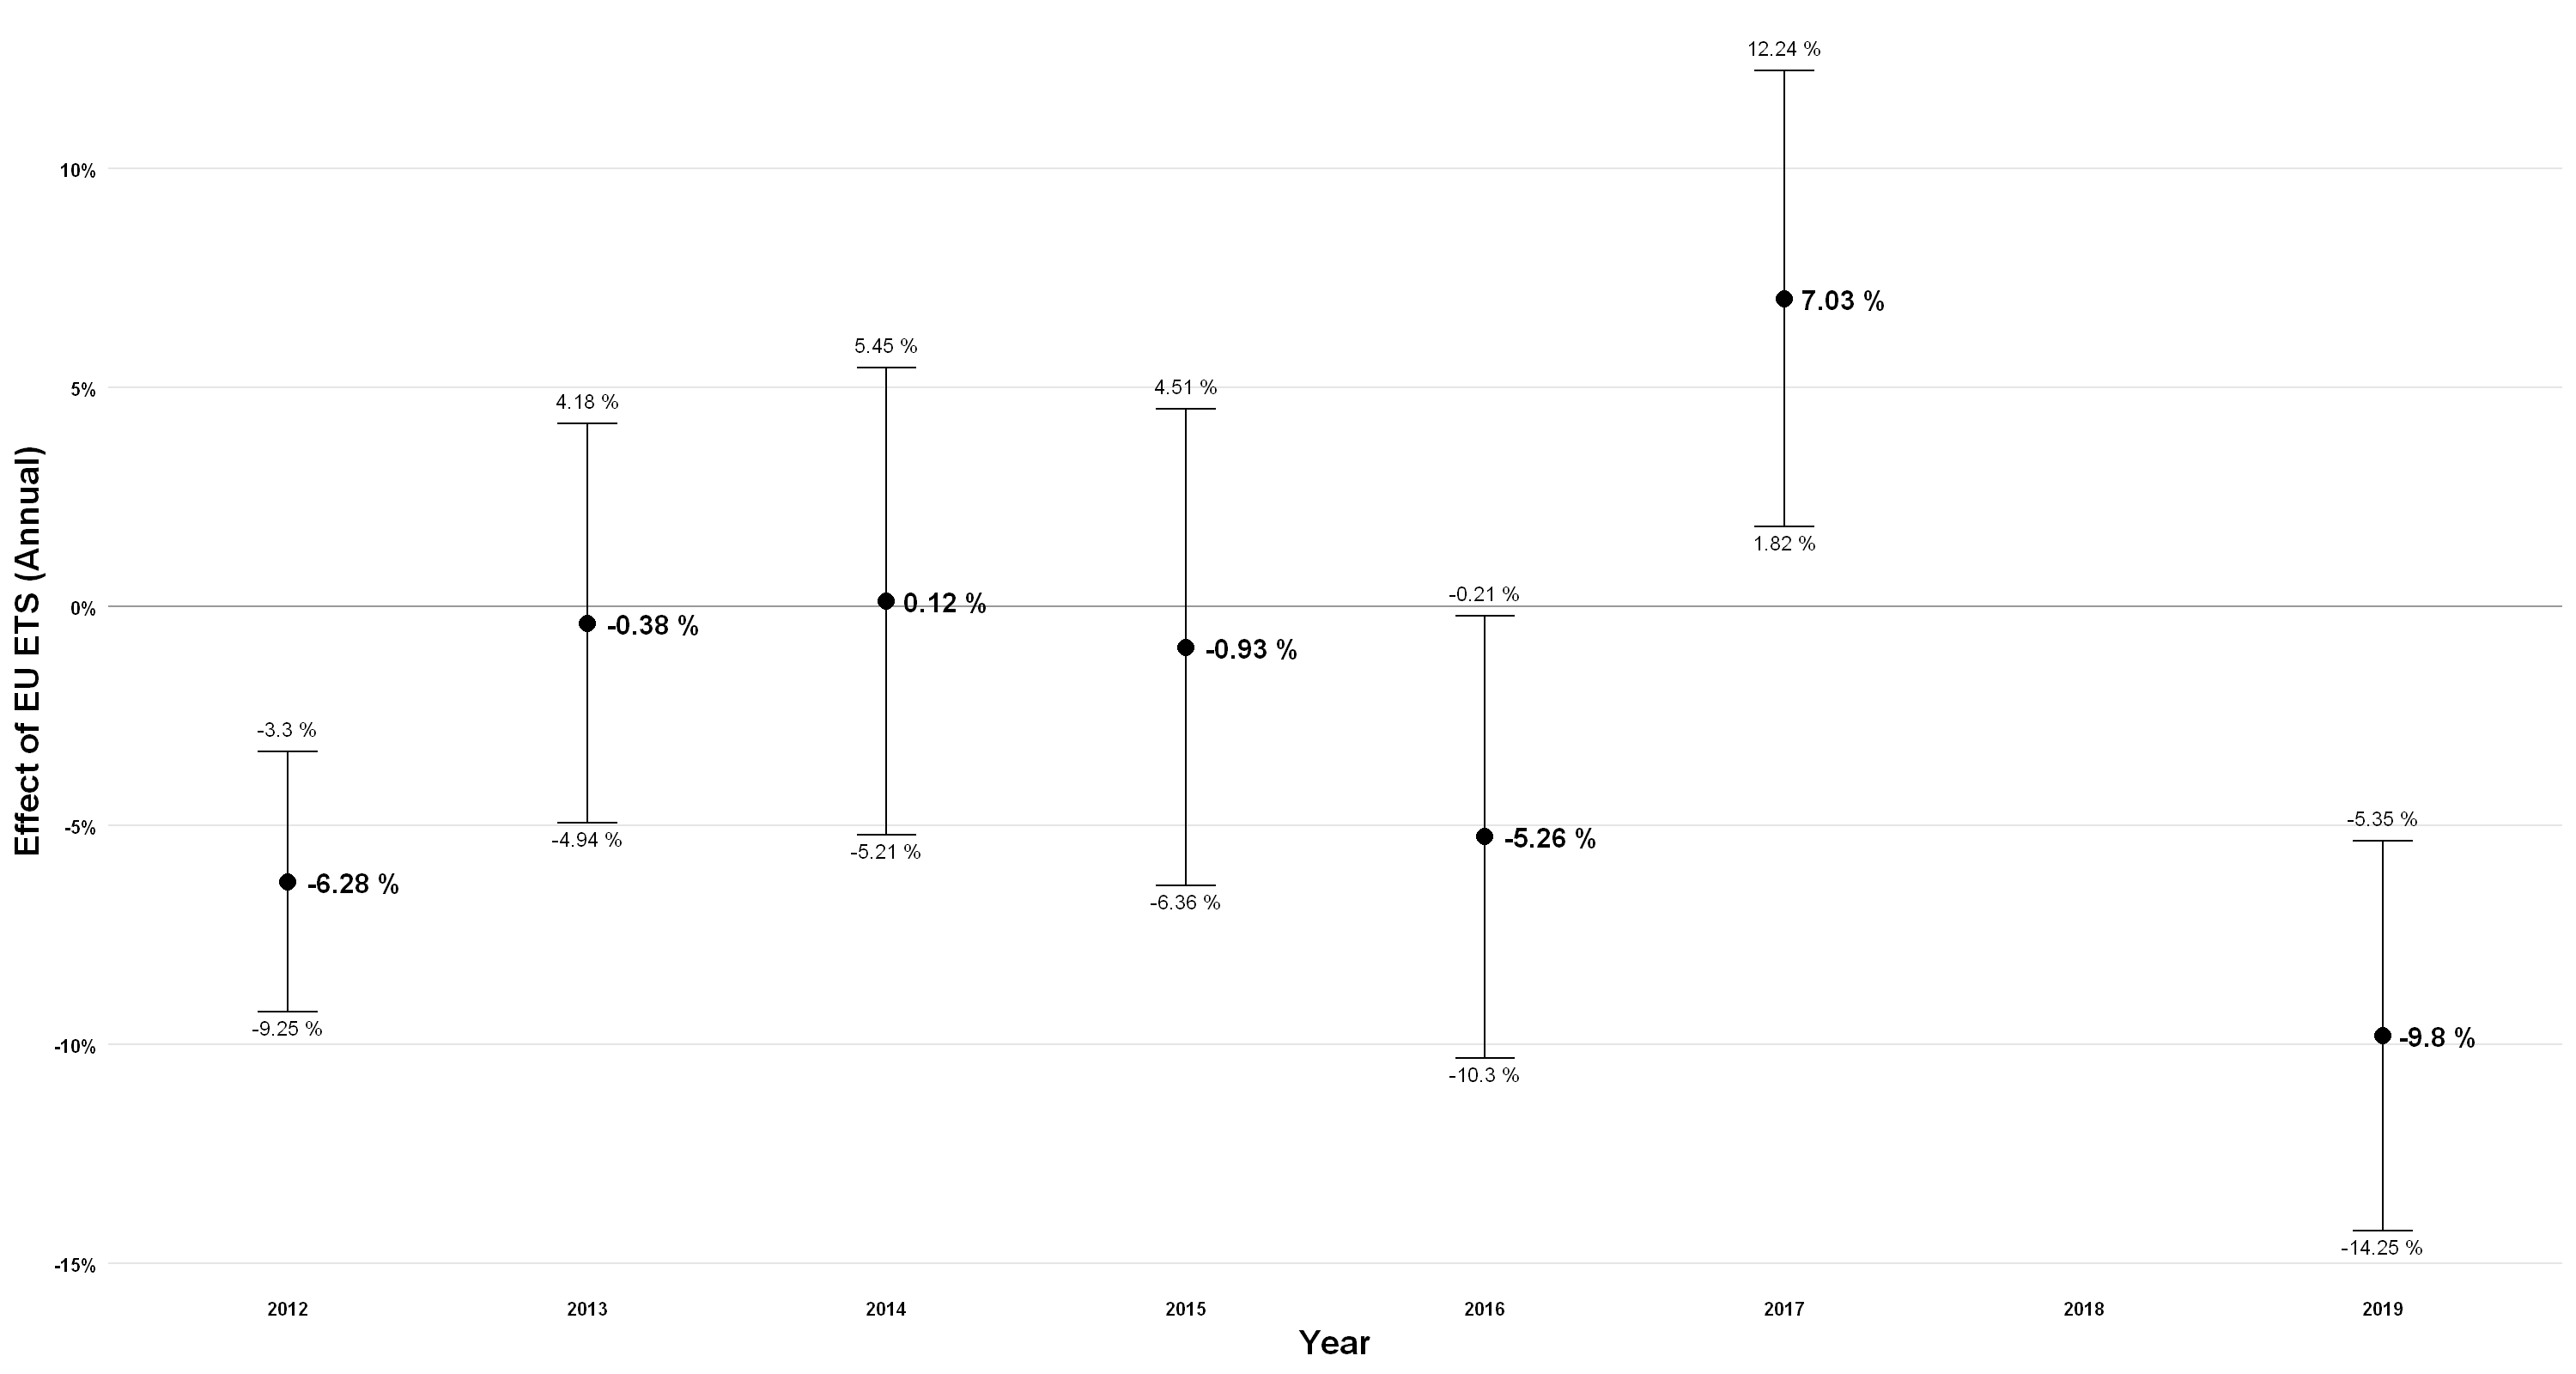

In [798]:
# Plotting the results
coef_plot_diff <- ggplot(for_plot_coeftest, aes(x = substr(term,7,99), y = 100*estimate_diff, ymin = 100*conf_low_diff, ymax = 100*conf_hgh_diff)) +
  geom_hline(yintercept = 0, color = "gray60") +  # Add horizontal line at y = 0%
    geom_point(size = 3) +
  geom_errorbar(width = 0.2) +
  geom_text(aes(label = paste(round(100*estimate_diff, 2), "%")), hjust = -0.2, size = 4, fontface = "bold") +  # Add annotations
    geom_text(aes(label = paste(round(100*conf_low_diff, 2), "%")), y = 100*for_plot_coeftest$conf_low_diff, vjust = -1, size = 3) +  # Add annotations for lower confidence intervals
  geom_text(aes(label = paste(round(100*conf_hgh_diff, 2), "%")), y = 100*for_plot_coeftest$conf_hgh_diff, vjust = 1.5, size = 3) +  # Add annotations for upper confidence intervals
  labs(x = "Year",
       y = "Effect of EU ETS (Annual)") +
  
  theme_minimal() +
  scale_y_continuous(labels = percent_format(scale = 1)) +  # Convert Y-axis ticks to percentages
  theme(panel.grid.major.x = element_blank(), # remove Y gridlines
        panel.grid.minor.x = element_blank(), # remove Y gridlines
        panel.grid.minor.y = element_blank(), # add X minor gridlines
        panel.grid.major.y = element_line(color = "gray90", size = 0.5), # add X minor gridlines
        axis.text.x = element_text(size = 8, color = "black", face = "bold"), # adjust X axis text
        axis.text.y = element_text(size = 8, color = "black", face = "bold"), # adjust Y axis text
        axis.title = element_text(size = 14, color = "black", face = "bold")) # adjust axis titles

coef_plot_diff

# 1 - for_plot_coeftest$estimate_val[1] *
# for_plot_coeftest$estimate_val[2] *
# for_plot_coeftest$estimate_val[3] *
# for_plot_coeftest$estimate_val[4] *
# for_plot_coeftest$estimate_val[5] *
# for_plot_coeftest$estimate_val[6] 

ggsave("images/Results_coef_plot_diff.jpg", coef_plot_diff, width = 12, height = 6, create.dir = TRUE)

## 4.1. Second Hypothesis

In [761]:
# form2 <- PM25_Total_log ~ 
#             lag1_PM25_Total_log+
#             is_treated*as.factor(year) +
#             auctioned_sold_EUAs_log +
# # *as.factor(year) +
#              avg_surface_temp_log +
#              precipitation_log +
#              humidity +
#              gdp_per_capita_log +
#              gdp_per_capita_growth_pct + 
#              agriculture_pct_gdp + 
#              industry_pct_gdp +
#              pop_total_log +
#              pop_density_log +
#              pop_growth_pct + 
#              pop_urban_pct_of_total +
#              pop_in_largest_city_pct_of_urban_pop

# fixed2 <- plm(form2, data=pdata, index=c("country", "year"), model="within", effect = "twoways")  #fixed model
# general2 <- as.data.frame(summary(fixed2)$coefficients)
# # rownames(general2) <- unname(unlist(column_mapping[match(rownames(general2), names(column_mapping))]))
# # write.csv(general2, "Data/Results/General_model2.csv", row.names = TRUE)
# summary(fixed2)

# random2 <- plm(form2, data=pdata, index=c("country", "year"), model="random")  #fixed model
# # summary(random)

In [762]:
# # Testing for individual effects in fixed effects model
# # H0: all ui = 0 (all individual effects are equal to zero - use OLS)
# ols2 <- lm(form2, data=pdata) # Estimate OLS
# pF2 <- pFtest(fixed2, ols2) # Compare fixed effects model with OLS
# print(pF2)

# # # Testing for individual effects in random effects model
# # # H0: all ui = 0 (all individual effects are equal to zero - use OLS)
# # # POLS <-plm(form, data=data, index=c("Country.Name", "Year"), model="pooling")
# # plmtest(random, type=c("bp")) # For random

# # Hausman Test
# # Testing for model consistency both for random and fixed effects models
# phtest(fixed2,random2)
# # H0: Both models are consistent
# # H1: One model is inconsistent
# # H0 rejected, at least one model is inconsistent which is random effects model
# # Therefore, fixed effects model should be used

# # 	studentized Breusch-Pagan test
# # Testing for heteroskedasticity -- are the variance of residuals are constant?
# # If so, we should use roboust estimator to correct the errors
# bp2 <- bptest(form2, data=pdata, studentize=T)
# print(bp2)

# # Breusch-Godfrey/Wooldridge test for serial correlation in panel models
# # Testing for serial correlation -- checking if we have auto correlation or not
# bpg2 <- pbgtest(fixed2)
# print(bpg2)

In [763]:
# # Controlling for heteroskedasticity and autocorrelation
# # this will not change estimates but errors, t and p values
# coef2 <- coeftest(fixed2, vcov.=vcovHC(fixed2, method="white1", type="HC0", cluster="group"))
# print(coef2)

# general_coef2 <- as.data.frame(coef2[,])
# # rownames(general_coef2) <- unname(unlist(column_mapping[match(rownames(general_coef2), names(column_mapping))]))
# # write.csv(general_coef2, "Data/Results/General_model_coef2.csv", row.names = TRUE)

In [764]:
# form_sig2 <- PM25_Total_log ~ 
#             lag1_PM25_Total_log + 
# is_treated*as.factor(year) + 
#             auctioned_sold_EUAs_log +
#             precipitation_log + 
#             gdp_per_capita_growth_pct + 
#             pop_in_largest_city_pct_of_urban_pop + 
#             pop_density_log


# # Estimate new model with only significant variables
# fixed_sig2 <- plm(form_sig2, data=pdata, index=c("country", "year"), model="within", effect = "twoways") # within > FE 

# specific2 <- as.data.frame(summary(fixed_sig2)$coefficients)
# # rownames(specific2) <- unname(unlist(column_mapping[match(rownames(specific2), names(column_mapping))]))
# # write.csv(specific2, "Data/Results/Specific_model2.csv", row.names = TRUE)
# summary(fixed_sig2)

In [765]:
# # Testing if all insignificant variables are jointly insignificant by comparing
# # the general model and the model with only significant variables
# pF2 <- pFtest(fixed2, fixed_sig2)
# pF2
# # H0: all insignificant variables are jointly insignificant
# # H1: all insignificant variables are not jointly insignificant

# # Not rejected, we can remove all insignificant variables from the general model

# # # Another joint insignificance test if all insignificant variables are jointly insignificant
# # lH <- linearHypothesis(fixed, paste(insig, "=0"))
# # lH
# # # H0: All insignificant variables are jointly insignificant
# # # Not rejected, we can remove all insignificant variables from the general model

# # Testing for individual effects in fixed effects model
# # H0: all ui = 0 (all individual effects are equal to zero - use OLS)
# ols_sig2 <- lm(form_sig2, data=pdata)
# pF_sig2 <- pFtest(fixed_sig2, ols2)
# print(pF_sig2)

# # Final model diagnostics
# # Testing for heteroskedasticity -- are the variance of residuals are constant?
# # If so, we should use roboust estimator to correct the errors
# bp_sig2 <- bptest(form_sig2, data=pdata, studentize=T)
# print(bp_sig2)

# # Testing for serial correlation -- checking if we have auto correlation or not
# bpg_sig2 <- pbgtest(fixed_sig2)
# print(bpg_sig2)
# coef_sig2 <- coeftest(fixed_sig2, vcov.=vcovHC(fixed_sig2, method="white1", type="HC0", cluster="group"))
# specific_coef2 <- as.data.frame(coef_sig2[,])
# # rownames(specific_coef2) <- unname(unlist(column_mapping[match(rownames(specific_coef2), names(column_mapping))]))
# # write.csv(specific_coef2, "Data/Results/Specific_model_coef2.csv", row.names = TRUE)
# print(coef_sig2)

In [766]:
# plot_coeftest2 <- broom::tidy(coef_sig2, conf.int = TRUE)
# # Mutate columns except "term" with NA if p-value > 0.05
# plot_coeftest2 <- broom::tidy(coef_sig2, conf.int = TRUE)
# plot_coeftest2 <- subset(plot_coeftest2, grepl("is_treated", term))
# # plot_coeftest2$term <- unname(unlist(column_mapping[match(plot_coeftest2$term, names(column_mapping))]))
# # for_plot_coeftest$term <- as.factor(substr(for_plot_coeftest$term,27,99))
# # Specify the desired confidence level
# confidence_level2 <- 0.95
# # Compute the t-value corresponding to the desired confidence level
# t_value2 <- qt((1 - confidence_level2) / 2, attributes(coef_sig2)$df) 

# plot_coeftest_dropped2 <- plot_coeftest2 %>% filter(p.value > 0.05)
# plot_coeftest_dropped2 <- plot_coeftest_dropped2[,c("term","std.error", "estimate")] %>% mutate_at(vars(-term), ~ NA)

# for_plot_coeftest2 <- plot_coeftest2 %>% filter(p.value < 0.05)

# for_plot_coeftest2 <- for_plot_coeftest2[,c("term","std.error", "estimate")] %>% 
# # mutate(estimate_prev = dplyr::lag(estimate, n = 1, default = NA)) %>% 
# # mutate(estimate_diff = estimate - ifelse(is.na(estimate_prev),0,estimate_prev)) %>%
# # mutate(std.error_diff = sqrt(std.error^2 + dplyr::lag(std.error, n = 1, default = 0)^2)) %>%
# mutate(conf_low = estimate - t_value * std.error) %>%
# mutate(conf_hgh = estimate + t_value * std.error)

# for_plot_coeftest2 <- bind_rows(for_plot_coeftest2,plot_coeftest_dropped2) %>% arrange(term)
# # for_plot_coeftest <- for_plot_coeftest %>% mutate_all(funs(replace_na(.,0)))


# for_plot_coeftest_save2 <- for_plot_coeftest2
# colnames(for_plot_coeftest_save2) <- c("Interaction term", "Std. Err.", "Estimate", "Estimate prev. year", "Estimate Diff.", "Std. Err. Diff", "Confidence Low", "Confidence High") 
# write.csv(for_plot_coeftest_save2, "Data/Results/YoY_EU_ETS_effect2.csv", row.names = TRUE)
# for_plot_coeftest2

In [767]:
# # Plotting the results
# coef_plot2 <- ggplot(for_plot_coeftest2, aes(x = substr(term,7,99), y = 100*estimate, ymin = 100*conf_low, ymax = 100*conf_hgh)) +
#   geom_hline(yintercept = 0, color = "gray60") +  # Add horizontal line at y = 0%
#     geom_point(size = 3) +
#   geom_errorbar(width = 0.2) +
#   geom_text(aes(label = paste(round(100*estimate, 2), "%")), hjust = -0.2, size = 4, fontface = "bold") +  # Add annotations
#     geom_text(aes(label = paste(round(100*conf_low, 2), "%")), y = 100*for_plot_coeftest2$conf_low, vjust = -1, size = 3) +  # Add annotations for lower confidence intervals
#   geom_text(aes(label = paste(round(100*conf_hgh, 2), "%")), y = 100*for_plot_coeftest2$conf_hgh, vjust = 1.5, size = 3) +  # Add annotations for upper confidence intervals
#   labs(x = "Year",
#        y = "Effect of EU ETS") +
  
#   theme_minimal() +
#   scale_y_continuous(labels = percent_format(scale = 1)) +  # Convert Y-axis ticks to percentages
#   theme(panel.grid.major.x = element_blank(), # remove Y gridlines
#         panel.grid.minor.x = element_blank(), # remove Y gridlines
#         panel.grid.minor.y = element_blank(), # add X minor gridlines
#         panel.grid.major.y = element_line(color = "gray90", size = 0.5), # add X minor gridlines
#         axis.text.x = element_text(size = 8, color = "black", face = "bold"), # adjust X axis text
#         axis.text.y = element_text(size = 8, color = "black", face = "bold"), # adjust Y axis text
#         axis.title = element_text(size = 14, color = "black", face = "bold")) # adjust axis titles

# coef_plot2

# ggsave("images/Results_coef_plot2.jpg", coef_plot2, width = 12, height = 6, create.dir = TRUE)

In [768]:
# formula_text <- "PM25_Total_log ~ lag(PM25_Total_log, 1:1) + is_treated + avg_surface_temp_log + precipitation_log + humidity + gdp_per_capita_log +  gdp_per_capita_growth_pct + agriculture_pct_gdp + industry_pct_gdp +pop_total_log +  pop_density_log + pop_growth_pct +  pop_urban_pct_of_total + pop_in_largest_city_pct_of_urban_pop"

# # Define the formula for System GMM
# gmm_formula <- as.formula(paste0(formula_text, " | lag(PM25_Total_log, 1)"))
# gmm_formula2 <- as.formula(paste0(formula_text, " | lag(PM25_Total_log, 2)"))
# gmm_formula3 <- as.formula(paste0(formula_text, " | lag(PM25_Total_log, 2:3)"))
# gmm_formula4 <- as.formula(paste0(formula_text, " | lag(PM25_Total_log, 2:4)"))
# gmm_formula5 <- as.formula(paste0(formula_text, " | lag(PM25_Total_log, 2:5)"))
# gmm_formula6 <- as.formula(paste0(formula_text, " | lag(PM25_Total_log, 2:6)"))
# gmm_formula99 <- as.formula(paste0(formula_text, " | lag(PM25_Total_log, 2)"))


# # Fit the System GMM model using one-step estimator
# gmm1 <- pgmm(gmm_formula, data = pdata, effect = "twoways", model = "onestep", transformation = "ld")
# gmm2 <- pgmm(gmm_formula2, data = pdata, effect = "twoways", model = "onestep", transformation = "ld")
# gmm3 <- pgmm(gmm_formula3, data = pdata, effect = "twoways", model = "onestep", transformation = "ld")
# gmm4 <- pgmm(gmm_formula4, data = pdata, effect = "twoways", model = "onestep", transformation = "ld")
# gmm5 <- pgmm(gmm_formula5, data = pdata, effect = "twoways", model = "onestep", transformation = "ld")
# gmm6 <- pgmm(gmm_formula99, data = pdata, effect = "twoways", model = "onestep", transformation = "ld")
# # Print the summary of the GMM model
# # summary(gmm1)


# # writing code to make a function to add more information to the stargazer GMM table
# # will only involve wrapping this around a function and naming the function appropriately 
# # and some changes to get the final stargazer output
# # name here refers to the common name of the models which in the above example is z
# # this can be one argument of the function you write
# name <- "gmm"

# # I assume that there are 5 different models
# # so the value can be modified accordingly
# k <- 6
# sargan_est <- NULL
# sargan_p <- NULL
# AR1_est <- NULL
# AR1_pvalue <- NULL
# AR2_est <- NULL
# AR2_pvalue <- NULL
# Wald_Coef_est <- NULL
# Wald_Coef_pvalue <- NULL
# Wald_Time_dumm_est <- NULL
# Wald_Time_dumm_pvalue <- NULL
# sargan_est[1] <- c("Sargan")
# sargan_p[1] <- c("Sargan (p-value)")
# AR1_est[1] <- c("AR(1)")
# AR1_pvalue[1] <- c("AR(1) p-value")
# AR2_est[1] <- c("AR(2)")
# AR2_pvalue[1] <- c("AR(2) p-value")
# Wald_Coef_est[1] <- c("Wald Coef (df)")
# Wald_Coef_pvalue[1] <- c("Wald Coef p-value")
# Wald_Time_dumm_est[1] <- c("Wald Time Dummies (df)")
# Wald_Time_dumm_pvalue[1] <- c("Wald Time Dummies p-value")

# for(i in 1:k){
#   assign(paste0(name,i,"_summary"),summary(get(paste0(name,i)),robust=TRUE))
#   sargan_est[i+3] <- c(round(get(paste0(name,i,"_summary"))$sargan$statistic,4))
#   sargan_p[i+3] <- c(round(get(paste0(name,i,"_summary"))$sargan$p.value, 4))
#   AR1_est[i+3] <- c(round(get(paste0(name,i,"_summary"))$m1$statistic, 2))
#   AR1_pvalue[i+3] <- c(round(get(paste0(name,i,"_summary"))$m1$p.value, 4))
#   AR2_est[i+3] <- c(round(get(paste0(name,i,"_summary"))$m2$statistic, 2))
#   AR2_pvalue[i+3] <- c(round(get(paste0(name,i,"_summary"))$m2$p.value, 4))
#   Wald_Coef_est[i+3] <- paste0(round(get(paste0(name,i,"_summary"))$wald.coef$statistic, 2)," (", get(paste0(name,i,"_summary"))$wald.coef$parameter, ")")
#   Wald_Coef_pvalue[i+3] <- c(round(get(paste0(name,i,"_summary"))$wald.coef$p.value, 4))
#   Wald_Time_dumm_est[i+3] <- paste0(round(get(paste0(name,i,"_summary"))$wald.td$statistic, 2)," (", get(paste0(name,i,"_summary"))$wald.td$parameter, ")")
#   Wald_Time_dumm_pvalue[i+3] <- c(round(get(paste0(name,i,"_summary"))$wald.td$p.value, 4))
# }

# # you must change the following code to correctly indicate the number of models that you are considering
# # I have not included some of the information that was put by the OP
# # but it is straightforward to suitably mmodify the model to do the same
# stargazer(fixed,fixed_sig,gmm1,gmm2,gmm3,gmm4,gmm5,gmm6,
#           column.labels = c("(1) General Panel", "(2) Specific Panel", "(3) GMM lag 1 instrument", "(4) GMM lag 2 instrument", 
#                             "(5) GMM lag 2:3 instrument","(6) GMM lag 2:4 instrument","(7) GMM lag 2:5 instrument",
#                             "(8) GMM lag 2 instrument"),
#           title= "Fixed and GMM Panel Results (without using is treated dummy as an instrument)",
#           model.numbers = FALSE,
#           header = FALSE,
#           align = TRUE,
#           type = "html",
#           out = "without_dummy_instrument.html",
#           digits = 3,
#           no.space = TRUE,
#           star.cutoffs = c(0.05, 0.01, 0.001),
#           add.lines = list(sargan_est,
#                            sargan_p,
#                            AR1_est,
#                            AR1_pvalue,
#                            AR2_est,
#                            AR2_pvalue,
#                            Wald_Coef_est,
#                            Wald_Coef_pvalue,
#                           Wald_Time_dumm_est,
#                           Wald_Time_dumm_pvalue))


# gmm1 <- pgmm(PM25_Total_log ~ 
#             lag(PM25_Total_log,1) + 
#             is_treated +
#             avg_surface_temp_log +
#             precipitation_log +
#             humidity +
#             gdp_per_capita_log +
#             gdp_per_capita_growth_pct +
#             agriculture_pct_gdp +
#             industry_pct_gdp +
#             pop_total_log +
#             pop_density_log +
#             pop_growth_pct +
#             pop_urban_pct_of_total +
#             pop_in_largest_city_pct_of_urban_pop | 
#             lag(PM25_Total_log,2:99) 
#             , data = pdata, effect = "twoways", model = "onestep", transformation = "ld"
#             # , fsm = "full"
#             # , time.dummies = TRUE
           
           
#            )

# summary(gmm1, robust = TRUE)

## Bonus: Best Specification Search

In [589]:
# # Define the variables
variables <- c(
  "avg_surface_temp_log",
  "humidity",
  "precipitation_log",
  "gdp_per_capita_log",
  "gdp_per_capita_growth_pct",
  "agriculture_pct_gdp",
  "industry_pct_gdp",
  "pop_total_log",
  "pop_in_largest_city_pct_of_urban_pop",
  "pop_growth_pct",
  "pop_density_log",
  "pop_urban_pct_of_total")

# Create all possible combinations of variables
combinations <- expand.grid(
    avg_surface_temp_log = c(TRUE, FALSE),
    humidity = c(TRUE, FALSE),
    precipitation_log = c(TRUE, FALSE),
  gdp_per_capita_log = c(TRUE, FALSE),
  gdp_per_capita_growth_pct = c(TRUE, FALSE),
  agriculture_pct_gdp = c(TRUE, FALSE),
  industry_pct_gdp = c(TRUE, FALSE),
  pop_total_log = c(TRUE, FALSE),
  pop_in_largest_city_pct_of_urban_pop = c(TRUE, FALSE),
  pop_growth_pct = c(TRUE, FALSE),
  pop_density_log = c(TRUE, FALSE),
  pop_urban_pct_of_total = c(TRUE, FALSE)
)

combinations$dummy = "dummy"
formula_list = c()

# Loop through each combination
for (i in 1:nrow(combinations)) {
  # Extract the combination of variables
  current_combination <- as.data.frame(t(combinations[i, ]))
  colnames(current_combination) <- "combination"  # Assign column names as NULL to remove the default column name
  variable_list = current_combination %>% filter(combination == TRUE) %>% rownames()
  # Construct the formula
  formula <- paste("PM25_Total_log ~", paste0("lag1_PM25_Total_log + auctioned_sold_EUAs_log + *as.factor(year)", ifelse(length(variable_list) > 0,paste0(" + ",paste(variables[variables %in% variable_list], collapse = " + ")),"")))
  formula_list = c(formula_list, formula)
}

length(formula_list)

# Define column names
column_names <- c(
      "formula",
      "pF_p",
      "lH_p",
      "len_sig",
     "len_form"
    
)

[1] 4096

In [605]:
# Initialize an empty DataFrame with column names
all_results <- data.frame(matrix(ncol = length(column_names), nrow = 0))
colnames(all_results) <- column_names

In [608]:
for (formula in formula_list) {

  tryCatch({
    form_sig <- formula
    # Estimate new model with only significant variables
    fixed_sig <- plm(form_sig, data=pdata, index=c("country", "year"), model="within", effect = "twoways") # within > FE 
    # summary(fixed_sig)
    coef_sig <- coeftest(fixed_sig, vcov.=vcovHC(fixed_sig, method="white1", type="HC0", cluster="group"))
    coef_extract <- as.data.frame(coef_sig[,c(1,2,3,4)]) # Extract estimates, std. error, t and p values from coef
    coef_extract[,"Pr(>|t|)"] <- round(coef_extract[,"Pr(>|t|)"],8) #Round values in p value column
    coef_extract$var <- rownames(coef_extract) # Extract row names and assigned them to var column
    rownames(coef_extract) <- NULL # Remove row names
    # coef_extract[coef_extract["Pr(>|t|)"]>=0.05,] # Only insignificant variables
    insig <- coef_extract[coef_extract["Pr(>|t|)"]>=0.05,"var"] # Names of insignificant variables
    sig <- coef_extract[coef_extract["Pr(>|t|)"]<0.05,"var"] # Names of significant variables
    sig_indices_to_keep <- grep("^is_treated:", sig, invert = TRUE)
    insig_indices_to_keep <- grep("^is_treated:", insig, invert = TRUE)
    sig <- sig[sig_indices_to_keep]
    insig <- insig[insig_indices_to_keep]
    pF <- pFtest(fixed, fixed_sig)
    pF_p <- pF$p.value[[1]]
    loop_list <- strsplit(substr(form_sig,18,9999), "\\s*\\+\\s*")[[1]]
    form_list <- strsplit(as.character(form)[3], "\\s*\\+\\s*")[[1]]
    insig_lH <- form_list[!form_list %in% loop_list]
    # lH <- linearHypothesis(fixed, paste(insig_lH, "=0"))
    # lH_p <- lH[2,"Pr(>Chisq)"]
    len_sig <- length(sig)
    len_form <- length(sig) + length(insig)


    # Create a new row with results
    new_row <- data.frame(
      formula = form_sig,
      pF_p = pF_p,
      # lH_p = lH_p,
      len_sig = len_sig,
      len_form = len_form
    )

    # Append the new row to the DataFrame
    all_results <- rbind(all_results, new_row)
  }, error = function(e) {
    print(paste("Error:", e))
  })
}
write.csv(all_results, "Data/model_spec2.csv", row.names = FALSE)

Warning message in pf(stat, df1, df2, lower.tail = FALSE):
"NaNs produced"


In [610]:
all_results <- read_csv("Data/model_spec2.csv")
all_results %>% filter( len_sig+1 == len_form) %>% arrange (-len_sig)

Rows: 4099 Columns: 4
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (1): formula
dbl (3): pF_p, len_sig, len_form

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


formula,pF_p,len_sig,len_form
<chr>,<dbl>,<dbl>,<dbl>
PM25_Total_log ~ lag1_PM25_Total_log + auctioned_sold_EUAs_log + is_treated*as.factor(year) + precipitation_log + gdp_per_capita_growth_pct + pop_in_largest_city_pct_of_urban_pop + pop_density_log,3.379164e-01,5,6
PM25_Total_log ~ lag1_PM25_Total_log + auctioned_sold_EUAs_log + is_treated*as.factor(year) + humidity + gdp_per_capita_growth_pct + pop_in_largest_city_pct_of_urban_pop + pop_density_log,2.927817e-01,5,6
PM25_Total_log ~ lag1_PM25_Total_log + auctioned_sold_EUAs_log + is_treated*as.factor(year) + precipitation_log + gdp_per_capita_growth_pct + pop_total_log + pop_in_largest_city_pct_of_urban_pop,3.870577e-01,5,6
PM25_Total_log ~ lag1_PM25_Total_log + auctioned_sold_EUAs_log + is_treated*as.factor(year) + humidity + gdp_per_capita_growth_pct + pop_total_log + pop_in_largest_city_pct_of_urban_pop,3.309545e-01,5,6
PM25_Total_log ~ lag1_PM25_Total_log + auctioned_sold_EUAs_log + is_treated*as.factor(year) + humidity + gdp_per_capita_growth_pct + pop_in_largest_city_pct_of_urban_pop,7.506558e-03,4,5
PM25_Total_log ~ lag1_PM25_Total_log + auctioned_sold_EUAs_log + is_treated*as.factor(year) + avg_surface_temp_log + humidity + pop_in_largest_city_pct_of_urban_pop,1.294443e-02,4,5
PM25_Total_log ~ lag1_PM25_Total_log + auctioned_sold_EUAs_log + is_treated*as.factor(year) + pop_in_largest_city_pct_of_urban_pop + pop_density_log,1.276192e-01,3,4
PM25_Total_log ~ lag1_PM25_Total_log + auctioned_sold_EUAs_log + is_treated*as.factor(year) + pop_total_log + pop_in_largest_city_pct_of_urban_pop,1.471479e-01,3,4
PM25_Total_log ~ lag1_PM25_Total_log + auctioned_sold_EUAs_log + is_treated*as.factor(year) + avg_surface_temp_log + humidity,9.855595e-06,3,4
